# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [2]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
#    '../data/temp/vbd8bavn/epoch=19-step=100000.ckpt', precpt_gene_emb=None)
#    '../data/temp/1tghqqzx_dir/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

[d3graph] INFO> Created a temporary directory at /local/scratch/tmp/tmpefeeghb3


[d3graph] INFO> Writing /local/scratch/tmp/tmpefeeghb3/_remote_module_non_scriptable.py


RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
CELLTYPES = [
"fibroblast",
"endothelial cell",
"myofibroblast cell",
"glial cell",
"pericyte",
"lymphocyte",
"stromal cell",
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint/.lamindb/Gz5G2ETTEuuRDgwm7brA.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 23061 × 70116
    obs: 'biosample_id', 'n_genes', 'n_counts', 'Type', 'donor_id', 'Layer', 'Celltype', 'organism_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'suspension_type', 'is_primary_data', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'age group', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'cell_culture'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'uid', 'symbo

In [5]:
#model.normalization = "log"
model.organisms = ['NCBITaxon:9606','NCBITaxon:10090']
adata = adata[adata.obs.disease=="normal"]
adata = adata[adata.X.sum(1) > 500]
adata.obs.cell_type.value_counts()

cell_type
fibroblast            3480
endothelial cell       792
myofibroblast cell     690
glial cell             379
pericyte               250
lymphocyte             228
stromal cell            33
Name: count, dtype: int64

  0%|          | 0/32 [00:00<?, ?it/s]

  3%|▎         | 1/32 [00:03<01:40,  3.24s/it]

  6%|▋         | 2/32 [00:04<00:58,  1.96s/it]

  9%|▉         | 3/32 [00:05<00:44,  1.53s/it]

 12%|█▎        | 4/32 [00:06<00:36,  1.32s/it]

 16%|█▌        | 5/32 [00:07<00:32,  1.19s/it]

 19%|█▉        | 6/32 [00:08<00:29,  1.12s/it]

 22%|██▏       | 7/32 [00:09<00:26,  1.08s/it]

 25%|██▌       | 8/32 [00:10<00:25,  1.06s/it]

 28%|██▊       | 9/32 [00:12<00:33,  1.46s/it]

 31%|███▏      | 10/32 [00:13<00:28,  1.32s/it]

 34%|███▍      | 11/32 [00:14<00:25,  1.22s/it]

 38%|███▊      | 12/32 [00:15<00:22,  1.14s/it]

 41%|████      | 13/32 [00:16<00:20,  1.09s/it]

 44%|████▍     | 14/32 [00:17<00:19,  1.07s/it]

 47%|████▋     | 15/32 [00:19<00:22,  1.30s/it]

 50%|█████     | 16/32 [00:23<00:34,  2.13s/it]

 53%|█████▎    | 17/32 [00:24<00:26,  1.78s/it]

 56%|█████▋    | 18/32 [00:25<00:21,  1.53s/it]

 59%|█████▉    | 19/32 [00:26<00:17,  1.36s/it]

 62%|██████▎   | 20/32 [00:27<00:14,  1.25s/it]

 66%|██████▌   | 21/32 [00:28<00:12,  1.16s/it]

 69%|██████▉   | 22/32 [00:29<00:11,  1.12s/it]

 72%|███████▏  | 23/32 [00:30<00:09,  1.08s/it]

 75%|███████▌  | 24/32 [00:31<00:10,  1.27s/it]

 78%|███████▊  | 25/32 [00:33<00:08,  1.25s/it]

 81%|████████▏ | 26/32 [00:34<00:07,  1.18s/it]

 84%|████████▍ | 27/32 [00:35<00:05,  1.12s/it]

 88%|████████▊ | 28/32 [00:36<00:04,  1.08s/it]

 91%|█████████ | 29/32 [00:37<00:03,  1.05s/it]

 94%|█████████▍| 30/32 [00:38<00:02,  1.03s/it]

 97%|█████████▋| 31/32 [00:39<00:01,  1.01s/it]

100%|██████████| 32/32 [00:40<00:00,  1.00s/it]

100%|██████████| 32/32 [00:40<00:00,  1.26s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


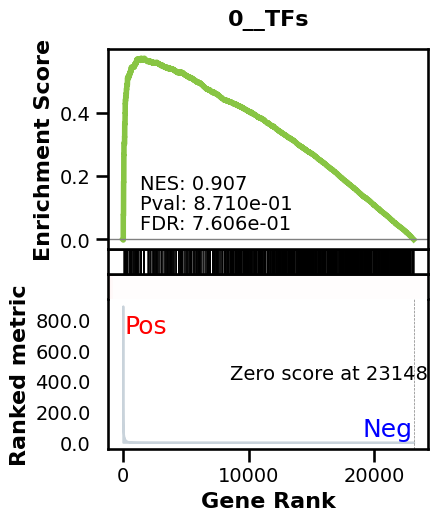

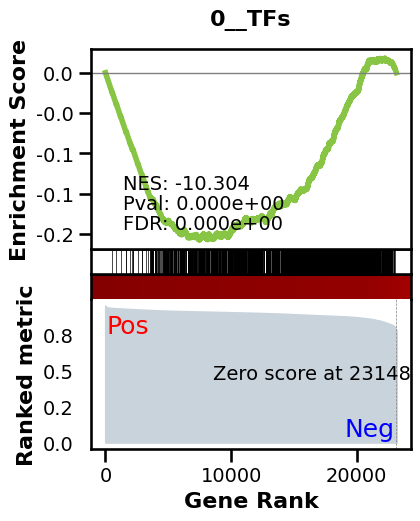

_________________________________________
TF specific enrichment


found some significant results for  43.75 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:45,  2.80it/s]

  2%|▏         | 2/128 [00:00<00:40,  3.12it/s]

  2%|▏         | 3/128 [00:00<00:38,  3.24it/s]

  3%|▎         | 4/128 [00:01<00:37,  3.30it/s]

  4%|▍         | 5/128 [00:01<00:36,  3.34it/s]

  5%|▍         | 6/128 [00:01<00:36,  3.36it/s]

  5%|▌         | 7/128 [00:02<00:35,  3.36it/s]

  6%|▋         | 8/128 [00:02<00:35,  3.37it/s]

  7%|▋         | 9/128 [00:02<00:35,  3.38it/s]

  8%|▊         | 10/128 [00:03<00:34,  3.39it/s]

  9%|▊         | 11/128 [00:03<00:34,  3.39it/s]

  9%|▉         | 12/128 [00:03<00:34,  3.39it/s]

 10%|█         | 13/128 [00:03<00:33,  3.39it/s]

 11%|█         | 14/128 [00:04<00:33,  3.39it/s]

 12%|█▏        | 15/128 [00:04<00:33,  3.39it/s]

 12%|█▎        | 16/128 [00:04<00:33,  3.39it/s]

 13%|█▎        | 17/128 [00:05<00:32,  3.39it/s]

 14%|█▍        | 18/128 [00:05<00:32,  3.39it/s]

 15%|█▍        | 19/128 [00:05<00:32,  3.39it/s]

 16%|█▌        | 20/128 [00:05<00:31,  3.39it/s]

 16%|█▋        | 21/128 [00:06<00:31,  3.39it/s]

 17%|█▋        | 22/128 [00:06<00:31,  3.39it/s]

 18%|█▊        | 23/128 [00:06<00:30,  3.39it/s]

 19%|█▉        | 24/128 [00:07<00:30,  3.40it/s]

 20%|█▉        | 25/128 [00:07<00:30,  3.39it/s]

 20%|██        | 26/128 [00:07<00:30,  3.39it/s]

 21%|██        | 27/128 [00:08<00:29,  3.40it/s]

 22%|██▏       | 28/128 [00:08<00:29,  3.39it/s]

 23%|██▎       | 29/128 [00:08<00:29,  3.39it/s]

 23%|██▎       | 30/128 [00:08<00:28,  3.39it/s]

 24%|██▍       | 31/128 [00:09<00:28,  3.39it/s]

 25%|██▌       | 32/128 [00:09<00:28,  3.39it/s]

 26%|██▌       | 33/128 [00:09<00:28,  3.39it/s]

 27%|██▋       | 34/128 [00:10<00:27,  3.40it/s]

 27%|██▋       | 35/128 [00:10<00:27,  3.40it/s]

 28%|██▊       | 36/128 [00:10<00:27,  3.40it/s]

 29%|██▉       | 37/128 [00:10<00:26,  3.40it/s]

 30%|██▉       | 38/128 [00:11<00:26,  3.40it/s]

 30%|███       | 39/128 [00:11<00:26,  3.39it/s]

 31%|███▏      | 40/128 [00:11<00:26,  3.38it/s]

 32%|███▏      | 41/128 [00:12<00:25,  3.38it/s]

 33%|███▎      | 42/128 [00:12<00:25,  3.38it/s]

 34%|███▎      | 43/128 [00:12<00:25,  3.38it/s]

 34%|███▍      | 44/128 [00:13<00:24,  3.38it/s]

 35%|███▌      | 45/128 [00:13<00:24,  3.38it/s]

 36%|███▌      | 46/128 [00:13<00:24,  3.38it/s]

 37%|███▋      | 47/128 [00:13<00:23,  3.39it/s]

 38%|███▊      | 48/128 [00:14<00:23,  3.39it/s]

 38%|███▊      | 49/128 [00:14<00:23,  3.38it/s]

 39%|███▉      | 50/128 [00:14<00:23,  3.38it/s]

 40%|███▉      | 51/128 [00:15<00:22,  3.39it/s]

 41%|████      | 52/128 [00:15<00:22,  3.39it/s]

 41%|████▏     | 53/128 [00:15<00:22,  3.39it/s]

 42%|████▏     | 54/128 [00:15<00:21,  3.39it/s]

 43%|████▎     | 55/128 [00:16<00:21,  3.39it/s]

 44%|████▍     | 56/128 [00:16<00:21,  3.39it/s]

 45%|████▍     | 57/128 [00:16<00:20,  3.38it/s]

 45%|████▌     | 58/128 [00:17<00:20,  3.39it/s]

 46%|████▌     | 59/128 [00:17<00:20,  3.39it/s]

 47%|████▋     | 60/128 [00:17<00:20,  3.39it/s]

 48%|████▊     | 61/128 [00:18<00:19,  3.40it/s]

 48%|████▊     | 62/128 [00:18<00:19,  3.39it/s]

 49%|████▉     | 63/128 [00:18<00:19,  3.39it/s]

 50%|█████     | 64/128 [00:18<00:18,  3.39it/s]

 51%|█████     | 65/128 [00:19<00:18,  3.39it/s]

 52%|█████▏    | 66/128 [00:19<00:18,  3.40it/s]

 52%|█████▏    | 67/128 [00:19<00:17,  3.41it/s]

 53%|█████▎    | 68/128 [00:20<00:17,  3.41it/s]

 54%|█████▍    | 69/128 [00:20<00:17,  3.41it/s]

 55%|█████▍    | 70/128 [00:20<00:17,  3.41it/s]

 55%|█████▌    | 71/128 [00:20<00:16,  3.40it/s]

 56%|█████▋    | 72/128 [00:21<00:16,  3.41it/s]

 57%|█████▋    | 73/128 [00:21<00:16,  3.41it/s]

 58%|█████▊    | 74/128 [00:21<00:15,  3.41it/s]

 59%|█████▊    | 75/128 [00:22<00:16,  3.28it/s]

 59%|█████▉    | 76/128 [00:22<00:15,  3.31it/s]

 60%|██████    | 77/128 [00:22<00:15,  3.34it/s]

 61%|██████    | 78/128 [00:23<00:14,  3.36it/s]

 62%|██████▏   | 79/128 [00:23<00:14,  3.38it/s]

 62%|██████▎   | 80/128 [00:23<00:14,  3.32it/s]

 63%|██████▎   | 81/128 [00:23<00:14,  3.31it/s]

 64%|██████▍   | 82/128 [00:24<00:13,  3.34it/s]

 65%|██████▍   | 83/128 [00:24<00:13,  3.37it/s]

 66%|██████▌   | 84/128 [00:24<00:13,  3.38it/s]

 66%|██████▋   | 85/128 [00:25<00:12,  3.39it/s]

 67%|██████▋   | 86/128 [00:25<00:12,  3.40it/s]

 68%|██████▊   | 87/128 [00:25<00:12,  3.41it/s]

 69%|██████▉   | 88/128 [00:26<00:11,  3.41it/s]

 70%|██████▉   | 89/128 [00:26<00:11,  3.42it/s]

 70%|███████   | 90/128 [00:26<00:11,  3.41it/s]

 71%|███████   | 91/128 [00:26<00:10,  3.41it/s]

 72%|███████▏  | 92/128 [00:27<00:10,  3.41it/s]

 73%|███████▎  | 93/128 [00:27<00:10,  3.41it/s]

 73%|███████▎  | 94/128 [00:27<00:09,  3.42it/s]

 74%|███████▍  | 95/128 [00:28<00:09,  3.42it/s]

 75%|███████▌  | 96/128 [00:28<00:09,  3.42it/s]

 76%|███████▌  | 97/128 [00:28<00:09,  3.41it/s]

 77%|███████▋  | 98/128 [00:28<00:08,  3.41it/s]

 77%|███████▋  | 99/128 [00:29<00:08,  3.42it/s]

 78%|███████▊  | 100/128 [00:29<00:08,  3.42it/s]

 79%|███████▉  | 101/128 [00:29<00:07,  3.40it/s]

 80%|███████▉  | 102/128 [00:30<00:07,  3.39it/s]

 80%|████████  | 103/128 [00:30<00:07,  3.39it/s]

 81%|████████▏ | 104/128 [00:30<00:07,  3.39it/s]

 82%|████████▏ | 105/128 [00:31<00:06,  3.38it/s]

 83%|████████▎ | 106/128 [00:31<00:06,  3.38it/s]

 84%|████████▎ | 107/128 [00:31<00:06,  3.39it/s]

 84%|████████▍ | 108/128 [00:31<00:05,  3.39it/s]

 85%|████████▌ | 109/128 [00:32<00:05,  3.37it/s]

 86%|████████▌ | 110/128 [00:32<00:05,  3.38it/s]

 87%|████████▋ | 111/128 [00:32<00:05,  3.38it/s]

 88%|████████▊ | 112/128 [00:33<00:04,  3.38it/s]

 88%|████████▊ | 113/128 [00:33<00:04,  3.37it/s]

 89%|████████▉ | 114/128 [00:33<00:04,  3.38it/s]

 90%|████████▉ | 115/128 [00:33<00:03,  3.39it/s]

 91%|█████████ | 116/128 [00:34<00:03,  3.38it/s]

 91%|█████████▏| 117/128 [00:34<00:03,  3.37it/s]

 92%|█████████▏| 118/128 [00:34<00:02,  3.37it/s]

 93%|█████████▎| 119/128 [00:35<00:02,  3.35it/s]

 94%|█████████▍| 120/128 [00:35<00:02,  3.35it/s]

 95%|█████████▍| 121/128 [00:35<00:02,  3.36it/s]

 95%|█████████▌| 122/128 [00:36<00:01,  3.35it/s]

 96%|█████████▌| 123/128 [00:36<00:01,  3.37it/s]

 97%|█████████▋| 124/128 [00:36<00:01,  3.38it/s]

 98%|█████████▊| 125/128 [00:36<00:00,  3.37it/s]

 98%|█████████▊| 126/128 [00:37<00:00,  3.38it/s]

 99%|█████████▉| 127/128 [00:37<00:00,  3.38it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:37<00:00,  3.34it/s]

100%|██████████| 128/128 [00:37<00:00,  3.38it/s]

Average Precision (AP):  0.00065561910567673
Area Under Precision-Recall Curve (AUPRC):  0.0006553672039534219


EPR: 1.1056448976975124


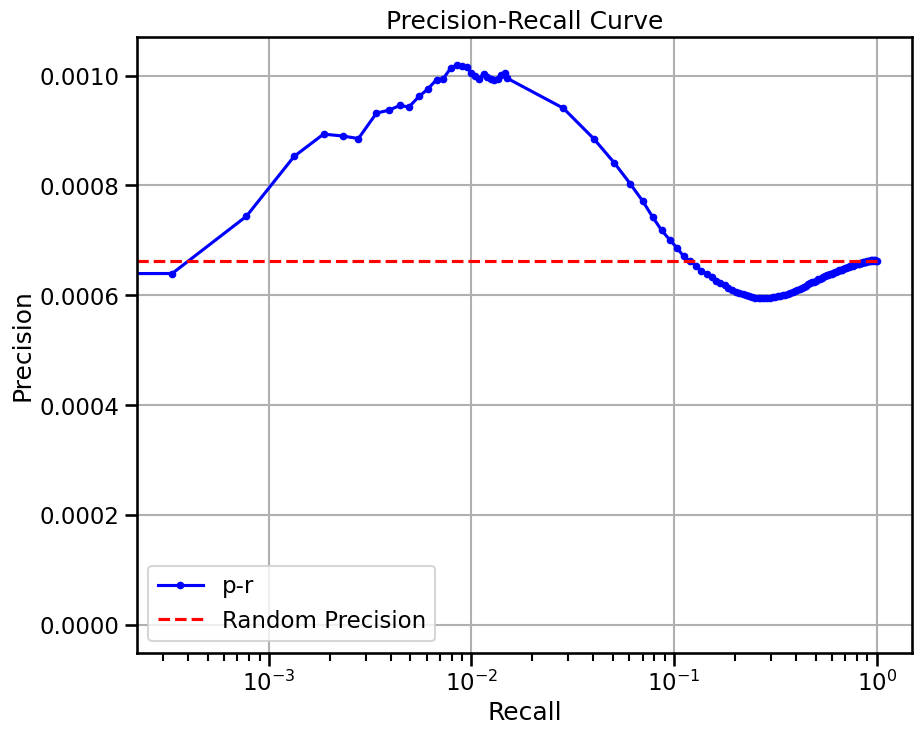

  0%|          | 0/64 [00:00<?, ?it/s]

  2%|▏         | 1/64 [00:02<02:33,  2.44s/it]

  3%|▎         | 2/64 [00:03<01:54,  1.84s/it]

  5%|▍         | 3/64 [00:05<01:40,  1.65s/it]

  6%|▋         | 4/64 [00:08<02:24,  2.41s/it]

  8%|▊         | 5/64 [00:10<02:00,  2.04s/it]

  9%|▉         | 6/64 [00:11<01:45,  1.82s/it]

 11%|█         | 7/64 [00:13<01:36,  1.69s/it]

 12%|█▎        | 8/64 [00:14<01:26,  1.55s/it]

 14%|█▍        | 9/64 [00:15<01:20,  1.46s/it]

 16%|█▌        | 10/64 [00:16<01:15,  1.39s/it]

 17%|█▋        | 11/64 [00:18<01:11,  1.35s/it]

 19%|█▉        | 12/64 [00:19<01:07,  1.31s/it]

 20%|██        | 13/64 [00:20<01:04,  1.27s/it]

 22%|██▏       | 14/64 [00:21<01:03,  1.26s/it]

 23%|██▎       | 15/64 [00:22<01:01,  1.25s/it]

 25%|██▌       | 16/64 [00:24<00:59,  1.25s/it]

 27%|██▋       | 17/64 [00:25<00:57,  1.22s/it]

 28%|██▊       | 18/64 [00:26<00:55,  1.21s/it]

 30%|██▉       | 19/64 [00:27<00:54,  1.21s/it]

 31%|███▏      | 20/64 [00:28<00:53,  1.21s/it]

 33%|███▎      | 21/64 [00:30<00:50,  1.18s/it]

 34%|███▍      | 22/64 [00:31<00:49,  1.18s/it]

 36%|███▌      | 23/64 [00:32<00:48,  1.18s/it]

 38%|███▊      | 24/64 [00:33<00:47,  1.20s/it]

 39%|███▉      | 25/64 [00:34<00:46,  1.19s/it]

 41%|████      | 26/64 [00:36<00:45,  1.19s/it]

 42%|████▏     | 27/64 [00:37<00:44,  1.20s/it]

 44%|████▍     | 28/64 [00:38<00:43,  1.21s/it]

 45%|████▌     | 29/64 [00:39<00:42,  1.21s/it]

 47%|████▋     | 30/64 [00:40<00:41,  1.21s/it]

 48%|████▊     | 31/64 [00:42<00:39,  1.21s/it]

 50%|█████     | 32/64 [00:43<00:38,  1.20s/it]

 52%|█████▏    | 33/64 [00:44<00:37,  1.20s/it]

 53%|█████▎    | 34/64 [00:45<00:35,  1.19s/it]

 55%|█████▍    | 35/64 [00:46<00:33,  1.17s/it]

 56%|█████▋    | 36/64 [00:47<00:32,  1.16s/it]

 58%|█████▊    | 37/64 [00:49<00:31,  1.16s/it]

 59%|█████▉    | 38/64 [00:50<00:30,  1.15s/it]

 61%|██████    | 39/64 [00:51<00:28,  1.15s/it]

 62%|██████▎   | 40/64 [00:52<00:27,  1.14s/it]

 64%|██████▍   | 41/64 [00:53<00:26,  1.15s/it]

 66%|██████▌   | 42/64 [00:54<00:25,  1.17s/it]

 67%|██████▋   | 43/64 [00:55<00:24,  1.16s/it]

 69%|██████▉   | 44/64 [00:57<00:22,  1.14s/it]

 70%|███████   | 45/64 [00:58<00:21,  1.13s/it]

 72%|███████▏  | 46/64 [00:59<00:20,  1.12s/it]

 73%|███████▎  | 47/64 [01:00<00:18,  1.11s/it]

 75%|███████▌  | 48/64 [01:01<00:17,  1.12s/it]

 77%|███████▋  | 49/64 [01:02<00:16,  1.12s/it]

 78%|███████▊  | 50/64 [01:03<00:15,  1.12s/it]

 80%|███████▉  | 51/64 [01:04<00:14,  1.11s/it]

 81%|████████▏ | 52/64 [01:05<00:13,  1.11s/it]

 83%|████████▎ | 53/64 [01:07<00:12,  1.13s/it]

 84%|████████▍ | 54/64 [01:08<00:11,  1.12s/it]

 86%|████████▌ | 55/64 [01:09<00:10,  1.12s/it]

 88%|████████▊ | 56/64 [01:10<00:08,  1.11s/it]

 89%|████████▉ | 57/64 [01:11<00:07,  1.11s/it]

 91%|█████████ | 58/64 [01:12<00:06,  1.10s/it]

 92%|█████████▏| 59/64 [01:13<00:05,  1.11s/it]

 94%|█████████▍| 60/64 [01:14<00:04,  1.12s/it]

 95%|█████████▌| 61/64 [01:15<00:03,  1.11s/it]

 97%|█████████▋| 62/64 [01:17<00:02,  1.11s/it]

 98%|█████████▊| 63/64 [01:18<00:01,  1.10s/it]

100%|██████████| 64/64 [01:19<00:00,  1.10s/it]

100%|██████████| 64/64 [01:19<00:00,  1.24s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


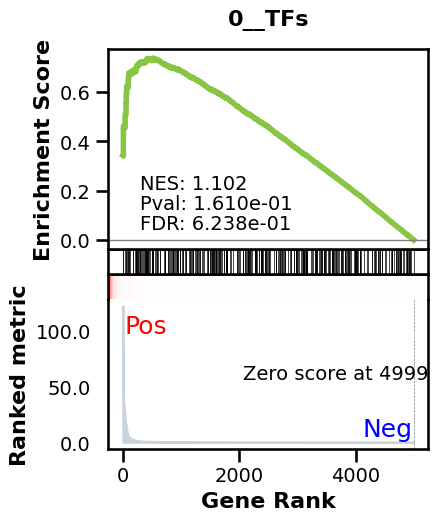

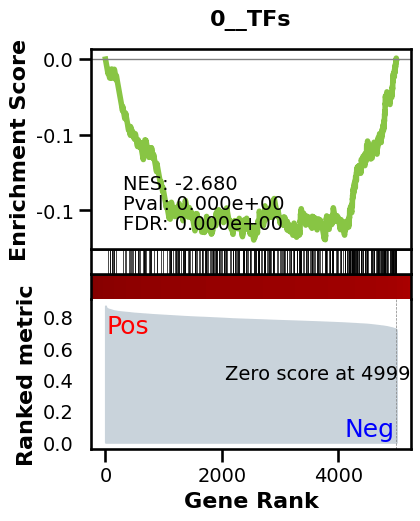

_________________________________________
TF specific enrichment


found some significant results for  36.111111111111114 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0012460602944679446 
recall:  1.0 
random precision: 0.0012464244266404952


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 58.23it/s]

  9%|▉         | 12/128 [00:00<00:01, 58.29it/s]

 14%|█▍        | 18/128 [00:00<00:01, 58.17it/s]

 19%|█▉        | 24/128 [00:00<00:01, 58.62it/s]

 23%|██▎       | 30/128 [00:00<00:01, 58.38it/s]

 28%|██▊       | 36/128 [00:00<00:01, 58.21it/s]

 33%|███▎      | 42/128 [00:00<00:01, 58.10it/s]

 38%|███▊      | 48/128 [00:00<00:01, 58.21it/s]

 42%|████▏     | 54/128 [00:00<00:01, 58.05it/s]

 47%|████▋     | 60/128 [00:01<00:01, 57.94it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 57.86it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 57.77it/s]

 61%|██████    | 78/128 [00:01<00:00, 57.94it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 58.13it/s]

 70%|███████   | 90/128 [00:01<00:00, 58.28it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 58.51it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 58.11it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 57.90it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 58.04it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 58.27it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 58.53it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 58.17it/s]

Average Precision (AP):  0.0015508892071508518
Area Under Precision-Recall Curve (AUPRC):  0.0015492695639396418
EPR: 0.4939416534868757


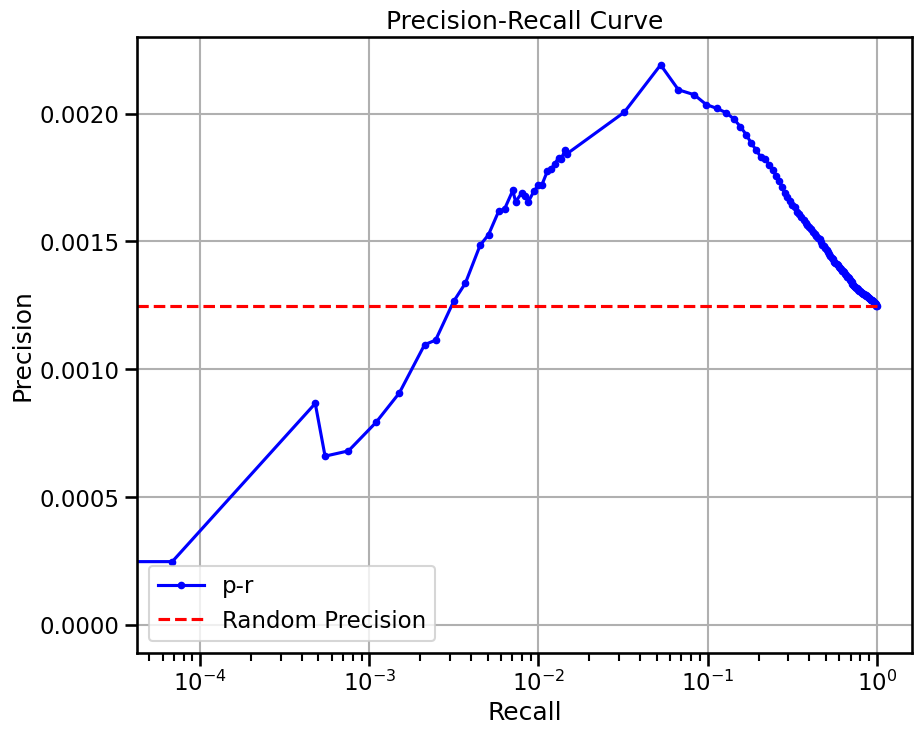

base enrichment


Top central genes: []


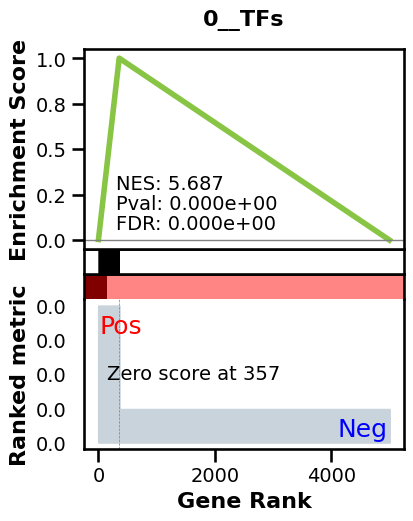

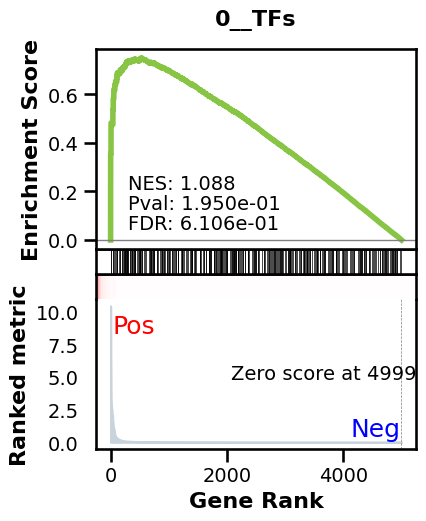

_________________________________________
TF specific enrichment


found some significant results for  11.11111111111111 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.009027741976136058 
recall:  0.6476712328767124 
random precision: 0.0012464244266404952


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 60.73it/s]

 11%|█         | 14/128 [00:00<00:01, 60.90it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.64it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.74it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.76it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.60it/s]

 38%|███▊      | 49/128 [00:00<00:01, 60.58it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.14it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.00it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 59.87it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.12it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.02it/s]

 71%|███████   | 91/128 [00:01<00:00, 59.92it/s]

 76%|███████▌  | 97/128 [00:01<00:00, 59.82it/s]

 80%|████████  | 103/128 [00:01<00:00, 59.79it/s]

 86%|████████▌ | 110/128 [00:01<00:00, 60.04it/s]

 91%|█████████▏| 117/128 [00:01<00:00, 59.82it/s]

 97%|█████████▋| 124/128 [00:02<00:00, 60.08it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.12it/s]

Average Precision (AP):  0.008758562915952638
Area Under Precision-Recall Curve (AUPRC):  0.00830413293125008
EPR: 13.6577931636639


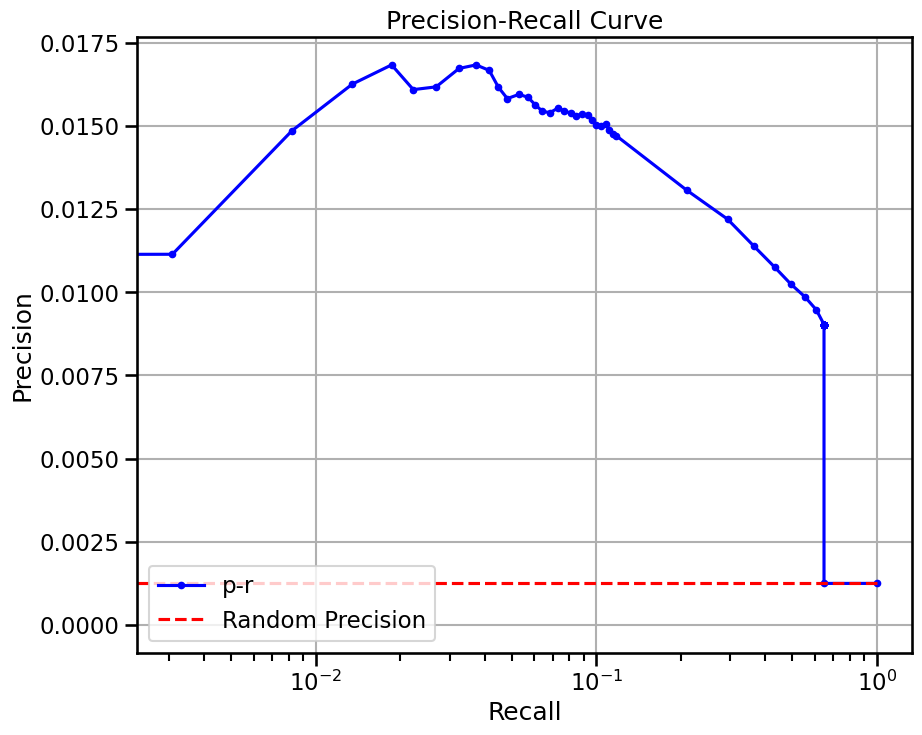

true elem 14600 ...


doing classification....


metrics {'used_heads': 9, 'precision': 0.0012686770340012274, 'random_precision': 0.0012686770340012274, 'recall': 1.0, 'predicted_true': 4686772.0, 'number_of_true': 5946.0}


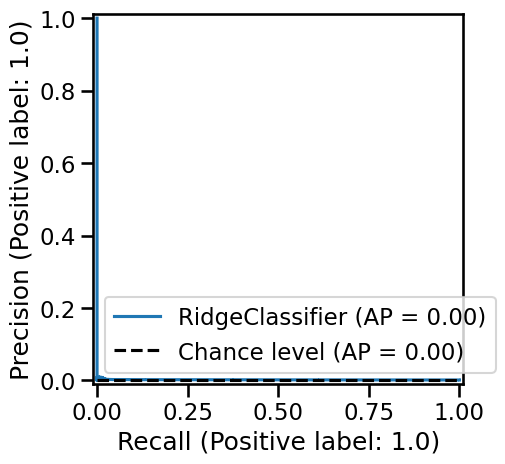

base enrichment


Top central genes: []
The DataFrame contains only the same values.


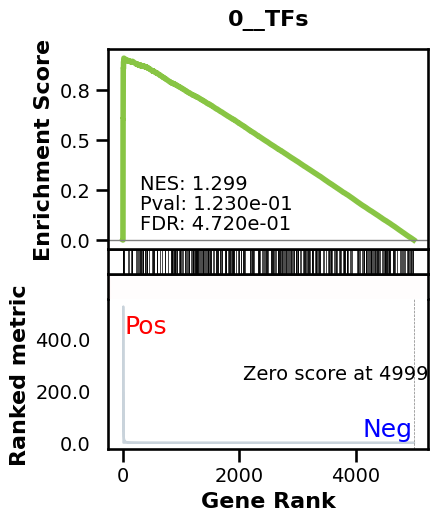

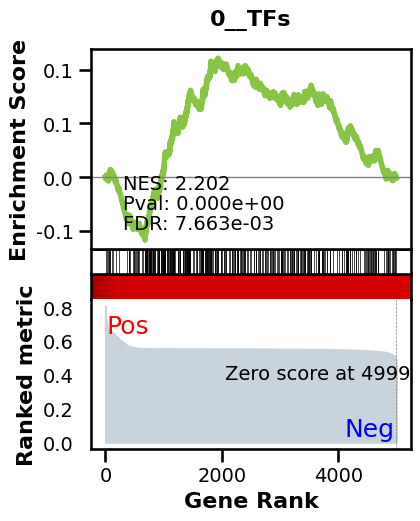

_________________________________________
TF specific enrichment


found some significant results for  30.555555555555557 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0012460602944679446 
recall:  1.0 
random precision: 0.0012464244266404952


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 60.70it/s]

 11%|█         | 14/128 [00:00<00:01, 60.37it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.50it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.61it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.45it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.45it/s]

 38%|███▊      | 49/128 [00:00<00:01, 60.52it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.17it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.21it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 59.88it/s]

 59%|█████▉    | 76/128 [00:01<00:00, 59.80it/s]

 65%|██████▍   | 83/128 [00:01<00:00, 59.93it/s]

 70%|███████   | 90/128 [00:01<00:00, 59.99it/s]

 76%|███████▌  | 97/128 [00:01<00:00, 60.19it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 60.20it/s]

 87%|████████▋ | 111/128 [00:01<00:00, 60.24it/s]

 92%|█████████▏| 118/128 [00:01<00:00, 60.16it/s]

 98%|█████████▊| 125/128 [00:02<00:00, 60.07it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.14it/s]

Average Precision (AP):  0.0018793100046347975
Area Under Precision-Recall Curve (AUPRC):  0.0018754748643695987
EPR: 7.766515917392918


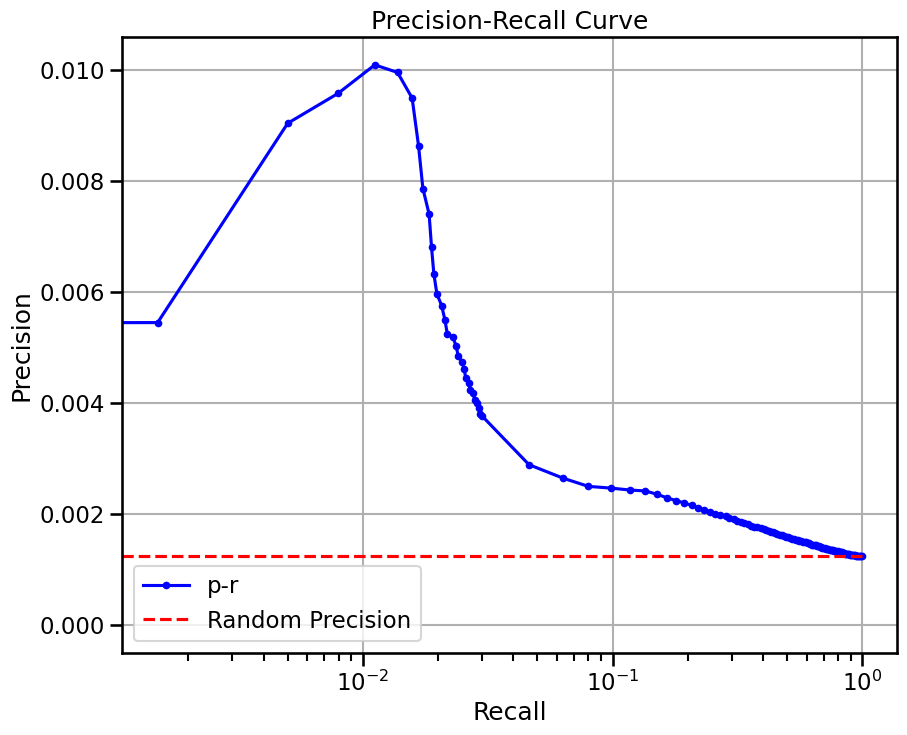

base enrichment


Top central genes: []


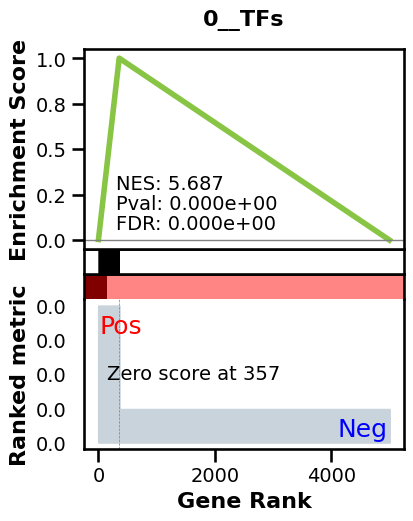

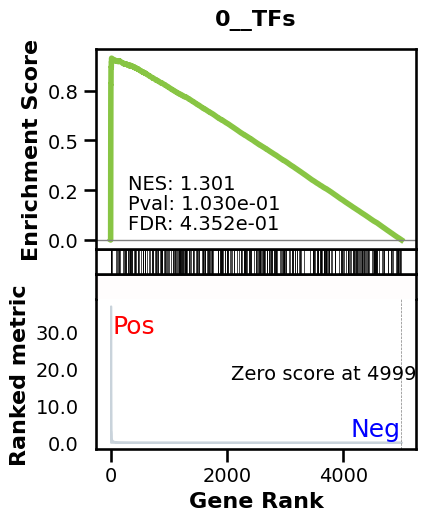

_________________________________________
TF specific enrichment


found some significant results for  5.555555555555555 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.009027741976136058 
recall:  0.6476712328767124 
random precision: 0.0012464244266404952


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 59.36it/s]

  9%|▉         | 12/128 [00:00<00:01, 59.26it/s]

 14%|█▍        | 18/128 [00:00<00:01, 58.78it/s]

 20%|█▉        | 25/128 [00:00<00:01, 59.40it/s]

 24%|██▍       | 31/128 [00:00<00:01, 59.44it/s]

 29%|██▉       | 37/128 [00:00<00:01, 59.33it/s]

 34%|███▍      | 44/128 [00:00<00:01, 59.74it/s]

 39%|███▉      | 50/128 [00:00<00:01, 59.55it/s]

 44%|████▍     | 56/128 [00:00<00:01, 59.44it/s]

 49%|████▉     | 63/128 [00:01<00:01, 59.86it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.16it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.28it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.37it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.46it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.46it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.55it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.26it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.42it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 60.34it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.99it/s]

Average Precision (AP):  0.010163934255623322
Area Under Precision-Recall Curve (AUPRC):  0.009230741983139952
EPR: 21.047203984401033


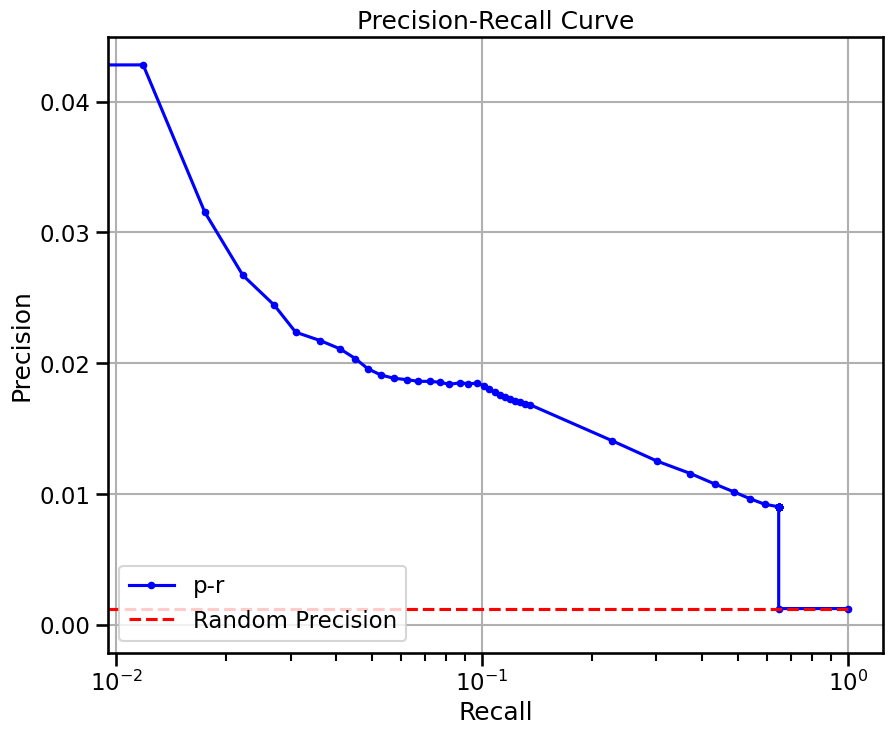

  0%|          | 0/25 [00:00<?, ?it/s]

  4%|▍         | 1/25 [00:02<00:51,  2.13s/it]

  8%|▊         | 2/25 [00:03<00:33,  1.46s/it]

 12%|█▏        | 3/25 [00:04<00:27,  1.26s/it]

 16%|█▌        | 4/25 [00:05<00:24,  1.15s/it]

 20%|██        | 5/25 [00:06<00:21,  1.09s/it]

 24%|██▍       | 6/25 [00:07<00:20,  1.06s/it]

 28%|██▊       | 7/25 [00:08<00:18,  1.04s/it]

 32%|███▏      | 8/25 [00:09<00:17,  1.03s/it]

 36%|███▌      | 9/25 [00:10<00:16,  1.01s/it]

 40%|████      | 10/25 [00:11<00:15,  1.01s/it]

 44%|████▍     | 11/25 [00:12<00:14,  1.00s/it]

 48%|████▊     | 12/25 [00:13<00:12,  1.00it/s]

 52%|█████▏    | 13/25 [00:14<00:11,  1.01it/s]

 56%|█████▌    | 14/25 [00:15<00:10,  1.01it/s]

 60%|██████    | 15/25 [00:16<00:09,  1.01it/s]

 64%|██████▍   | 16/25 [00:17<00:08,  1.01it/s]

 68%|██████▊   | 17/25 [00:18<00:07,  1.01it/s]

 72%|███████▏  | 18/25 [00:18<00:06,  1.01it/s]

 76%|███████▌  | 19/25 [00:19<00:05,  1.01it/s]

 80%|████████  | 20/25 [00:20<00:04,  1.01it/s]

 84%|████████▍ | 21/25 [00:21<00:03,  1.01it/s]

 88%|████████▊ | 22/25 [00:22<00:02,  1.01it/s]

 92%|█████████▏| 23/25 [00:23<00:01,  1.01it/s]

 96%|█████████▌| 24/25 [00:24<00:00,  1.01it/s]

100%|██████████| 25/25 [00:25<00:00,  1.09it/s]

100%|██████████| 25/25 [00:25<00:00,  1.04s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


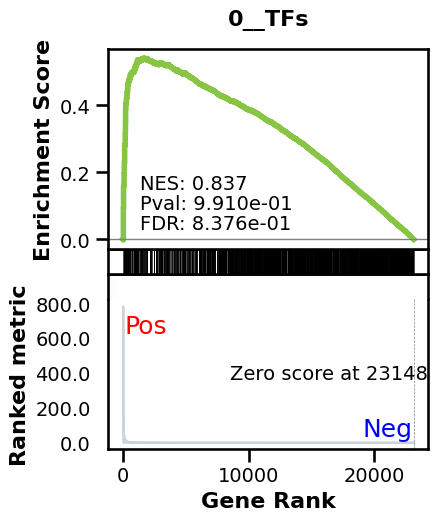

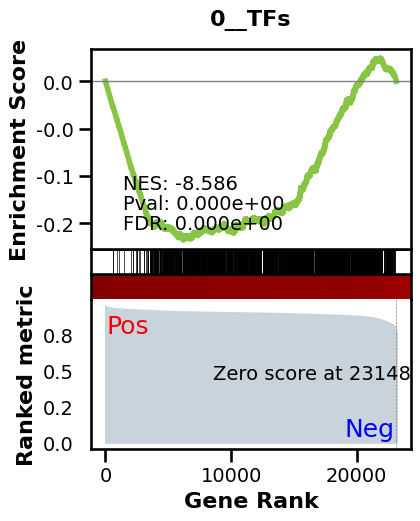

_________________________________________
TF specific enrichment


found some significant results for  57.142857142857146 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:37,  3.36it/s]

  2%|▏         | 2/128 [00:00<00:37,  3.35it/s]

  2%|▏         | 3/128 [00:00<00:37,  3.35it/s]

  3%|▎         | 4/128 [00:01<00:37,  3.34it/s]

  4%|▍         | 5/128 [00:01<00:36,  3.34it/s]

  5%|▍         | 6/128 [00:01<00:36,  3.34it/s]

  5%|▌         | 7/128 [00:02<00:36,  3.34it/s]

  6%|▋         | 8/128 [00:02<00:35,  3.34it/s]

  7%|▋         | 9/128 [00:02<00:35,  3.34it/s]

  8%|▊         | 10/128 [00:02<00:35,  3.34it/s]

  9%|▊         | 11/128 [00:03<00:35,  3.34it/s]

  9%|▉         | 12/128 [00:03<00:34,  3.34it/s]

 10%|█         | 13/128 [00:03<00:34,  3.34it/s]

 11%|█         | 14/128 [00:04<00:34,  3.34it/s]

 12%|█▏        | 15/128 [00:04<00:33,  3.34it/s]

 12%|█▎        | 16/128 [00:04<00:33,  3.34it/s]

 13%|█▎        | 17/128 [00:05<00:33,  3.33it/s]

 14%|█▍        | 18/128 [00:05<00:32,  3.34it/s]

 15%|█▍        | 19/128 [00:05<00:32,  3.34it/s]

 16%|█▌        | 20/128 [00:05<00:32,  3.34it/s]

 16%|█▋        | 21/128 [00:06<00:32,  3.34it/s]

 17%|█▋        | 22/128 [00:06<00:31,  3.34it/s]

 18%|█▊        | 23/128 [00:06<00:31,  3.33it/s]

 19%|█▉        | 24/128 [00:07<00:31,  3.34it/s]

 20%|█▉        | 25/128 [00:07<00:30,  3.33it/s]

 20%|██        | 26/128 [00:07<00:30,  3.33it/s]

 21%|██        | 27/128 [00:08<00:30,  3.33it/s]

 22%|██▏       | 28/128 [00:08<00:30,  3.33it/s]

 23%|██▎       | 29/128 [00:08<00:29,  3.33it/s]

 23%|██▎       | 30/128 [00:08<00:29,  3.33it/s]

 24%|██▍       | 31/128 [00:09<00:29,  3.33it/s]

 25%|██▌       | 32/128 [00:09<00:28,  3.33it/s]

 26%|██▌       | 33/128 [00:09<00:28,  3.33it/s]

 27%|██▋       | 34/128 [00:10<00:28,  3.33it/s]

 27%|██▋       | 35/128 [00:10<00:27,  3.33it/s]

 28%|██▊       | 36/128 [00:10<00:27,  3.34it/s]

 29%|██▉       | 37/128 [00:11<00:27,  3.34it/s]

 30%|██▉       | 38/128 [00:11<00:27,  3.33it/s]

 30%|███       | 39/128 [00:11<00:26,  3.33it/s]

 31%|███▏      | 40/128 [00:11<00:26,  3.33it/s]

 32%|███▏      | 41/128 [00:12<00:26,  3.33it/s]

 33%|███▎      | 42/128 [00:12<00:25,  3.34it/s]

 34%|███▎      | 43/128 [00:12<00:25,  3.34it/s]

 34%|███▍      | 44/128 [00:13<00:25,  3.34it/s]

 35%|███▌      | 45/128 [00:13<00:24,  3.34it/s]

 36%|███▌      | 46/128 [00:13<00:24,  3.34it/s]

 37%|███▋      | 47/128 [00:14<00:24,  3.34it/s]

 38%|███▊      | 48/128 [00:14<00:23,  3.34it/s]

 38%|███▊      | 49/128 [00:14<00:23,  3.34it/s]

 39%|███▉      | 50/128 [00:14<00:23,  3.35it/s]

 40%|███▉      | 51/128 [00:15<00:23,  3.35it/s]

 41%|████      | 52/128 [00:15<00:22,  3.34it/s]

 41%|████▏     | 53/128 [00:15<00:22,  3.34it/s]

 42%|████▏     | 54/128 [00:16<00:22,  3.34it/s]

 43%|████▎     | 55/128 [00:16<00:21,  3.34it/s]

 44%|████▍     | 56/128 [00:16<00:21,  3.34it/s]

 45%|████▍     | 57/128 [00:17<00:21,  3.34it/s]

 45%|████▌     | 58/128 [00:17<00:20,  3.34it/s]

 46%|████▌     | 59/128 [00:17<00:20,  3.34it/s]

 47%|████▋     | 60/128 [00:17<00:20,  3.34it/s]

 48%|████▊     | 61/128 [00:18<00:20,  3.34it/s]

 48%|████▊     | 62/128 [00:18<00:19,  3.34it/s]

 49%|████▉     | 63/128 [00:18<00:19,  3.33it/s]

 50%|█████     | 64/128 [00:19<00:19,  3.33it/s]

 51%|█████     | 65/128 [00:19<00:18,  3.33it/s]

 52%|█████▏    | 66/128 [00:19<00:18,  3.33it/s]

 52%|█████▏    | 67/128 [00:20<00:18,  3.33it/s]

 53%|█████▎    | 68/128 [00:20<00:17,  3.33it/s]

 54%|█████▍    | 69/128 [00:20<00:17,  3.34it/s]

 55%|█████▍    | 70/128 [00:20<00:17,  3.34it/s]

 55%|█████▌    | 71/128 [00:21<00:17,  3.34it/s]

 56%|█████▋    | 72/128 [00:21<00:16,  3.34it/s]

 57%|█████▋    | 73/128 [00:21<00:16,  3.34it/s]

 58%|█████▊    | 74/128 [00:22<00:16,  3.34it/s]

 59%|█████▊    | 75/128 [00:22<00:15,  3.33it/s]

 59%|█████▉    | 76/128 [00:22<00:15,  3.34it/s]

 60%|██████    | 77/128 [00:23<00:15,  3.34it/s]

 61%|██████    | 78/128 [00:23<00:14,  3.34it/s]

 62%|██████▏   | 79/128 [00:23<00:14,  3.34it/s]

 62%|██████▎   | 80/128 [00:23<00:14,  3.34it/s]

 63%|██████▎   | 81/128 [00:24<00:14,  3.34it/s]

 64%|██████▍   | 82/128 [00:24<00:13,  3.34it/s]

 65%|██████▍   | 83/128 [00:24<00:13,  3.34it/s]

 66%|██████▌   | 84/128 [00:25<00:13,  3.34it/s]

 66%|██████▋   | 85/128 [00:25<00:12,  3.34it/s]

 67%|██████▋   | 86/128 [00:25<00:12,  3.34it/s]

 68%|██████▊   | 87/128 [00:26<00:12,  3.33it/s]

 69%|██████▉   | 88/128 [00:26<00:11,  3.34it/s]

 70%|██████▉   | 89/128 [00:26<00:11,  3.34it/s]

 70%|███████   | 90/128 [00:26<00:11,  3.34it/s]

 71%|███████   | 91/128 [00:27<00:11,  3.34it/s]

 72%|███████▏  | 92/128 [00:27<00:10,  3.34it/s]

 73%|███████▎  | 93/128 [00:27<00:10,  3.34it/s]

 73%|███████▎  | 94/128 [00:28<00:10,  3.34it/s]

 74%|███████▍  | 95/128 [00:28<00:09,  3.34it/s]

 75%|███████▌  | 96/128 [00:28<00:09,  3.34it/s]

 76%|███████▌  | 97/128 [00:29<00:09,  3.34it/s]

 77%|███████▋  | 98/128 [00:29<00:08,  3.34it/s]

 77%|███████▋  | 99/128 [00:29<00:08,  3.34it/s]

 78%|███████▊  | 100/128 [00:29<00:08,  3.34it/s]

 79%|███████▉  | 101/128 [00:30<00:08,  3.33it/s]

 80%|███████▉  | 102/128 [00:30<00:07,  3.33it/s]

 80%|████████  | 103/128 [00:30<00:07,  3.34it/s]

 81%|████████▏ | 104/128 [00:31<00:07,  3.34it/s]

 82%|████████▏ | 105/128 [00:31<00:06,  3.33it/s]

 83%|████████▎ | 106/128 [00:31<00:06,  3.34it/s]

 84%|████████▎ | 107/128 [00:32<00:06,  3.34it/s]

 84%|████████▍ | 108/128 [00:32<00:05,  3.34it/s]

 85%|████████▌ | 109/128 [00:32<00:05,  3.34it/s]

 86%|████████▌ | 110/128 [00:32<00:05,  3.34it/s]

 87%|████████▋ | 111/128 [00:33<00:05,  3.34it/s]

 88%|████████▊ | 112/128 [00:33<00:04,  3.34it/s]

 88%|████████▊ | 113/128 [00:33<00:04,  3.34it/s]

 89%|████████▉ | 114/128 [00:34<00:04,  3.34it/s]

 90%|████████▉ | 115/128 [00:34<00:03,  3.34it/s]

 91%|█████████ | 116/128 [00:34<00:03,  3.34it/s]

 91%|█████████▏| 117/128 [00:35<00:03,  3.34it/s]

 92%|█████████▏| 118/128 [00:35<00:02,  3.34it/s]

 93%|█████████▎| 119/128 [00:35<00:02,  3.34it/s]

 94%|█████████▍| 120/128 [00:35<00:02,  3.34it/s]

 95%|█████████▍| 121/128 [00:36<00:02,  3.34it/s]

 95%|█████████▌| 122/128 [00:36<00:01,  3.34it/s]

 96%|█████████▌| 123/128 [00:36<00:01,  3.33it/s]

 97%|█████████▋| 124/128 [00:37<00:01,  3.33it/s]

 98%|█████████▊| 125/128 [00:37<00:00,  3.34it/s]

 98%|█████████▊| 126/128 [00:37<00:00,  3.33it/s]

 99%|█████████▉| 127/128 [00:38<00:00,  3.33it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:38<00:00,  3.33it/s]

100%|██████████| 128/128 [00:38<00:00,  3.34it/s]

Average Precision (AP):  0.0006867852395056154
Area Under Precision-Recall Curve (AUPRC):  0.0006866129779659508


EPR: 1.1494995041171794


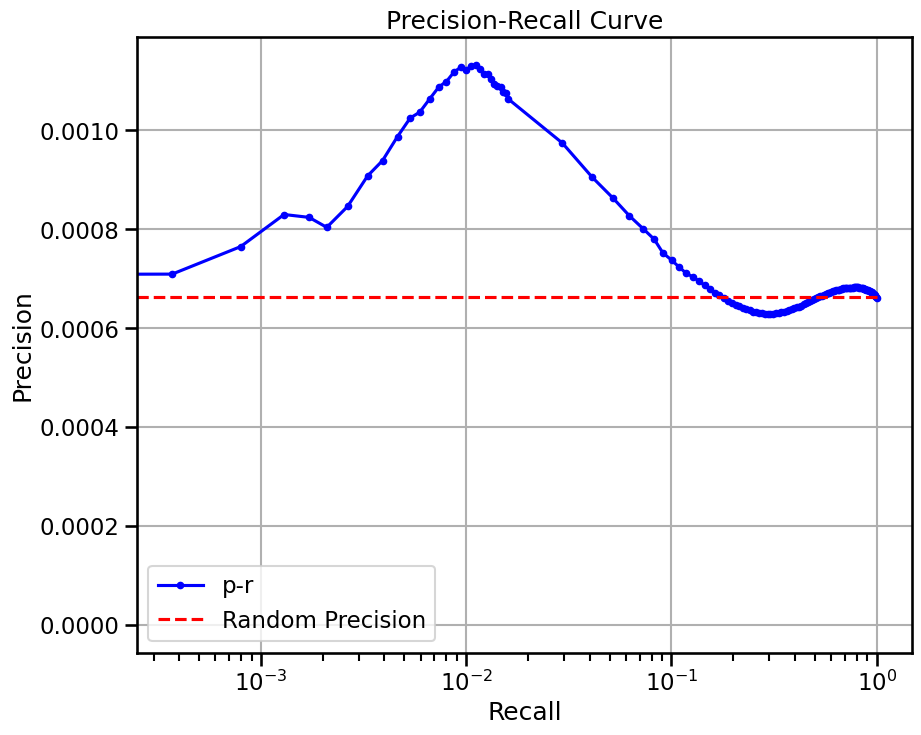

  0%|          | 0/50 [00:00<?, ?it/s]

  2%|▏         | 1/50 [00:04<03:32,  4.34s/it]

  4%|▍         | 2/50 [00:05<02:04,  2.60s/it]

  6%|▌         | 3/50 [00:07<01:35,  2.04s/it]

  8%|▊         | 4/50 [00:08<01:21,  1.78s/it]

 10%|█         | 5/50 [00:09<01:13,  1.63s/it]

 12%|█▏        | 6/50 [00:11<01:08,  1.55s/it]

 14%|█▍        | 7/50 [00:12<01:04,  1.50s/it]

 16%|█▌        | 8/50 [00:14<01:01,  1.47s/it]

 18%|█▊        | 9/50 [00:15<00:59,  1.44s/it]

 20%|██        | 10/50 [00:16<00:56,  1.42s/it]

 22%|██▏       | 11/50 [00:18<00:55,  1.41s/it]

 24%|██▍       | 12/50 [00:19<00:53,  1.41s/it]

 26%|██▌       | 13/50 [00:20<00:51,  1.40s/it]

 28%|██▊       | 14/50 [00:22<00:50,  1.40s/it]

 30%|███       | 15/50 [00:23<00:48,  1.39s/it]

 32%|███▏      | 16/50 [00:25<00:47,  1.39s/it]

 34%|███▍      | 17/50 [00:26<00:45,  1.39s/it]

 36%|███▌      | 18/50 [00:27<00:44,  1.39s/it]

 38%|███▊      | 19/50 [00:29<00:43,  1.40s/it]

 40%|████      | 20/50 [00:30<00:41,  1.40s/it]

 42%|████▏     | 21/50 [00:32<00:40,  1.40s/it]

 44%|████▍     | 22/50 [00:33<00:39,  1.40s/it]

 46%|████▌     | 23/50 [00:34<00:37,  1.39s/it]

 48%|████▊     | 24/50 [00:36<00:36,  1.39s/it]

 50%|█████     | 25/50 [00:37<00:34,  1.39s/it]

 52%|█████▏    | 26/50 [00:39<00:33,  1.38s/it]

 54%|█████▍    | 27/50 [00:40<00:31,  1.36s/it]

 56%|█████▌    | 28/50 [00:41<00:29,  1.33s/it]

 58%|█████▊    | 29/50 [00:42<00:27,  1.31s/it]

 60%|██████    | 30/50 [00:44<00:25,  1.29s/it]

 62%|██████▏   | 31/50 [00:45<00:24,  1.27s/it]

 64%|██████▍   | 32/50 [00:46<00:22,  1.27s/it]

 66%|██████▌   | 33/50 [00:47<00:21,  1.26s/it]

 68%|██████▊   | 34/50 [00:49<00:20,  1.26s/it]

 70%|███████   | 35/50 [00:50<00:18,  1.25s/it]

 72%|███████▏  | 36/50 [00:51<00:17,  1.25s/it]

 74%|███████▍  | 37/50 [00:52<00:16,  1.25s/it]

 76%|███████▌  | 38/50 [00:54<00:15,  1.25s/it]

 78%|███████▊  | 39/50 [00:55<00:13,  1.25s/it]

 80%|████████  | 40/50 [00:56<00:12,  1.25s/it]

 82%|████████▏ | 41/50 [00:57<00:11,  1.25s/it]

 84%|████████▍ | 42/50 [00:59<00:09,  1.25s/it]

 86%|████████▌ | 43/50 [01:00<00:08,  1.25s/it]

 88%|████████▊ | 44/50 [01:01<00:07,  1.25s/it]

 90%|█████████ | 45/50 [01:02<00:06,  1.25s/it]

 92%|█████████▏| 46/50 [01:04<00:04,  1.25s/it]

 94%|█████████▍| 47/50 [01:05<00:03,  1.25s/it]

 96%|█████████▌| 48/50 [01:06<00:02,  1.25s/it]

 98%|█████████▊| 49/50 [01:07<00:01,  1.25s/it]

100%|██████████| 50/50 [01:08<00:00,  1.06s/it]

100%|██████████| 50/50 [01:08<00:00,  1.37s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


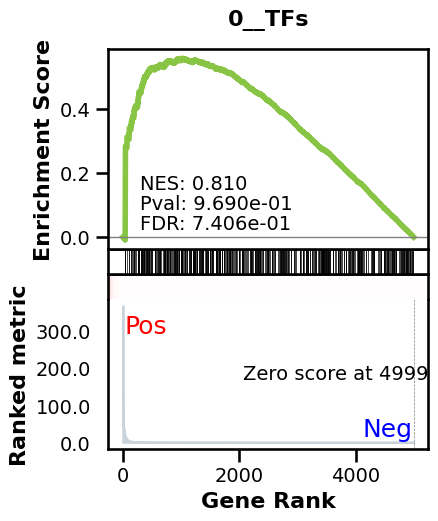

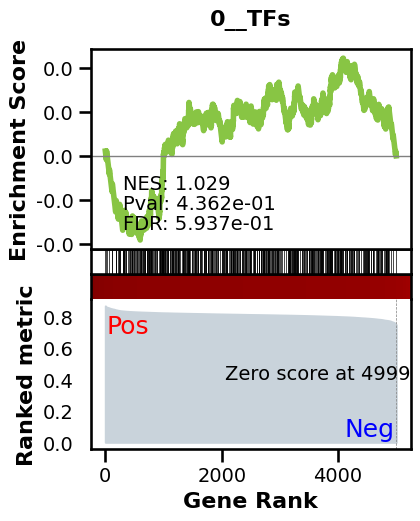

_________________________________________
TF specific enrichment


found some significant results for  28.571428571428573 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.0015901492455931698 
recall:  1.0 
random precision: 0.0015905976802365973


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 52.90it/s]

  9%|▉         | 12/128 [00:00<00:02, 52.85it/s]

 14%|█▍        | 18/128 [00:00<00:02, 52.86it/s]

 19%|█▉        | 24/128 [00:00<00:01, 52.88it/s]

 23%|██▎       | 30/128 [00:00<00:01, 52.82it/s]

 28%|██▊       | 36/128 [00:00<00:01, 52.83it/s]

 33%|███▎      | 42/128 [00:00<00:01, 52.83it/s]

 38%|███▊      | 48/128 [00:00<00:01, 52.80it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.79it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.81it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 52.83it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 52.83it/s]

 61%|██████    | 78/128 [00:01<00:00, 52.80it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 52.80it/s]

 70%|███████   | 90/128 [00:01<00:00, 52.82it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 52.81it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.77it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.73it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 52.75it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.74it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 52.75it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 52.77it/s]

Average Precision (AP):  0.0017633733578335167
Area Under Precision-Recall Curve (AUPRC):  0.0017617928059436622
EPR: 1.2896230587349549


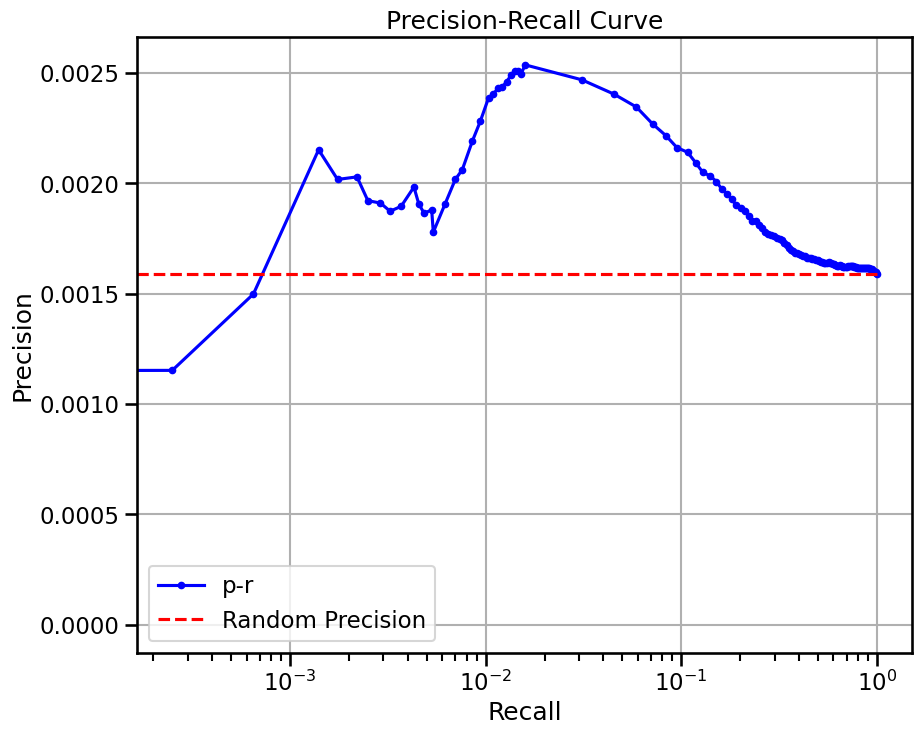

base enrichment


Top central genes: []


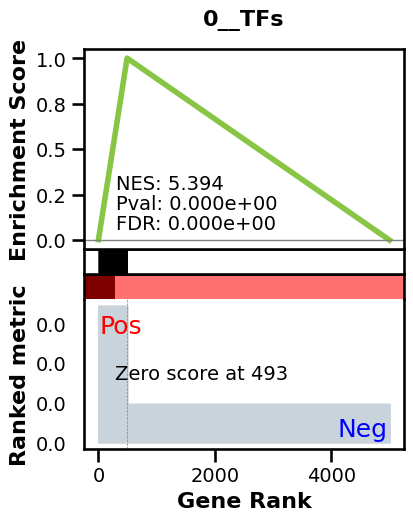

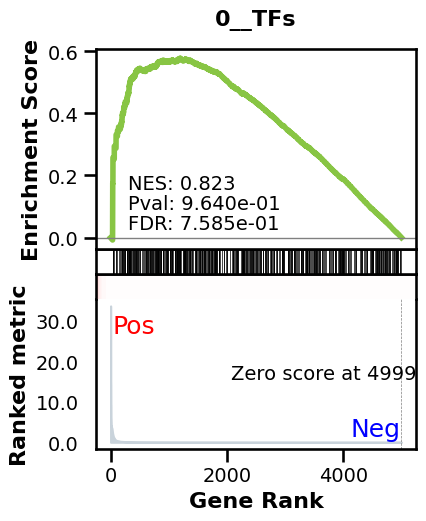

_________________________________________
TF specific enrichment


found some significant results for  14.285714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.006406149061914498 
recall:  0.48725382385284416 
random precision: 0.0015905976802365973


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 53.00it/s]

  9%|▉         | 12/128 [00:00<00:02, 52.95it/s]

 14%|█▍        | 18/128 [00:00<00:02, 52.99it/s]

 19%|█▉        | 24/128 [00:00<00:01, 52.95it/s]

 23%|██▎       | 30/128 [00:00<00:01, 52.94it/s]

 28%|██▊       | 36/128 [00:00<00:01, 52.96it/s]

 33%|███▎      | 42/128 [00:00<00:01, 52.96it/s]

 38%|███▊      | 48/128 [00:00<00:01, 52.27it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.51it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.62it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 52.72it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 52.83it/s]

 61%|██████    | 78/128 [00:01<00:00, 52.85it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 52.87it/s]

 70%|███████   | 90/128 [00:01<00:00, 52.88it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 52.86it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.91it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.94it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 52.92it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.95it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 52.87it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 52.81it/s]

Average Precision (AP):  0.00490069356407933
Area Under Precision-Recall Curve (AUPRC):  0.00451958338904427
EPR: 8.525755976704975


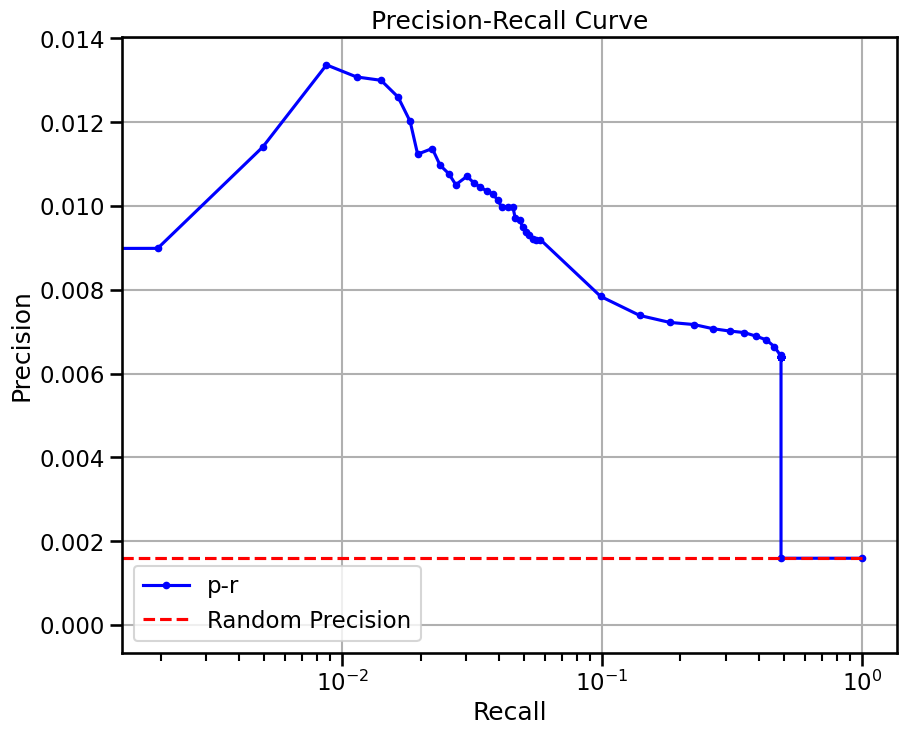

base enrichment


Top central genes: []
The DataFrame contains only the same values.


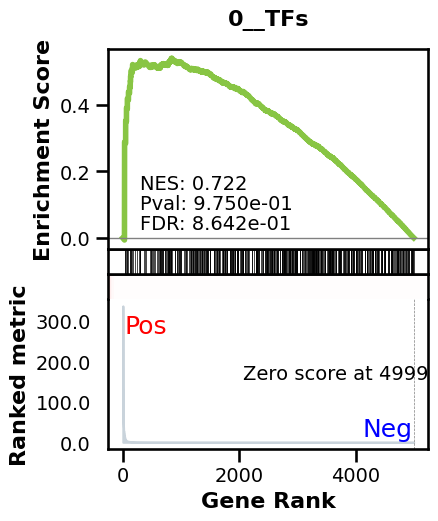

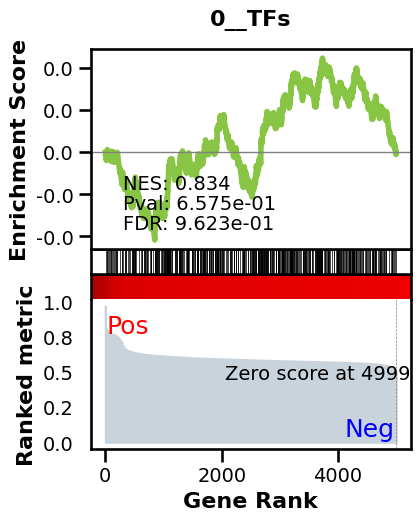

_________________________________________
TF specific enrichment


found some significant results for  30.357142857142858 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.0015901492455931698 
recall:  1.0 
random precision: 0.0015905976802365973


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 52.71it/s]

  9%|▉         | 12/128 [00:00<00:02, 52.94it/s]

 14%|█▍        | 18/128 [00:00<00:02, 52.83it/s]

 19%|█▉        | 24/128 [00:00<00:01, 52.91it/s]

 23%|██▎       | 30/128 [00:00<00:01, 52.84it/s]

 28%|██▊       | 36/128 [00:00<00:01, 52.88it/s]

 33%|███▎      | 42/128 [00:00<00:01, 52.80it/s]

 38%|███▊      | 48/128 [00:00<00:01, 52.85it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.78it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.80it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 52.82it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 52.78it/s]

 61%|██████    | 78/128 [00:01<00:00, 52.83it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 52.86it/s]

 70%|███████   | 90/128 [00:01<00:00, 52.85it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 52.87it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.90it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.86it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 52.89it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.93it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 52.92it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 52.84it/s]

Average Precision (AP):  0.0020339067272519057
Area Under Precision-Recall Curve (AUPRC):  0.002032604206593234
EPR: 2.2717588288165436


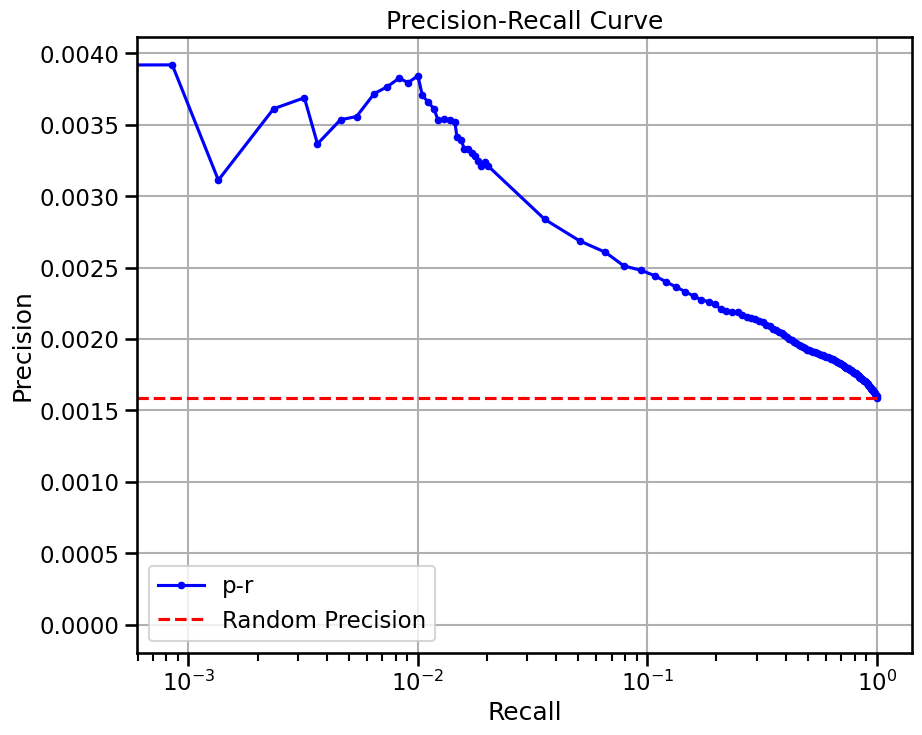

base enrichment


Top central genes: []


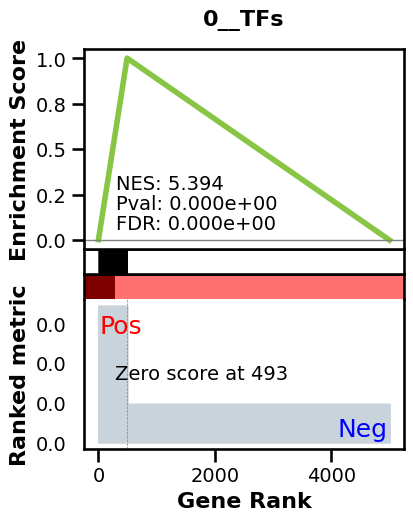

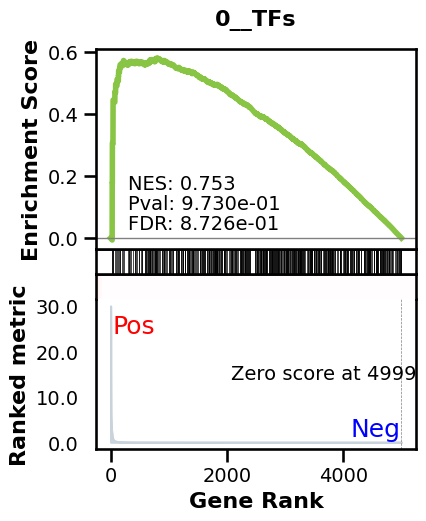

_________________________________________
TF specific enrichment


found some significant results for  14.285714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3547 genes
intersection pct: 0.7094
precision:  0.006406149061914498 
recall:  0.48725382385284416 
random precision: 0.0015905976802365973


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 52.84it/s]

  9%|▉         | 12/128 [00:00<00:02, 52.77it/s]

 14%|█▍        | 18/128 [00:00<00:02, 52.84it/s]

 19%|█▉        | 24/128 [00:00<00:01, 52.82it/s]

 23%|██▎       | 30/128 [00:00<00:01, 52.84it/s]

 28%|██▊       | 36/128 [00:00<00:01, 52.78it/s]

 33%|███▎      | 42/128 [00:00<00:01, 52.74it/s]

 38%|███▊      | 48/128 [00:00<00:01, 52.76it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.75it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.79it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 52.82it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 52.81it/s]

 61%|██████    | 78/128 [00:01<00:00, 52.81it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 52.82it/s]

 70%|███████   | 90/128 [00:01<00:00, 52.82it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 52.83it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.80it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.80it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 52.79it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.82it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 52.85it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 52.78it/s]

Average Precision (AP):  0.005496918326938673
Area Under Precision-Recall Curve (AUPRC):  0.00507452320752314
EPR: 8.88956712887026


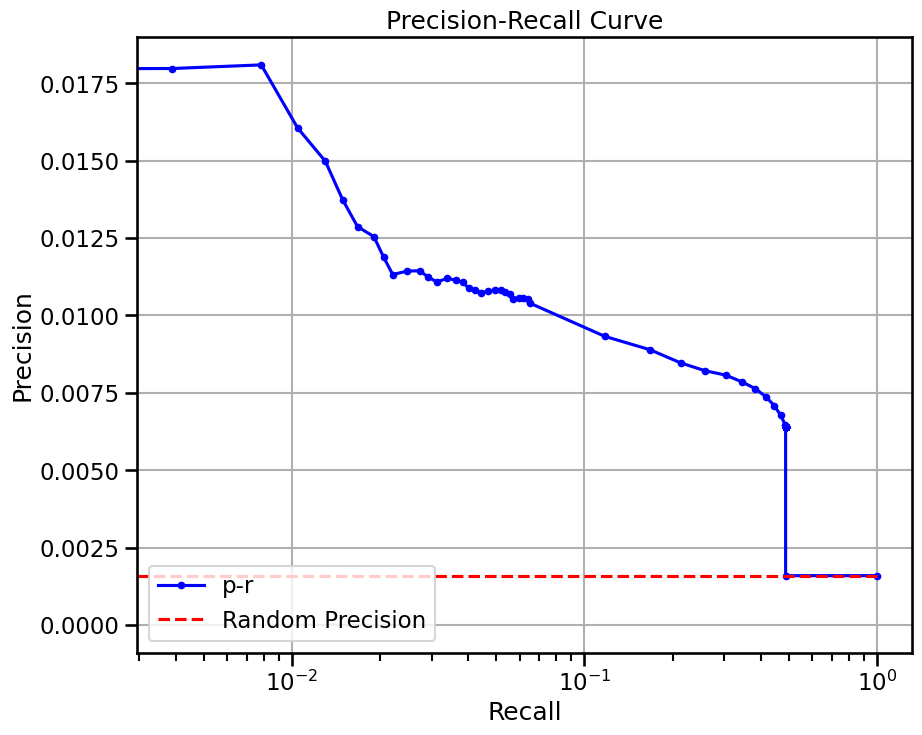

  0%|          | 0/22 [00:00<?, ?it/s]

  5%|▍         | 1/22 [00:02<00:52,  2.50s/it]

  9%|▉         | 2/22 [00:03<00:31,  1.60s/it]

 14%|█▎        | 3/22 [00:04<00:24,  1.31s/it]

 18%|█▊        | 4/22 [00:05<00:21,  1.17s/it]

 23%|██▎       | 5/22 [00:06<00:18,  1.10s/it]

 27%|██▋       | 6/22 [00:07<00:16,  1.05s/it]

 32%|███▏      | 7/22 [00:08<00:15,  1.04s/it]

 36%|███▋      | 8/22 [00:09<00:14,  1.02s/it]

 41%|████      | 9/22 [00:10<00:13,  1.00s/it]

 45%|████▌     | 10/22 [00:11<00:11,  1.01it/s]

 50%|█████     | 11/22 [00:12<00:10,  1.02it/s]

 55%|█████▍    | 12/22 [00:13<00:09,  1.02it/s]

 59%|█████▉    | 13/22 [00:14<00:08,  1.03it/s]

 64%|██████▎   | 14/22 [00:15<00:07,  1.03it/s]

 68%|██████▊   | 15/22 [00:16<00:06,  1.03it/s]

 73%|███████▎  | 16/22 [00:17<00:05,  1.03it/s]

 77%|███████▋  | 17/22 [00:18<00:04,  1.03it/s]

 82%|████████▏ | 18/22 [00:18<00:03,  1.04it/s]

 86%|████████▋ | 19/22 [00:19<00:02,  1.04it/s]

 91%|█████████ | 20/22 [00:20<00:01,  1.04it/s]

 95%|█████████▌| 21/22 [00:21<00:00,  1.04it/s]

100%|██████████| 22/22 [00:22<00:00,  1.20it/s]

100%|██████████| 22/22 [00:22<00:00,  1.03s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


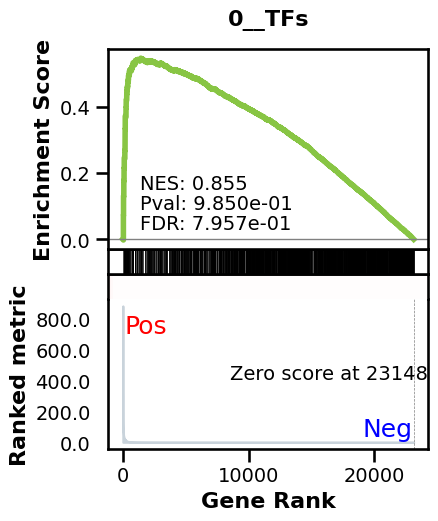

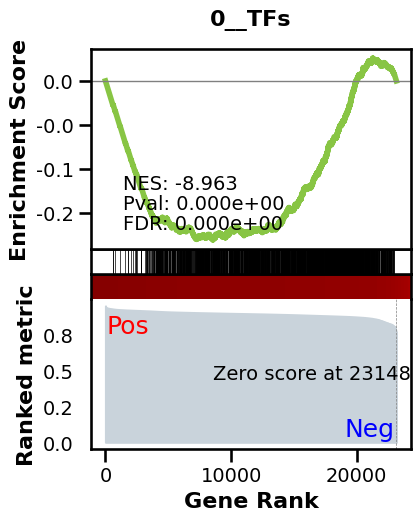

_________________________________________
TF specific enrichment


found some significant results for  54.464285714285715 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:41,  3.03it/s]

  2%|▏         | 2/128 [00:00<00:39,  3.20it/s]

  2%|▏         | 3/128 [00:00<00:38,  3.25it/s]

  3%|▎         | 4/128 [00:01<00:37,  3.29it/s]

  4%|▍         | 5/128 [00:01<00:37,  3.30it/s]

  5%|▍         | 6/128 [00:01<00:36,  3.31it/s]

  5%|▌         | 7/128 [00:02<00:36,  3.32it/s]

  6%|▋         | 8/128 [00:02<00:36,  3.32it/s]

  7%|▋         | 9/128 [00:02<00:35,  3.33it/s]

  8%|▊         | 10/128 [00:03<00:35,  3.33it/s]

  9%|▊         | 11/128 [00:03<00:35,  3.33it/s]

  9%|▉         | 12/128 [00:03<00:34,  3.33it/s]

 10%|█         | 13/128 [00:03<00:34,  3.33it/s]

 11%|█         | 14/128 [00:04<00:34,  3.33it/s]

 12%|█▏        | 15/128 [00:04<00:33,  3.32it/s]

 12%|█▎        | 16/128 [00:04<00:33,  3.32it/s]

 13%|█▎        | 17/128 [00:05<00:33,  3.32it/s]

 14%|█▍        | 18/128 [00:05<00:33,  3.33it/s]

 15%|█▍        | 19/128 [00:05<00:32,  3.32it/s]

 16%|█▌        | 20/128 [00:06<00:32,  3.33it/s]

 16%|█▋        | 21/128 [00:06<00:32,  3.33it/s]

 17%|█▋        | 22/128 [00:06<00:31,  3.33it/s]

 18%|█▊        | 23/128 [00:06<00:31,  3.33it/s]

 19%|█▉        | 24/128 [00:07<00:31,  3.33it/s]

 20%|█▉        | 25/128 [00:07<00:30,  3.33it/s]

 20%|██        | 26/128 [00:07<00:30,  3.33it/s]

 21%|██        | 27/128 [00:08<00:30,  3.33it/s]

 22%|██▏       | 28/128 [00:08<00:30,  3.33it/s]

 23%|██▎       | 29/128 [00:08<00:29,  3.33it/s]

 23%|██▎       | 30/128 [00:09<00:29,  3.33it/s]

 24%|██▍       | 31/128 [00:09<00:29,  3.33it/s]

 25%|██▌       | 32/128 [00:09<00:28,  3.32it/s]

 26%|██▌       | 33/128 [00:09<00:28,  3.33it/s]

 27%|██▋       | 34/128 [00:10<00:28,  3.33it/s]

 27%|██▋       | 35/128 [00:10<00:27,  3.33it/s]

 28%|██▊       | 36/128 [00:10<00:27,  3.33it/s]

 29%|██▉       | 37/128 [00:11<00:27,  3.32it/s]

 30%|██▉       | 38/128 [00:11<00:27,  3.33it/s]

 30%|███       | 39/128 [00:11<00:26,  3.33it/s]

 31%|███▏      | 40/128 [00:12<00:26,  3.33it/s]

 32%|███▏      | 41/128 [00:12<00:26,  3.33it/s]

 33%|███▎      | 42/128 [00:12<00:25,  3.33it/s]

 34%|███▎      | 43/128 [00:12<00:25,  3.33it/s]

 34%|███▍      | 44/128 [00:13<00:25,  3.32it/s]

 35%|███▌      | 45/128 [00:13<00:24,  3.32it/s]

 36%|███▌      | 46/128 [00:13<00:24,  3.33it/s]

 37%|███▋      | 47/128 [00:14<00:24,  3.32it/s]

 38%|███▊      | 48/128 [00:14<00:24,  3.33it/s]

 38%|███▊      | 49/128 [00:14<00:23,  3.33it/s]

 39%|███▉      | 50/128 [00:15<00:23,  3.33it/s]

 40%|███▉      | 51/128 [00:15<00:23,  3.33it/s]

 41%|████      | 52/128 [00:15<00:22,  3.33it/s]

 41%|████▏     | 53/128 [00:15<00:22,  3.33it/s]

 42%|████▏     | 54/128 [00:16<00:22,  3.32it/s]

 43%|████▎     | 55/128 [00:16<00:21,  3.33it/s]

 44%|████▍     | 56/128 [00:16<00:21,  3.33it/s]

 45%|████▍     | 57/128 [00:17<00:21,  3.32it/s]

 45%|████▌     | 58/128 [00:17<00:21,  3.33it/s]

 46%|████▌     | 59/128 [00:17<00:20,  3.32it/s]

 47%|████▋     | 60/128 [00:18<00:20,  3.32it/s]

 48%|████▊     | 61/128 [00:18<00:20,  3.32it/s]

 48%|████▊     | 62/128 [00:18<00:19,  3.32it/s]

 49%|████▉     | 63/128 [00:18<00:19,  3.32it/s]

 50%|█████     | 64/128 [00:19<00:19,  3.33it/s]

 51%|█████     | 65/128 [00:19<00:18,  3.33it/s]

 52%|█████▏    | 66/128 [00:19<00:18,  3.33it/s]

 52%|█████▏    | 67/128 [00:20<00:18,  3.33it/s]

 53%|█████▎    | 68/128 [00:20<00:18,  3.32it/s]

 54%|█████▍    | 69/128 [00:20<00:19,  3.05it/s]

 55%|█████▍    | 70/128 [00:21<00:18,  3.12it/s]

 55%|█████▌    | 71/128 [00:21<00:17,  3.18it/s]

 56%|█████▋    | 72/128 [00:21<00:17,  3.22it/s]

 57%|█████▋    | 73/128 [00:22<00:16,  3.25it/s]

 58%|█████▊    | 74/128 [00:22<00:16,  3.27it/s]

 59%|█████▊    | 75/128 [00:22<00:16,  3.29it/s]

 59%|█████▉    | 76/128 [00:22<00:15,  3.30it/s]

 60%|██████    | 77/128 [00:23<00:15,  3.31it/s]

 61%|██████    | 78/128 [00:23<00:15,  3.31it/s]

 62%|██████▏   | 79/128 [00:23<00:14,  3.31it/s]

 62%|██████▎   | 80/128 [00:24<00:14,  3.31it/s]

 63%|██████▎   | 81/128 [00:24<00:14,  3.32it/s]

 64%|██████▍   | 82/128 [00:24<00:13,  3.32it/s]

 65%|██████▍   | 83/128 [00:25<00:13,  3.33it/s]

 66%|██████▌   | 84/128 [00:25<00:13,  3.33it/s]

 66%|██████▋   | 85/128 [00:25<00:12,  3.33it/s]

 67%|██████▋   | 86/128 [00:25<00:12,  3.33it/s]

 68%|██████▊   | 87/128 [00:26<00:12,  3.33it/s]

 69%|██████▉   | 88/128 [00:26<00:12,  3.33it/s]

 70%|██████▉   | 89/128 [00:26<00:11,  3.33it/s]

 70%|███████   | 90/128 [00:27<00:11,  3.33it/s]

 71%|███████   | 91/128 [00:27<00:11,  3.33it/s]

 72%|███████▏  | 92/128 [00:27<00:10,  3.32it/s]

 73%|███████▎  | 93/128 [00:28<00:10,  3.32it/s]

 73%|███████▎  | 94/128 [00:28<00:10,  3.31it/s]

 74%|███████▍  | 95/128 [00:28<00:09,  3.32it/s]

 75%|███████▌  | 96/128 [00:28<00:09,  3.32it/s]

 76%|███████▌  | 97/128 [00:29<00:09,  3.32it/s]

 77%|███████▋  | 98/128 [00:29<00:09,  3.33it/s]

 77%|███████▋  | 99/128 [00:29<00:08,  3.33it/s]

 78%|███████▊  | 100/128 [00:30<00:08,  3.32it/s]

 79%|███████▉  | 101/128 [00:30<00:08,  3.33it/s]

 80%|███████▉  | 102/128 [00:30<00:07,  3.33it/s]

 80%|████████  | 103/128 [00:31<00:07,  3.33it/s]

 81%|████████▏ | 104/128 [00:31<00:07,  3.33it/s]

 82%|████████▏ | 105/128 [00:31<00:06,  3.33it/s]

 83%|████████▎ | 106/128 [00:31<00:06,  3.33it/s]

 84%|████████▎ | 107/128 [00:32<00:06,  3.33it/s]

 84%|████████▍ | 108/128 [00:32<00:06,  3.33it/s]

 85%|████████▌ | 109/128 [00:32<00:05,  3.32it/s]

 86%|████████▌ | 110/128 [00:33<00:05,  3.31it/s]

 87%|████████▋ | 111/128 [00:33<00:05,  3.31it/s]

 88%|████████▊ | 112/128 [00:33<00:04,  3.32it/s]

 88%|████████▊ | 113/128 [00:34<00:04,  3.32it/s]

 89%|████████▉ | 114/128 [00:34<00:04,  3.33it/s]

 90%|████████▉ | 115/128 [00:34<00:03,  3.33it/s]

 91%|█████████ | 116/128 [00:34<00:03,  3.33it/s]

 91%|█████████▏| 117/128 [00:35<00:03,  3.20it/s]

 92%|█████████▏| 118/128 [00:35<00:03,  3.24it/s]

 93%|█████████▎| 119/128 [00:35<00:02,  3.27it/s]

 94%|█████████▍| 120/128 [00:36<00:02,  3.28it/s]

 95%|█████████▍| 121/128 [00:36<00:02,  3.30it/s]

 95%|█████████▌| 122/128 [00:36<00:01,  3.31it/s]

 96%|█████████▌| 123/128 [00:37<00:01,  3.32it/s]

 97%|█████████▋| 124/128 [00:37<00:01,  3.32it/s]

 98%|█████████▊| 125/128 [00:37<00:00,  3.32it/s]

 98%|█████████▊| 126/128 [00:38<00:00,  3.33it/s]

 99%|█████████▉| 127/128 [00:38<00:00,  3.33it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:38<00:00,  3.33it/s]

100%|██████████| 128/128 [00:38<00:00,  3.31it/s]

Average Precision (AP):  0.0006705076265571396
Area Under Precision-Recall Curve (AUPRC):  0.000670375276022377


EPR: 1.1494995041171794


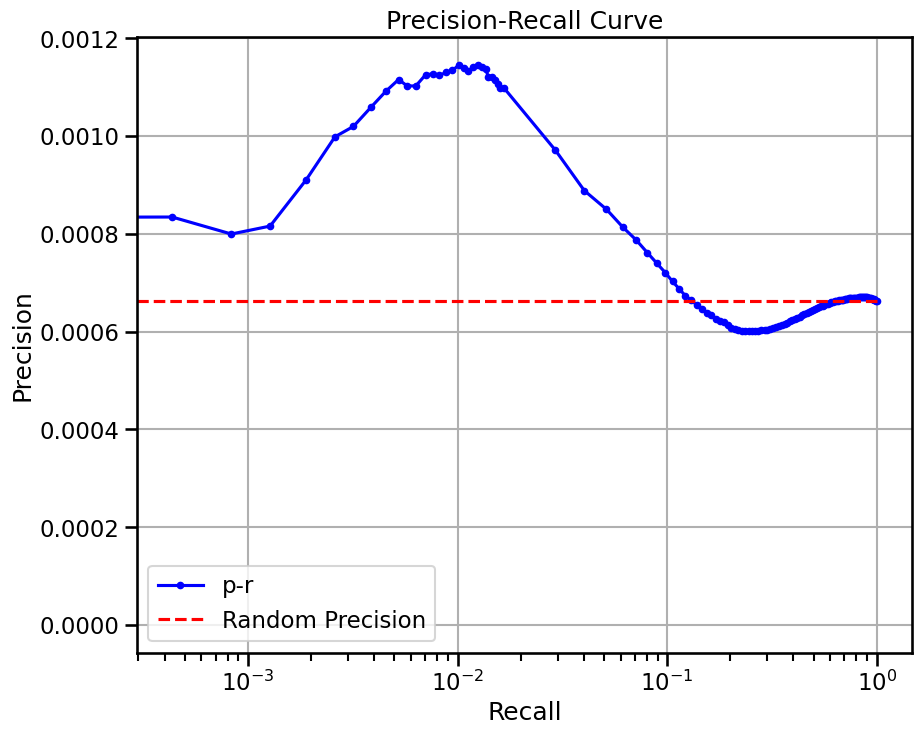

  0%|          | 0/44 [00:00<?, ?it/s]

  2%|▏         | 1/44 [00:03<02:16,  3.18s/it]

  5%|▍         | 2/44 [00:05<01:53,  2.69s/it]

  7%|▋         | 3/44 [00:07<01:31,  2.24s/it]

  9%|▉         | 4/44 [00:08<01:16,  1.90s/it]

 11%|█▏        | 5/44 [00:10<01:06,  1.72s/it]

 14%|█▎        | 6/44 [00:11<01:00,  1.61s/it]

 16%|█▌        | 7/44 [00:12<00:56,  1.54s/it]

 18%|█▊        | 8/44 [00:14<00:53,  1.49s/it]

 20%|██        | 9/44 [00:15<00:50,  1.46s/it]

 23%|██▎       | 10/44 [00:16<00:48,  1.43s/it]

 25%|██▌       | 11/44 [00:18<00:46,  1.42s/it]

 27%|██▋       | 12/44 [00:19<00:44,  1.40s/it]

 30%|██▉       | 13/44 [00:21<00:42,  1.39s/it]

 32%|███▏      | 14/44 [00:22<00:41,  1.37s/it]

 34%|███▍      | 15/44 [00:23<00:39,  1.36s/it]

 36%|███▋      | 16/44 [00:25<00:38,  1.37s/it]

 39%|███▊      | 17/44 [00:26<00:36,  1.36s/it]

 41%|████      | 18/44 [00:27<00:35,  1.36s/it]

 43%|████▎     | 19/44 [00:29<00:33,  1.35s/it]

 45%|████▌     | 20/44 [00:30<00:32,  1.35s/it]

 48%|████▊     | 21/44 [00:31<00:31,  1.35s/it]

 50%|█████     | 22/44 [00:33<00:29,  1.35s/it]

 52%|█████▏    | 23/44 [00:34<00:28,  1.35s/it]

 55%|█████▍    | 24/44 [00:35<00:26,  1.34s/it]

 57%|█████▋    | 25/44 [00:37<00:25,  1.34s/it]

 59%|█████▉    | 26/44 [00:38<00:24,  1.34s/it]

 61%|██████▏   | 27/44 [00:39<00:22,  1.34s/it]

 64%|██████▎   | 28/44 [00:41<00:21,  1.34s/it]

 66%|██████▌   | 29/44 [00:42<00:20,  1.34s/it]

 68%|██████▊   | 30/44 [00:43<00:18,  1.33s/it]

 70%|███████   | 31/44 [00:45<00:17,  1.33s/it]

 73%|███████▎  | 32/44 [00:46<00:15,  1.32s/it]

 75%|███████▌  | 33/44 [00:47<00:14,  1.31s/it]

 77%|███████▋  | 34/44 [00:49<00:12,  1.29s/it]

 80%|███████▉  | 35/44 [00:50<00:11,  1.28s/it]

 82%|████████▏ | 36/44 [00:51<00:10,  1.26s/it]

 84%|████████▍ | 37/44 [00:52<00:08,  1.26s/it]

 86%|████████▋ | 38/44 [00:53<00:07,  1.25s/it]

 89%|████████▊ | 39/44 [00:55<00:06,  1.25s/it]

 91%|█████████ | 40/44 [00:56<00:04,  1.24s/it]

 93%|█████████▎| 41/44 [00:57<00:03,  1.24s/it]

 95%|█████████▌| 42/44 [00:58<00:02,  1.24s/it]

 98%|█████████▊| 43/44 [01:00<00:01,  1.24s/it]

100%|██████████| 44/44 [01:00<00:00,  1.08it/s]

100%|██████████| 44/44 [01:00<00:00,  1.38s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


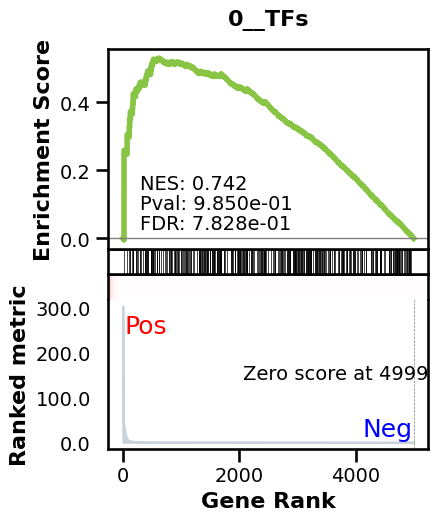

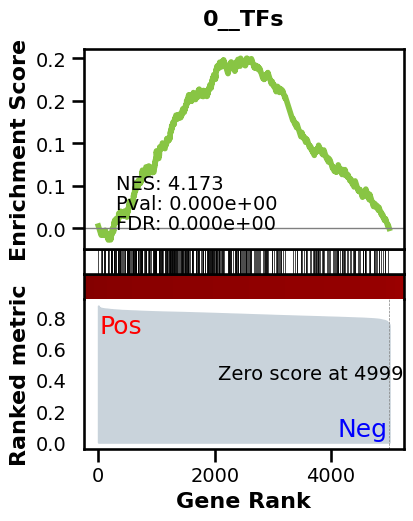

_________________________________________
TF specific enrichment


found some significant results for  17.857142857142858 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0008040620608093005 
recall:  1.0 
random precision: 0.0008042949872463833


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:02, 60.08it/s]

 11%|█         | 14/128 [00:00<00:01, 60.08it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.17it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.20it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.17it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.09it/s]

 38%|███▊      | 49/128 [00:00<00:01, 60.08it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.08it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.09it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.08it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.11it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 58.28it/s]

 70%|███████   | 90/128 [00:01<00:00, 58.72it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 59.07it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 59.31it/s]

 85%|████████▌ | 109/128 [00:01<00:00, 59.59it/s]

 91%|█████████ | 116/128 [00:01<00:00, 59.77it/s]

 96%|█████████▌| 123/128 [00:02<00:00, 59.90it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.73it/s]

Average Precision (AP):  0.000928061365459411
Area Under Precision-Recall Curve (AUPRC):  0.0009266000577505981
EPR: 2.078615374620864


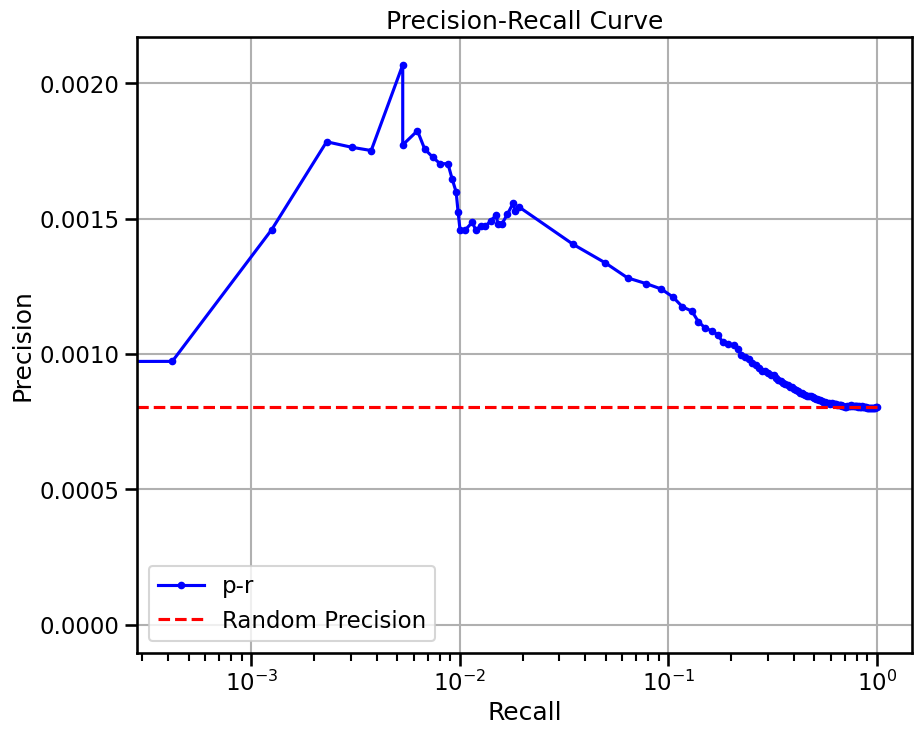

base enrichment


Top central genes: []


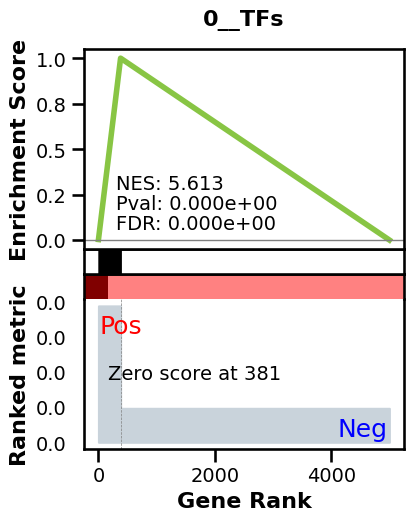

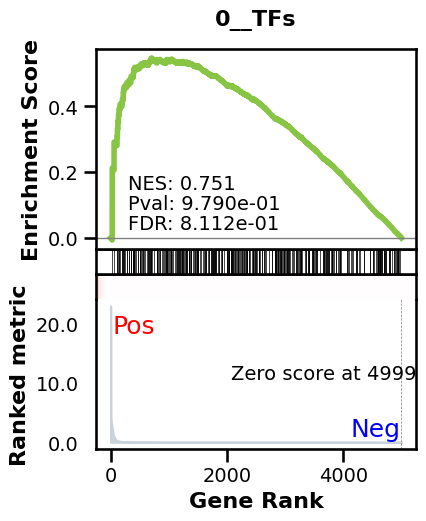

_________________________________________
TF specific enrichment


found some significant results for  10.714285714285714 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0032449520061130707 
recall:  0.3880254511317409 
random precision: 0.0008042949872463833


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 58.15it/s]

  9%|▉         | 12/128 [00:00<00:01, 59.08it/s]

 14%|█▍        | 18/128 [00:00<00:01, 59.43it/s]

 19%|█▉        | 24/128 [00:00<00:01, 59.61it/s]

 23%|██▎       | 30/128 [00:00<00:01, 59.64it/s]

 28%|██▊       | 36/128 [00:00<00:01, 59.67it/s]

 33%|███▎      | 42/128 [00:00<00:01, 59.72it/s]

 38%|███▊      | 48/128 [00:00<00:01, 59.78it/s]

 42%|████▏     | 54/128 [00:00<00:01, 59.76it/s]

 47%|████▋     | 60/128 [00:01<00:01, 59.70it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 59.73it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 59.72it/s]

 61%|██████    | 78/128 [00:01<00:00, 59.76it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 59.78it/s]

 70%|███████   | 90/128 [00:01<00:00, 59.80it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 59.82it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 59.79it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 59.83it/s]

 89%|████████▉ | 114/128 [00:01<00:00, 59.68it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 59.70it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 59.77it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 59.66it/s]

Average Precision (AP):  0.0022310567248462697
Area Under Precision-Recall Curve (AUPRC):  0.0019773097151613308
EPR: 6.9389811822055245


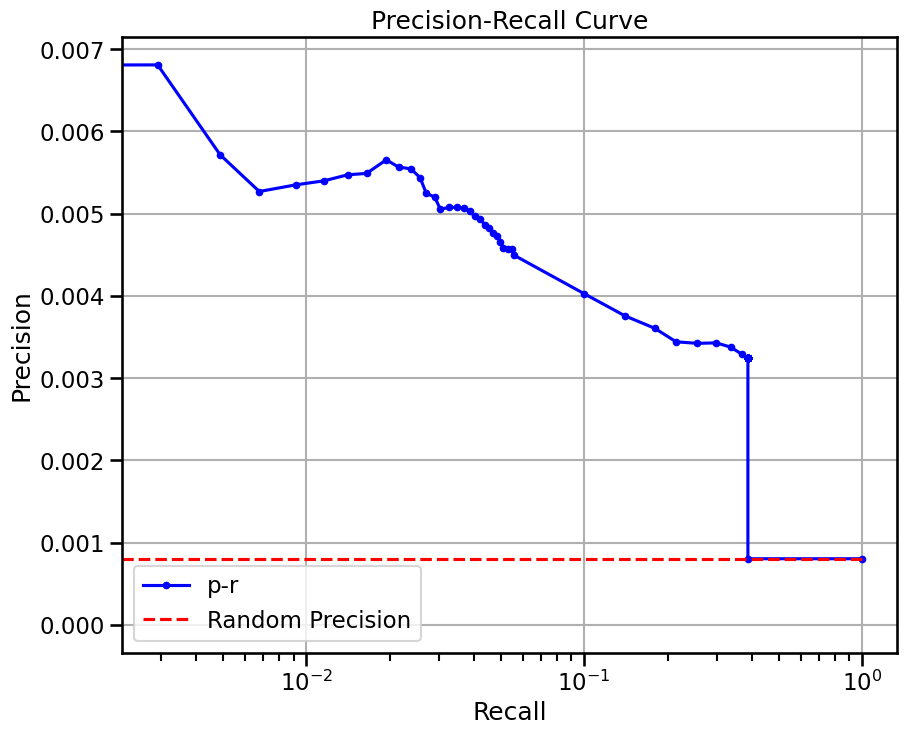

base enrichment


Top central genes: []
The DataFrame contains only the same values.


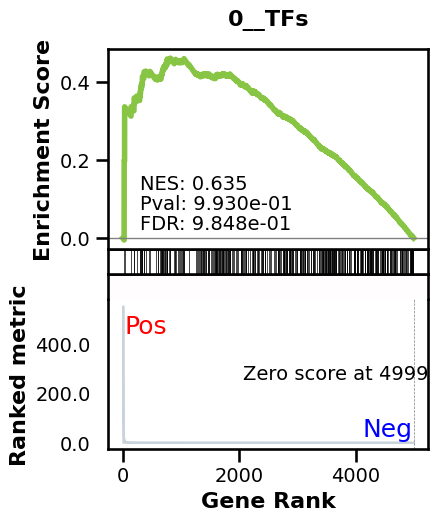

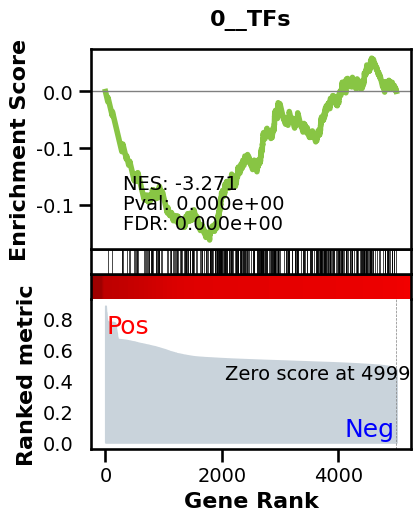

_________________________________________
TF specific enrichment


found some significant results for  17.857142857142858 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0008040620608093005 
recall:  1.0 
random precision: 0.0008042949872463833


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 59.74it/s]

  9%|▉         | 12/128 [00:00<00:01, 59.13it/s]

 15%|█▍        | 19/128 [00:00<00:01, 60.41it/s]

 20%|██        | 26/128 [00:00<00:01, 61.00it/s]

 26%|██▌       | 33/128 [00:00<00:01, 61.34it/s]

 31%|███▏      | 40/128 [00:00<00:01, 61.53it/s]

 37%|███▋      | 47/128 [00:00<00:01, 61.67it/s]

 42%|████▏     | 54/128 [00:00<00:01, 61.78it/s]

 48%|████▊     | 61/128 [00:00<00:01, 61.81it/s]

 53%|█████▎    | 68/128 [00:01<00:00, 61.86it/s]

 59%|█████▊    | 75/128 [00:01<00:00, 61.86it/s]

 64%|██████▍   | 82/128 [00:01<00:00, 61.90it/s]

 70%|██████▉   | 89/128 [00:01<00:00, 61.91it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 61.92it/s]

 80%|████████  | 103/128 [00:01<00:00, 61.92it/s]

 86%|████████▌ | 110/128 [00:01<00:00, 61.28it/s]

 91%|█████████▏| 117/128 [00:01<00:00, 61.43it/s]

 97%|█████████▋| 124/128 [00:02<00:00, 61.52it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 61.49it/s]

Average Precision (AP):  0.0009400230130255209
Area Under Precision-Recall Curve (AUPRC):  0.0009379797835494664
EPR: 4.433725518754921


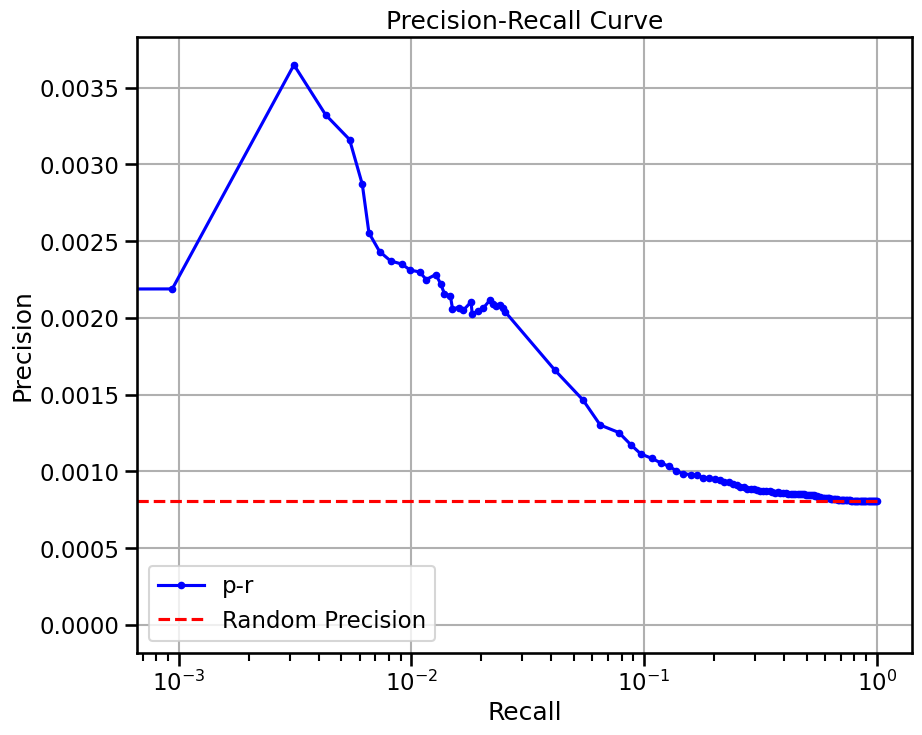

base enrichment


Top central genes: []


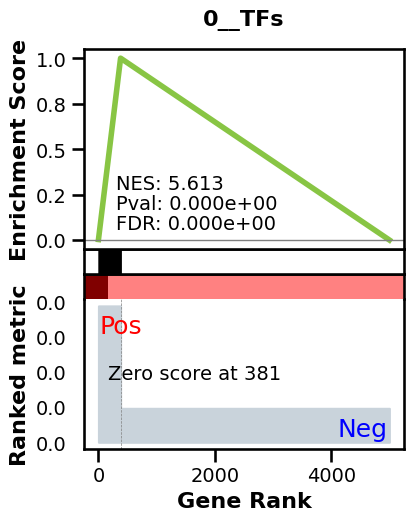

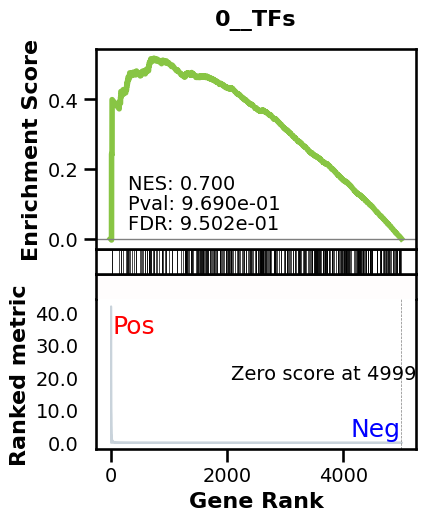

_________________________________________
TF specific enrichment


found some significant results for  3.5714285714285716 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3453 genes
intersection pct: 0.6906
precision:  0.0032449520061130707 
recall:  0.3880254511317409 
random precision: 0.0008042949872463833


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 51.77it/s]

  9%|▉         | 12/128 [00:00<00:02, 51.89it/s]

 14%|█▍        | 18/128 [00:00<00:02, 52.06it/s]

 19%|█▉        | 24/128 [00:00<00:01, 52.05it/s]

 23%|██▎       | 30/128 [00:00<00:01, 51.83it/s]

 28%|██▊       | 36/128 [00:00<00:01, 51.82it/s]

 33%|███▎      | 42/128 [00:00<00:01, 51.90it/s]

 38%|███▊      | 48/128 [00:00<00:01, 51.96it/s]

 42%|████▏     | 54/128 [00:01<00:01, 52.00it/s]

 47%|████▋     | 60/128 [00:01<00:01, 52.01it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 52.00it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 52.05it/s]

 61%|██████    | 78/128 [00:01<00:00, 52.06it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 52.10it/s]

 70%|███████   | 90/128 [00:01<00:00, 52.16it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 52.15it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 52.15it/s]

 84%|████████▍ | 108/128 [00:02<00:00, 52.19it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 52.15it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 52.06it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 51.64it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 51.94it/s]

Average Precision (AP):  0.0021603283105083486
Area Under Precision-Recall Curve (AUPRC):  0.0018856446754858566
EPR: 8.26555987517377


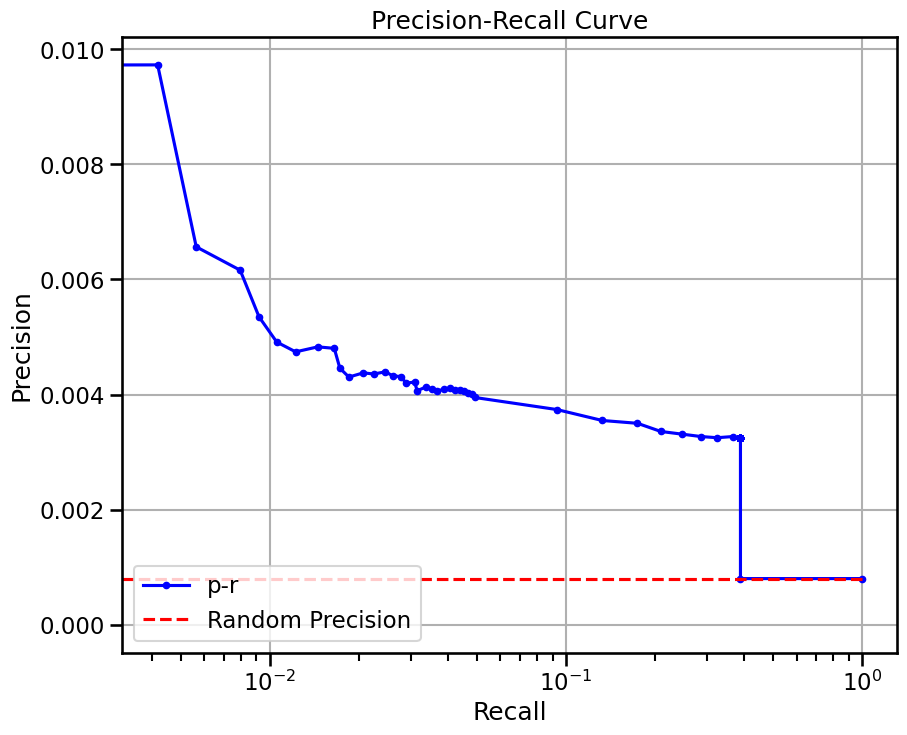

  0%|          | 0/12 [00:00<?, ?it/s]

  8%|▊         | 1/12 [00:02<00:29,  2.65s/it]

 17%|█▋        | 2/12 [00:03<00:16,  1.68s/it]

 25%|██▌       | 3/12 [00:04<00:12,  1.36s/it]

 33%|███▎      | 4/12 [00:05<00:09,  1.20s/it]

 42%|████▏     | 5/12 [00:06<00:07,  1.12s/it]

 50%|█████     | 6/12 [00:07<00:06,  1.07s/it]

 58%|█████▊    | 7/12 [00:08<00:05,  1.04s/it]

 67%|██████▋   | 8/12 [00:09<00:04,  1.02s/it]

 75%|███████▌  | 9/12 [00:10<00:03,  1.00s/it]

 83%|████████▎ | 10/12 [00:11<00:01,  1.01it/s]

 92%|█████████▏| 11/12 [00:12<00:00,  1.02it/s]

100%|██████████| 12/12 [00:13<00:00,  1.07it/s]

100%|██████████| 12/12 [00:13<00:00,  1.12s/it]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


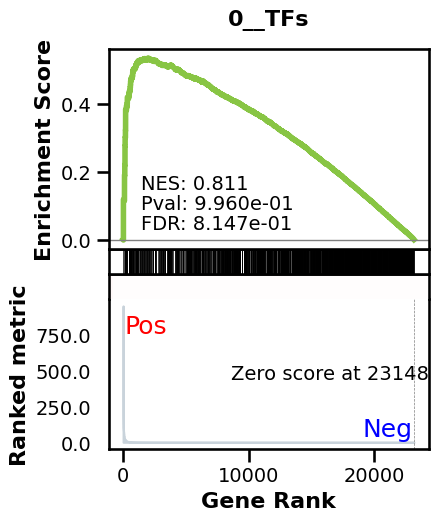

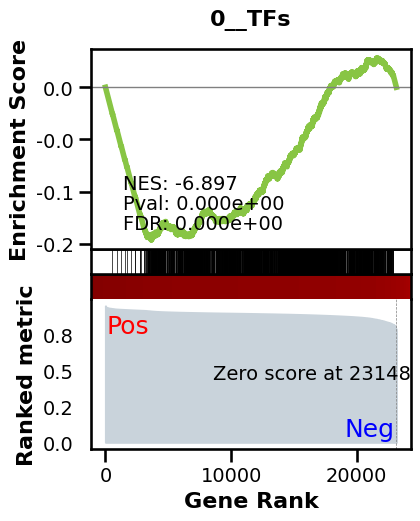

_________________________________________
TF specific enrichment


found some significant results for  57.142857142857146 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:38,  3.33it/s]

  2%|▏         | 2/128 [00:00<00:37,  3.34it/s]

  2%|▏         | 3/128 [00:00<00:37,  3.35it/s]

  3%|▎         | 4/128 [00:01<00:37,  3.34it/s]

  4%|▍         | 5/128 [00:01<00:36,  3.34it/s]

  5%|▍         | 6/128 [00:01<00:36,  3.34it/s]

  5%|▌         | 7/128 [00:02<00:36,  3.34it/s]

  6%|▋         | 8/128 [00:02<00:35,  3.33it/s]

  7%|▋         | 9/128 [00:02<00:35,  3.31it/s]

  8%|▊         | 10/128 [00:03<00:35,  3.31it/s]

  9%|▊         | 11/128 [00:03<00:35,  3.33it/s]

  9%|▉         | 12/128 [00:03<00:35,  3.22it/s]

 10%|█         | 13/128 [00:03<00:35,  3.26it/s]

 11%|█         | 14/128 [00:04<00:34,  3.29it/s]

 12%|█▏        | 15/128 [00:04<00:34,  3.30it/s]

 12%|█▎        | 16/128 [00:04<00:33,  3.32it/s]

 13%|█▎        | 17/128 [00:05<00:33,  3.26it/s]

 14%|█▍        | 18/128 [00:05<00:33,  3.29it/s]

 15%|█▍        | 19/128 [00:05<00:33,  3.30it/s]

 16%|█▌        | 20/128 [00:06<00:33,  3.22it/s]

 16%|█▋        | 21/128 [00:06<00:32,  3.26it/s]

 17%|█▋        | 22/128 [00:06<00:32,  3.29it/s]

 18%|█▊        | 23/128 [00:06<00:31,  3.31it/s]

 19%|█▉        | 24/128 [00:07<00:31,  3.33it/s]

 20%|█▉        | 25/128 [00:07<00:30,  3.34it/s]

 20%|██        | 26/128 [00:07<00:30,  3.34it/s]

 21%|██        | 27/128 [00:08<00:30,  3.34it/s]

 22%|██▏       | 28/128 [00:08<00:29,  3.34it/s]

 23%|██▎       | 29/128 [00:08<00:29,  3.35it/s]

 23%|██▎       | 30/128 [00:09<00:29,  3.35it/s]

 24%|██▍       | 31/128 [00:09<00:28,  3.35it/s]

 25%|██▌       | 32/128 [00:09<00:28,  3.35it/s]

 26%|██▌       | 33/128 [00:09<00:28,  3.35it/s]

 27%|██▋       | 34/128 [00:10<00:27,  3.36it/s]

 27%|██▋       | 35/128 [00:10<00:27,  3.36it/s]

 28%|██▊       | 36/128 [00:10<00:27,  3.36it/s]

 29%|██▉       | 37/128 [00:11<00:27,  3.36it/s]

 30%|██▉       | 38/128 [00:11<00:26,  3.36it/s]

 30%|███       | 39/128 [00:11<00:26,  3.35it/s]

 31%|███▏      | 40/128 [00:12<00:26,  3.36it/s]

 32%|███▏      | 41/128 [00:12<00:25,  3.36it/s]

 33%|███▎      | 42/128 [00:12<00:25,  3.35it/s]

 34%|███▎      | 43/128 [00:12<00:25,  3.36it/s]

 34%|███▍      | 44/128 [00:13<00:25,  3.36it/s]

 35%|███▌      | 45/128 [00:13<00:24,  3.35it/s]

 36%|███▌      | 46/128 [00:13<00:24,  3.35it/s]

 37%|███▋      | 47/128 [00:14<00:24,  3.35it/s]

 38%|███▊      | 48/128 [00:14<00:23,  3.35it/s]

 38%|███▊      | 49/128 [00:14<00:23,  3.35it/s]

 39%|███▉      | 50/128 [00:15<00:23,  3.35it/s]

 40%|███▉      | 51/128 [00:15<00:22,  3.36it/s]

 41%|████      | 52/128 [00:15<00:22,  3.35it/s]

 41%|████▏     | 53/128 [00:15<00:22,  3.35it/s]

 42%|████▏     | 54/128 [00:16<00:22,  3.36it/s]

 43%|████▎     | 55/128 [00:16<00:21,  3.35it/s]

 44%|████▍     | 56/128 [00:16<00:21,  3.36it/s]

 45%|████▍     | 57/128 [00:17<00:21,  3.36it/s]

 45%|████▌     | 58/128 [00:17<00:20,  3.36it/s]

 46%|████▌     | 59/128 [00:17<00:20,  3.36it/s]

 47%|████▋     | 60/128 [00:17<00:20,  3.36it/s]

 48%|████▊     | 61/128 [00:18<00:19,  3.36it/s]

 48%|████▊     | 62/128 [00:18<00:19,  3.35it/s]

 49%|████▉     | 63/128 [00:18<00:19,  3.36it/s]

 50%|█████     | 64/128 [00:19<00:19,  3.35it/s]

 51%|█████     | 65/128 [00:19<00:18,  3.36it/s]

 52%|█████▏    | 66/128 [00:19<00:18,  3.35it/s]

 52%|█████▏    | 67/128 [00:20<00:18,  3.36it/s]

 53%|█████▎    | 68/128 [00:20<00:17,  3.35it/s]

 54%|█████▍    | 69/128 [00:20<00:17,  3.35it/s]

 55%|█████▍    | 70/128 [00:20<00:17,  3.36it/s]

 55%|█████▌    | 71/128 [00:21<00:17,  3.35it/s]

 56%|█████▋    | 72/128 [00:21<00:16,  3.35it/s]

 57%|█████▋    | 73/128 [00:21<00:16,  3.35it/s]

 58%|█████▊    | 74/128 [00:22<00:16,  3.34it/s]

 59%|█████▊    | 75/128 [00:22<00:15,  3.34it/s]

 59%|█████▉    | 76/128 [00:22<00:15,  3.35it/s]

 60%|██████    | 77/128 [00:23<00:15,  3.35it/s]

 61%|██████    | 78/128 [00:23<00:14,  3.35it/s]

 62%|██████▏   | 79/128 [00:23<00:14,  3.35it/s]

 62%|██████▎   | 80/128 [00:23<00:14,  3.36it/s]

 63%|██████▎   | 81/128 [00:24<00:13,  3.36it/s]

 64%|██████▍   | 82/128 [00:24<00:13,  3.36it/s]

 65%|██████▍   | 83/128 [00:24<00:13,  3.36it/s]

 66%|██████▌   | 84/128 [00:25<00:13,  3.36it/s]

 66%|██████▋   | 85/128 [00:25<00:12,  3.33it/s]

 67%|██████▋   | 86/128 [00:25<00:12,  3.34it/s]

 68%|██████▊   | 87/128 [00:26<00:12,  3.24it/s]

 69%|██████▉   | 88/128 [00:26<00:12,  3.28it/s]

 70%|██████▉   | 89/128 [00:26<00:11,  3.30it/s]

 70%|███████   | 90/128 [00:26<00:11,  3.32it/s]

 71%|███████   | 91/128 [00:27<00:11,  3.32it/s]

 72%|███████▏  | 92/128 [00:27<00:10,  3.29it/s]

 73%|███████▎  | 93/128 [00:27<00:10,  3.31it/s]

 73%|███████▎  | 94/128 [00:28<00:10,  3.27it/s]

 74%|███████▍  | 95/128 [00:28<00:10,  3.30it/s]

 75%|███████▌  | 96/128 [00:28<00:09,  3.32it/s]

 76%|███████▌  | 97/128 [00:29<00:09,  3.33it/s]

 77%|███████▋  | 98/128 [00:29<00:08,  3.34it/s]

 77%|███████▋  | 99/128 [00:29<00:08,  3.35it/s]

 78%|███████▊  | 100/128 [00:29<00:08,  3.35it/s]

 79%|███████▉  | 101/128 [00:30<00:08,  3.36it/s]

 80%|███████▉  | 102/128 [00:30<00:07,  3.36it/s]

 80%|████████  | 103/128 [00:30<00:07,  3.36it/s]

 81%|████████▏ | 104/128 [00:31<00:07,  3.36it/s]

 82%|████████▏ | 105/128 [00:31<00:06,  3.36it/s]

 83%|████████▎ | 106/128 [00:31<00:06,  3.36it/s]

 84%|████████▎ | 107/128 [00:32<00:06,  3.36it/s]

 84%|████████▍ | 108/128 [00:32<00:05,  3.36it/s]

 85%|████████▌ | 109/128 [00:32<00:05,  3.35it/s]

 86%|████████▌ | 110/128 [00:32<00:05,  3.35it/s]

 87%|████████▋ | 111/128 [00:33<00:05,  3.35it/s]

 88%|████████▊ | 112/128 [00:33<00:04,  3.35it/s]

 88%|████████▊ | 113/128 [00:33<00:04,  3.36it/s]

 89%|████████▉ | 114/128 [00:34<00:04,  3.36it/s]

 90%|████████▉ | 115/128 [00:34<00:03,  3.36it/s]

 91%|█████████ | 116/128 [00:34<00:03,  3.36it/s]

 91%|█████████▏| 117/128 [00:35<00:03,  3.36it/s]

 92%|█████████▏| 118/128 [00:35<00:02,  3.36it/s]

 93%|█████████▎| 119/128 [00:35<00:02,  3.36it/s]

 94%|█████████▍| 120/128 [00:35<00:02,  3.36it/s]

 95%|█████████▍| 121/128 [00:36<00:02,  3.36it/s]

 95%|█████████▌| 122/128 [00:36<00:01,  3.36it/s]

 96%|█████████▌| 123/128 [00:36<00:01,  3.36it/s]

 97%|█████████▋| 124/128 [00:37<00:01,  3.36it/s]

 98%|█████████▊| 125/128 [00:37<00:00,  3.35it/s]

 98%|█████████▊| 126/128 [00:37<00:00,  3.35it/s]

 99%|█████████▉| 127/128 [00:38<00:00,  3.35it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:38<00:00,  3.34it/s]

100%|██████████| 128/128 [00:38<00:00,  3.34it/s]

Average Precision (AP):  0.0007058951373426986
Area Under Precision-Recall Curve (AUPRC):  0.0007059151123321531


EPR: 1.5883254707205918


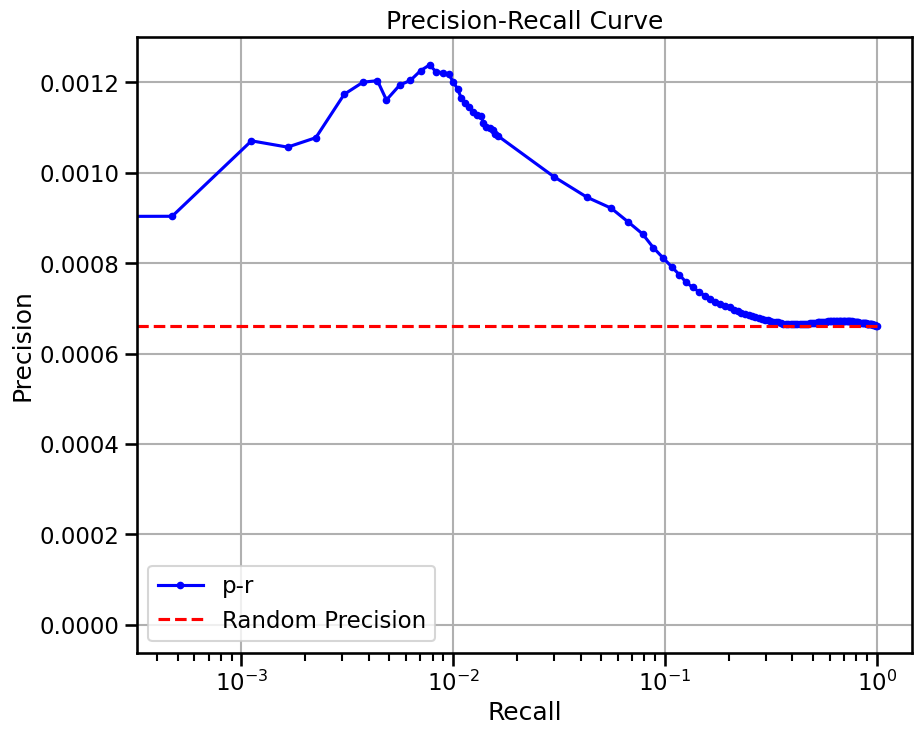

  0%|          | 0/24 [00:00<?, ?it/s]

  4%|▍         | 1/24 [00:02<01:06,  2.87s/it]

  8%|▊         | 2/24 [00:04<00:46,  2.10s/it]

 12%|█▎        | 3/24 [00:05<00:37,  1.79s/it]

 17%|█▋        | 4/24 [00:07<00:32,  1.64s/it]

 21%|██        | 5/24 [00:08<00:29,  1.56s/it]

 25%|██▌       | 6/24 [00:10<00:27,  1.51s/it]

 29%|██▉       | 7/24 [00:11<00:25,  1.47s/it]

 33%|███▎      | 8/24 [00:12<00:23,  1.45s/it]

 38%|███▊      | 9/24 [00:14<00:21,  1.42s/it]

 42%|████▏     | 10/24 [00:15<00:19,  1.40s/it]

 46%|████▌     | 11/24 [00:16<00:18,  1.39s/it]

 50%|█████     | 12/24 [00:18<00:16,  1.38s/it]

 54%|█████▍    | 13/24 [00:19<00:15,  1.38s/it]

 58%|█████▊    | 14/24 [00:21<00:13,  1.37s/it]

 62%|██████▎   | 15/24 [00:22<00:12,  1.37s/it]

 67%|██████▋   | 16/24 [00:23<00:10,  1.37s/it]

 71%|███████   | 17/24 [00:25<00:09,  1.38s/it]

 75%|███████▌  | 18/24 [00:26<00:08,  1.37s/it]

 79%|███████▉  | 19/24 [00:27<00:06,  1.37s/it]

 83%|████████▎ | 20/24 [00:29<00:05,  1.36s/it]

 88%|████████▊ | 21/24 [00:30<00:04,  1.36s/it]

 92%|█████████▏| 22/24 [00:31<00:02,  1.36s/it]

 96%|█████████▌| 23/24 [00:33<00:01,  1.35s/it]

100%|██████████| 24/24 [00:34<00:00,  1.22s/it]

100%|██████████| 24/24 [00:34<00:00,  1.44s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


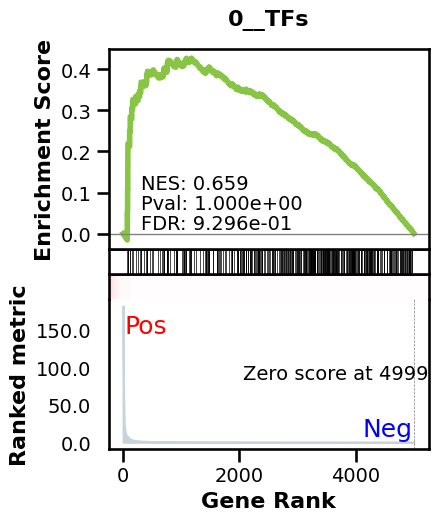

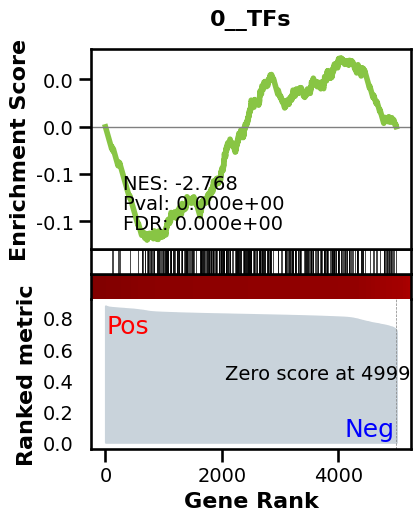

_________________________________________
TF specific enrichment


found some significant results for  22.22222222222222 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2738 genes
intersection pct: 0.5476
precision:  0.0005733902527305975 
recall:  1.0 
random precision: 0.0005735728610913398


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 73.51it/s]

 12%|█▎        | 16/128 [00:00<00:01, 73.83it/s]

 19%|█▉        | 24/128 [00:00<00:01, 73.91it/s]

 25%|██▌       | 32/128 [00:00<00:01, 73.91it/s]

 31%|███▏      | 40/128 [00:00<00:01, 73.93it/s]

 38%|███▊      | 48/128 [00:00<00:01, 73.92it/s]

 44%|████▍     | 56/128 [00:00<00:00, 73.91it/s]

 50%|█████     | 64/128 [00:00<00:00, 73.90it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 73.89it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 73.87it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 72.94it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 72.50it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 72.21it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 71.90it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 71.74it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 71.50it/s]

100%|██████████| 128/128 [00:01<00:00, 72.84it/s]

Average Precision (AP):  0.0006010604205385102
Area Under Precision-Recall Curve (AUPRC):  0.0005973006976712021
EPR: 4.64221078403592


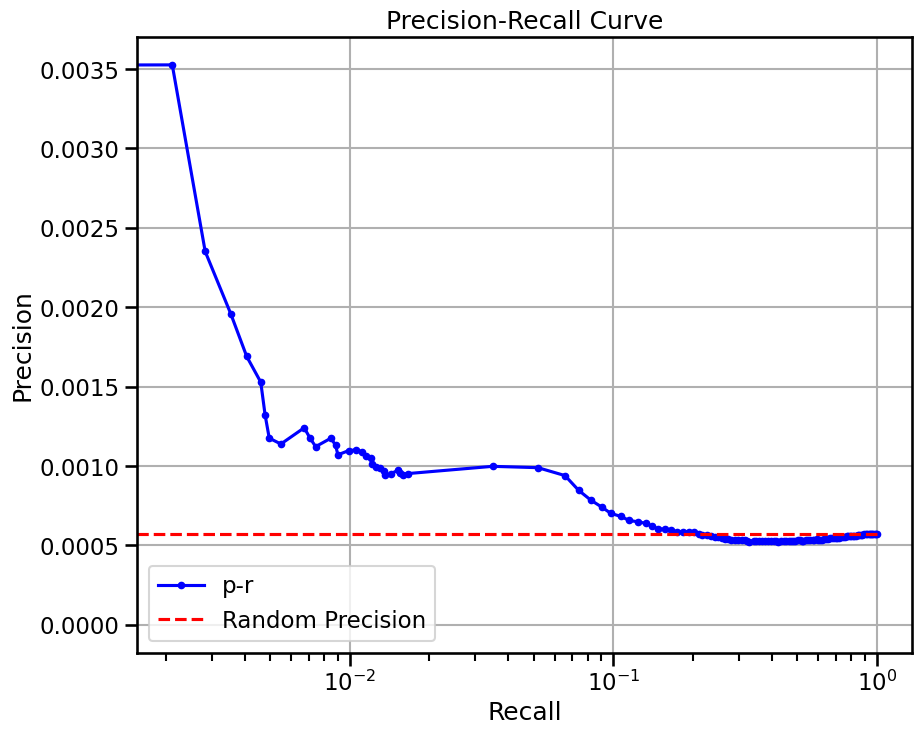

base enrichment


Top central genes: []


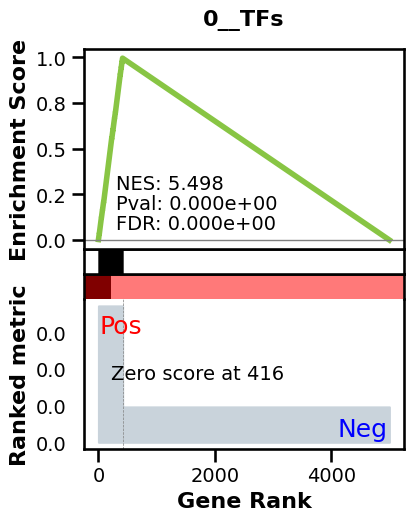

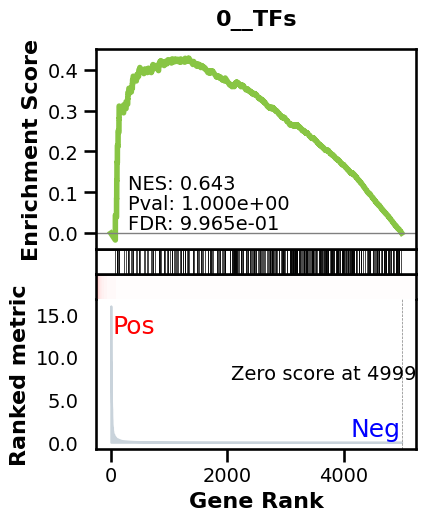

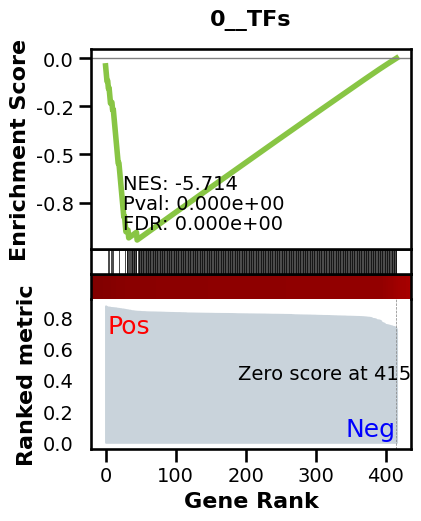

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2738 genes
intersection pct: 0.5476
precision:  0.002626778812706861 
recall:  0.5119321194979671 
random precision: 0.0005735728610913398


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 67.77it/s]

 11%|█         | 14/128 [00:00<00:01, 67.95it/s]

 16%|█▋        | 21/128 [00:00<00:01, 68.05it/s]

 22%|██▏       | 28/128 [00:00<00:01, 68.17it/s]

 27%|██▋       | 35/128 [00:00<00:01, 68.22it/s]

 33%|███▎      | 42/128 [00:00<00:01, 68.25it/s]

 38%|███▊      | 49/128 [00:00<00:01, 68.26it/s]

 44%|████▍     | 56/128 [00:00<00:01, 68.23it/s]

 49%|████▉     | 63/128 [00:00<00:00, 68.19it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 68.19it/s]

 60%|██████    | 77/128 [00:01<00:00, 68.21it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 68.18it/s]

 71%|███████   | 91/128 [00:01<00:00, 67.43it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 67.63it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 67.80it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 67.91it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 68.00it/s]

 98%|█████████▊| 126/128 [00:01<00:00, 68.00it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 67.93it/s]

Average Precision (AP):  0.0018295420291113238
Area Under Precision-Recall Curve (AUPRC):  0.0016452730653699294
EPR: 10.278361071682223


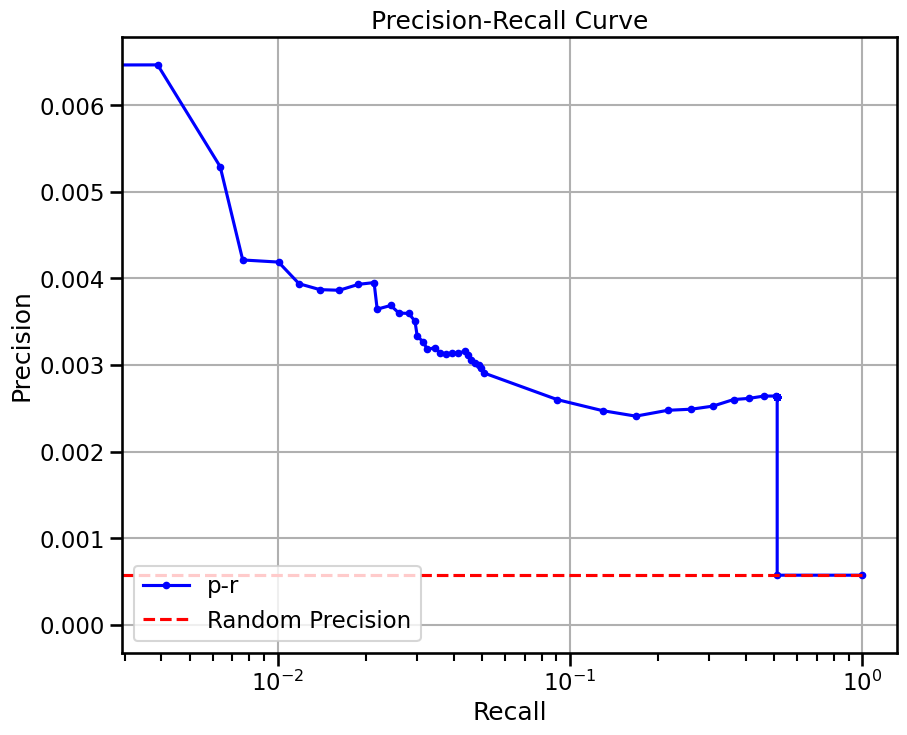

base enrichment


Top central genes: []
The DataFrame contains only the same values.


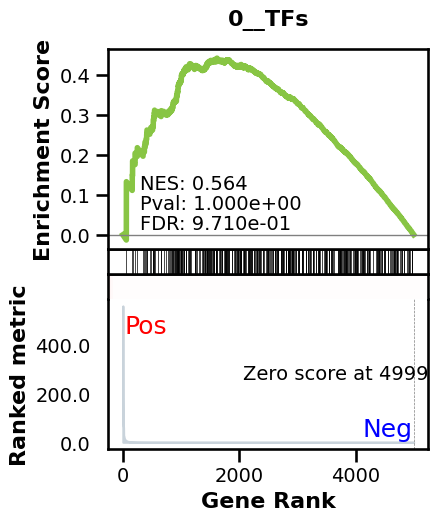

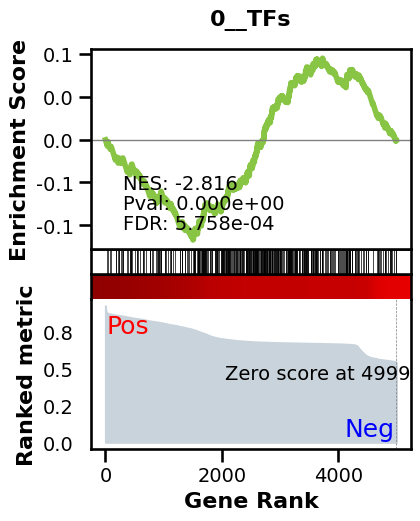

_________________________________________
TF specific enrichment


found some significant results for  27.77777777777778 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2738 genes
intersection pct: 0.5476
precision:  0.0005733902527305975 
recall:  1.0 
random precision: 0.0005735728610913398


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 75.58it/s]

 12%|█▎        | 16/128 [00:00<00:01, 75.65it/s]

 19%|█▉        | 24/128 [00:00<00:01, 75.70it/s]

 25%|██▌       | 32/128 [00:00<00:01, 75.70it/s]

 31%|███▏      | 40/128 [00:00<00:01, 75.24it/s]

 38%|███▊      | 48/128 [00:00<00:01, 75.35it/s]

 44%|████▍     | 56/128 [00:00<00:00, 75.45it/s]

 50%|█████     | 64/128 [00:00<00:00, 75.47it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 75.49it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 75.51it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 75.57it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 75.63it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 75.64it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 75.64it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 75.65it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 75.57it/s]

100%|██████████| 128/128 [00:01<00:00, 75.52it/s]

Average Precision (AP):  0.000573757074393439
Area Under Precision-Recall Curve (AUPRC):  0.0005722763440365235
EPR: 4.020397689059486


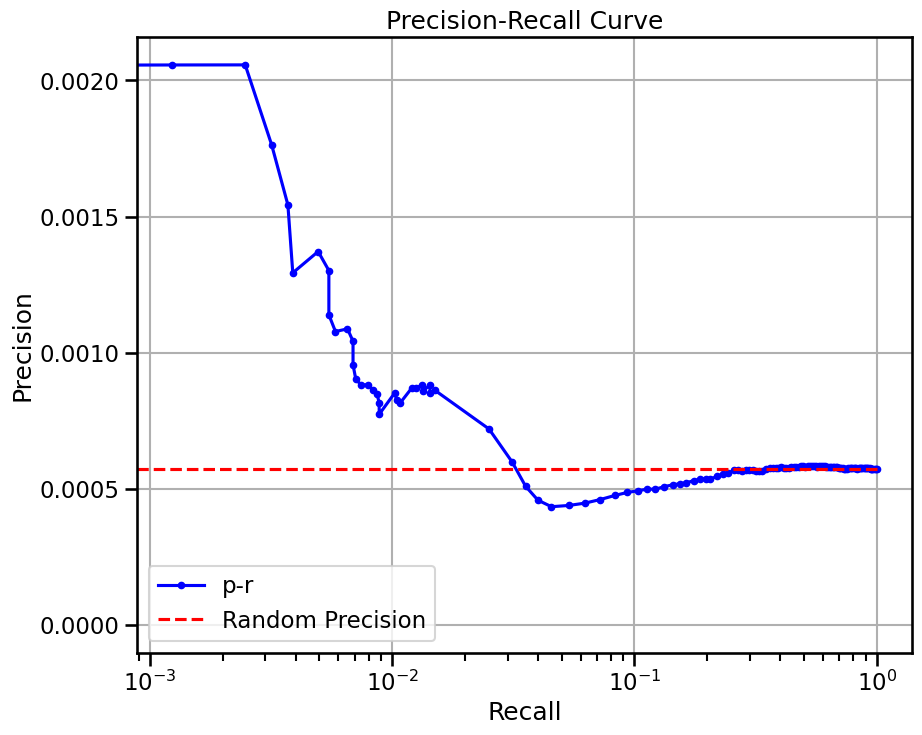

base enrichment


Top central genes: []


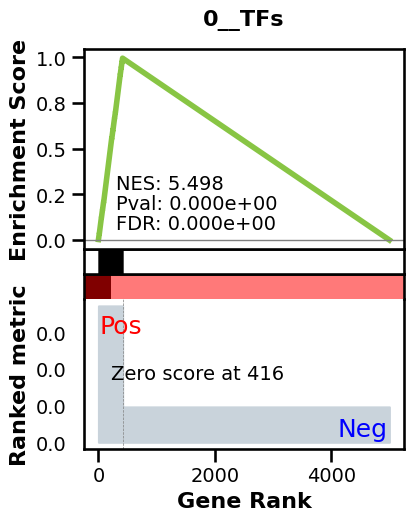

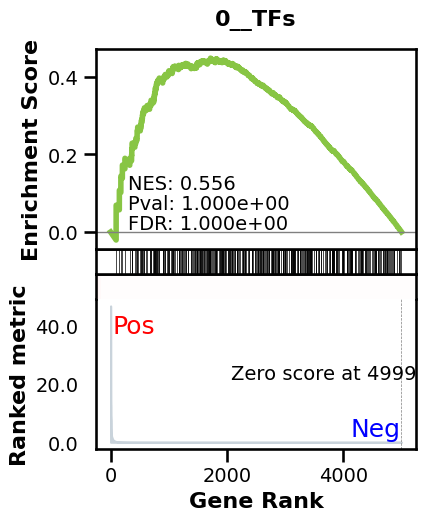

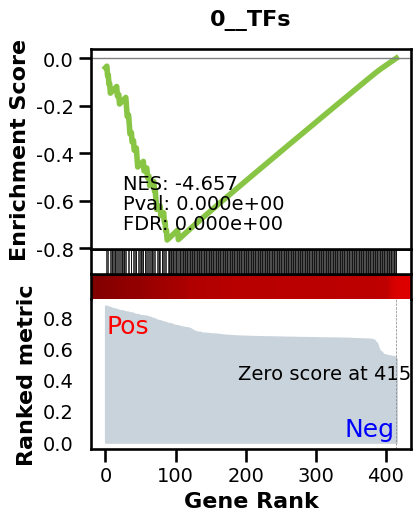

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2738 genes
intersection pct: 0.5476
precision:  0.002626778812706861 
recall:  0.5119321194979671 
random precision: 0.0005735728610913398


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 73.52it/s]

 12%|█▎        | 16/128 [00:00<00:01, 74.52it/s]

 19%|█▉        | 24/128 [00:00<00:01, 74.28it/s]

 25%|██▌       | 32/128 [00:00<00:01, 74.16it/s]

 31%|███▏      | 40/128 [00:00<00:01, 74.10it/s]

 38%|███▊      | 48/128 [00:00<00:01, 74.13it/s]

 44%|████▍     | 56/128 [00:00<00:00, 74.11it/s]

 50%|█████     | 64/128 [00:00<00:00, 74.08it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 74.07it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 74.07it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 74.00it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 74.03it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 74.04it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 73.75it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 73.83it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 73.79it/s]

100%|██████████| 128/128 [00:01<00:00, 73.96it/s]

Average Precision (AP):  0.001874019688666324
Area Under Precision-Recall Curve (AUPRC):  0.0016825332047580401
EPR: 8.391648110698522


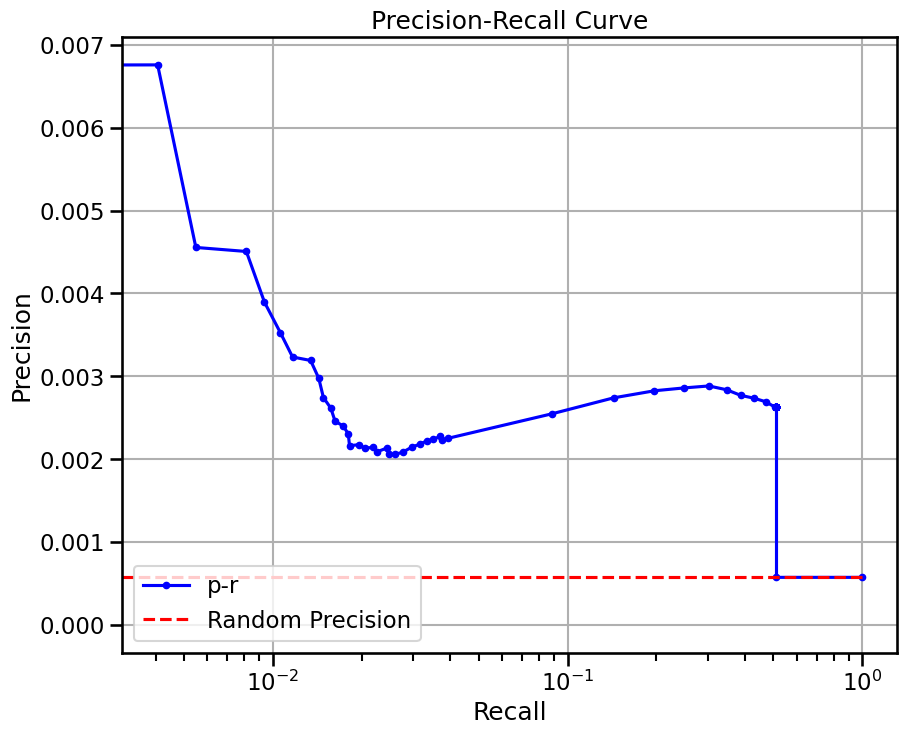

  0%|          | 0/8 [00:00<?, ?it/s]

 12%|█▎        | 1/8 [00:02<00:14,  2.04s/it]

 25%|██▌       | 2/8 [00:02<00:07,  1.33s/it]

 38%|███▊      | 3/8 [00:03<00:05,  1.10s/it]

 50%|█████     | 4/8 [00:04<00:03,  1.00it/s]

 62%|██████▎   | 5/8 [00:05<00:02,  1.07it/s]

 75%|███████▌  | 6/8 [00:06<00:01,  1.11it/s]

 88%|████████▊ | 7/8 [00:07<00:00,  1.13it/s]

100%|██████████| 8/8 [00:07<00:00,  1.22it/s]

100%|██████████| 8/8 [00:07<00:00,  1.00it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


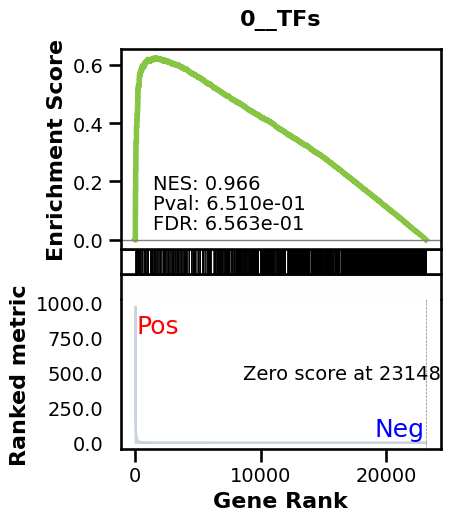

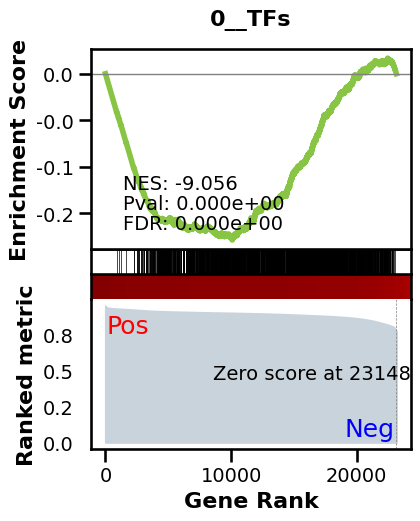

_________________________________________
TF specific enrichment


found some significant results for  54.464285714285715 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5383817875502181


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:39,  3.24it/s]

  2%|▏         | 2/128 [00:00<00:38,  3.23it/s]

  2%|▏         | 3/128 [00:00<00:38,  3.23it/s]

  3%|▎         | 4/128 [00:01<00:38,  3.23it/s]

  4%|▍         | 5/128 [00:01<00:38,  3.23it/s]

  5%|▍         | 6/128 [00:01<00:37,  3.23it/s]

  5%|▌         | 7/128 [00:02<00:37,  3.23it/s]

  6%|▋         | 8/128 [00:02<00:37,  3.23it/s]

  7%|▋         | 9/128 [00:02<00:36,  3.23it/s]

  8%|▊         | 10/128 [00:03<00:36,  3.23it/s]

  9%|▊         | 11/128 [00:03<00:36,  3.22it/s]

  9%|▉         | 12/128 [00:03<00:35,  3.24it/s]

 10%|█         | 13/128 [00:04<00:35,  3.26it/s]

 11%|█         | 14/128 [00:04<00:34,  3.28it/s]

 12%|█▏        | 15/128 [00:04<00:34,  3.29it/s]

 12%|█▎        | 16/128 [00:04<00:33,  3.31it/s]

 13%|█▎        | 17/128 [00:05<00:33,  3.31it/s]

 14%|█▍        | 18/128 [00:05<00:33,  3.32it/s]

 15%|█▍        | 19/128 [00:05<00:33,  3.27it/s]

 16%|█▌        | 20/128 [00:06<00:33,  3.22it/s]

 16%|█▋        | 21/128 [00:06<00:33,  3.18it/s]

 17%|█▋        | 22/128 [00:06<00:33,  3.15it/s]

 18%|█▊        | 23/128 [00:07<00:32,  3.18it/s]

 19%|█▉        | 24/128 [00:07<00:32,  3.17it/s]

 20%|█▉        | 25/128 [00:07<00:32,  3.18it/s]

 20%|██        | 26/128 [00:08<00:31,  3.22it/s]

 21%|██        | 27/128 [00:08<00:31,  3.24it/s]

 22%|██▏       | 28/128 [00:08<00:30,  3.25it/s]

 23%|██▎       | 29/128 [00:08<00:30,  3.25it/s]

 23%|██▎       | 30/128 [00:09<00:30,  3.24it/s]

 24%|██▍       | 31/128 [00:09<00:29,  3.24it/s]

 25%|██▌       | 32/128 [00:09<00:29,  3.22it/s]

 26%|██▌       | 33/128 [00:10<00:29,  3.22it/s]

 27%|██▋       | 34/128 [00:10<00:29,  3.22it/s]

 27%|██▋       | 35/128 [00:10<00:28,  3.22it/s]

 28%|██▊       | 36/128 [00:11<00:28,  3.22it/s]

 29%|██▉       | 37/128 [00:11<00:28,  3.22it/s]

 30%|██▉       | 38/128 [00:11<00:27,  3.22it/s]

 30%|███       | 39/128 [00:12<00:27,  3.22it/s]

 31%|███▏      | 40/128 [00:12<00:27,  3.22it/s]

 32%|███▏      | 41/128 [00:12<00:27,  3.22it/s]

 33%|███▎      | 42/128 [00:13<00:26,  3.22it/s]

 34%|███▎      | 43/128 [00:13<00:26,  3.22it/s]

 34%|███▍      | 44/128 [00:13<00:26,  3.21it/s]

 35%|███▌      | 45/128 [00:13<00:25,  3.21it/s]

 36%|███▌      | 46/128 [00:14<00:25,  3.21it/s]

 37%|███▋      | 47/128 [00:14<00:25,  3.22it/s]

 38%|███▊      | 48/128 [00:14<00:24,  3.22it/s]

 38%|███▊      | 49/128 [00:15<00:24,  3.22it/s]

 39%|███▉      | 50/128 [00:15<00:24,  3.22it/s]

 40%|███▉      | 51/128 [00:15<00:23,  3.22it/s]

 41%|████      | 52/128 [00:16<00:23,  3.21it/s]

 41%|████▏     | 53/128 [00:16<00:23,  3.21it/s]

 42%|████▏     | 54/128 [00:16<00:23,  3.22it/s]

 43%|████▎     | 55/128 [00:17<00:22,  3.22it/s]

 44%|████▍     | 56/128 [00:17<00:22,  3.22it/s]

 45%|████▍     | 57/128 [00:17<00:22,  3.21it/s]

 45%|████▌     | 58/128 [00:17<00:21,  3.22it/s]

 46%|████▌     | 59/128 [00:18<00:21,  3.22it/s]

 47%|████▋     | 60/128 [00:18<00:21,  3.22it/s]

 48%|████▊     | 61/128 [00:18<00:20,  3.22it/s]

 48%|████▊     | 62/128 [00:19<00:20,  3.22it/s]

 49%|████▉     | 63/128 [00:19<00:20,  3.22it/s]

 50%|█████     | 64/128 [00:19<00:19,  3.21it/s]

 51%|█████     | 65/128 [00:20<00:19,  3.22it/s]

 52%|█████▏    | 66/128 [00:20<00:19,  3.22it/s]

 52%|█████▏    | 67/128 [00:20<00:18,  3.22it/s]

 53%|█████▎    | 68/128 [00:21<00:18,  3.22it/s]

 54%|█████▍    | 69/128 [00:21<00:18,  3.22it/s]

 55%|█████▍    | 70/128 [00:21<00:17,  3.22it/s]

 55%|█████▌    | 71/128 [00:22<00:17,  3.22it/s]

 56%|█████▋    | 72/128 [00:22<00:17,  3.22it/s]

 57%|█████▋    | 73/128 [00:22<00:17,  3.22it/s]

 58%|█████▊    | 74/128 [00:22<00:16,  3.22it/s]

 59%|█████▊    | 75/128 [00:23<00:16,  3.22it/s]

 59%|█████▉    | 76/128 [00:23<00:16,  3.22it/s]

 60%|██████    | 77/128 [00:23<00:15,  3.22it/s]

 61%|██████    | 78/128 [00:24<00:15,  3.22it/s]

 62%|██████▏   | 79/128 [00:24<00:15,  3.22it/s]

 62%|██████▎   | 80/128 [00:24<00:14,  3.22it/s]

 63%|██████▎   | 81/128 [00:25<00:14,  3.22it/s]

 64%|██████▍   | 82/128 [00:25<00:14,  3.22it/s]

 65%|██████▍   | 83/128 [00:25<00:13,  3.22it/s]

 66%|██████▌   | 84/128 [00:26<00:13,  3.22it/s]

 66%|██████▋   | 85/128 [00:26<00:13,  3.22it/s]

 67%|██████▋   | 86/128 [00:26<00:13,  3.22it/s]

 68%|██████▊   | 87/128 [00:26<00:12,  3.22it/s]

 69%|██████▉   | 88/128 [00:27<00:12,  3.22it/s]

 70%|██████▉   | 89/128 [00:27<00:12,  3.22it/s]

 70%|███████   | 90/128 [00:27<00:11,  3.22it/s]

 71%|███████   | 91/128 [00:28<00:11,  3.22it/s]

 72%|███████▏  | 92/128 [00:28<00:11,  3.22it/s]

 73%|███████▎  | 93/128 [00:28<00:10,  3.22it/s]

 73%|███████▎  | 94/128 [00:29<00:10,  3.22it/s]

 74%|███████▍  | 95/128 [00:29<00:10,  3.22it/s]

 75%|███████▌  | 96/128 [00:29<00:09,  3.22it/s]

 76%|███████▌  | 97/128 [00:30<00:09,  3.22it/s]

 77%|███████▋  | 98/128 [00:30<00:09,  3.21it/s]

 77%|███████▋  | 99/128 [00:30<00:09,  3.22it/s]

 78%|███████▊  | 100/128 [00:31<00:08,  3.22it/s]

 79%|███████▉  | 101/128 [00:31<00:08,  3.22it/s]

 80%|███████▉  | 102/128 [00:31<00:08,  3.22it/s]

 80%|████████  | 103/128 [00:31<00:07,  3.21it/s]

 81%|████████▏ | 104/128 [00:32<00:07,  3.22it/s]

 82%|████████▏ | 105/128 [00:32<00:07,  3.22it/s]

 83%|████████▎ | 106/128 [00:32<00:06,  3.22it/s]

 84%|████████▎ | 107/128 [00:33<00:06,  3.22it/s]

 84%|████████▍ | 108/128 [00:33<00:06,  3.22it/s]

 85%|████████▌ | 109/128 [00:33<00:05,  3.22it/s]

 86%|████████▌ | 110/128 [00:34<00:05,  3.21it/s]

 87%|████████▋ | 111/128 [00:34<00:05,  3.22it/s]

 88%|████████▊ | 112/128 [00:34<00:04,  3.22it/s]

 88%|████████▊ | 113/128 [00:35<00:04,  3.22it/s]

 89%|████████▉ | 114/128 [00:35<00:04,  3.22it/s]

 90%|████████▉ | 115/128 [00:35<00:04,  3.22it/s]

 91%|█████████ | 116/128 [00:35<00:03,  3.22it/s]

 91%|█████████▏| 117/128 [00:36<00:03,  3.22it/s]

 92%|█████████▏| 118/128 [00:36<00:03,  3.22it/s]

 93%|█████████▎| 119/128 [00:36<00:02,  3.22it/s]

 94%|█████████▍| 120/128 [00:37<00:02,  3.21it/s]

 95%|█████████▍| 121/128 [00:37<00:02,  3.21it/s]

 95%|█████████▌| 122/128 [00:37<00:01,  3.22it/s]

 96%|█████████▌| 123/128 [00:38<00:01,  3.22it/s]

 97%|█████████▋| 124/128 [00:38<00:01,  3.22it/s]

 98%|█████████▊| 125/128 [00:38<00:00,  3.22it/s]

 98%|█████████▊| 126/128 [00:39<00:00,  3.23it/s]

 99%|█████████▉| 127/128 [00:39<00:00,  3.22it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:39<00:00,  3.22it/s]

100%|██████████| 128/128 [00:39<00:00,  3.22it/s]

Average Precision (AP):  0.0006860038679341639
Area Under Precision-Recall Curve (AUPRC):  0.0006859469541189165


EPR: 1.6102801347143614


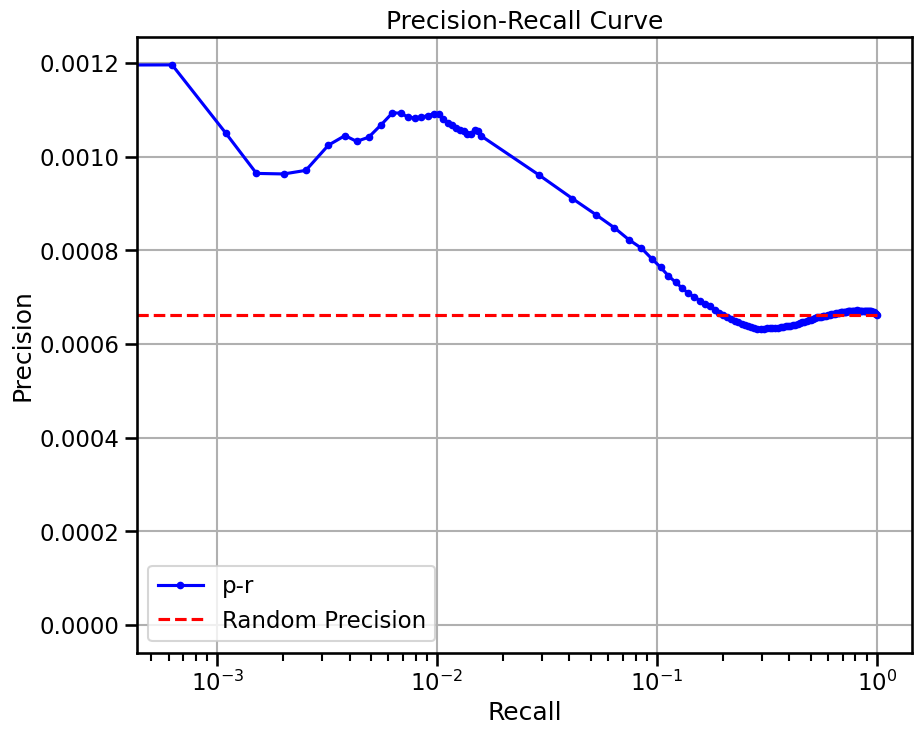

  0%|          | 0/16 [00:00<?, ?it/s]

  6%|▋         | 1/16 [00:02<00:40,  2.68s/it]

 12%|█▎        | 2/16 [00:04<00:26,  1.92s/it]

 19%|█▉        | 3/16 [00:05<00:21,  1.68s/it]

 25%|██▌       | 4/16 [00:06<00:18,  1.56s/it]

 31%|███▏      | 5/16 [00:08<00:16,  1.50s/it]

 38%|███▊      | 6/16 [00:09<00:14,  1.46s/it]

 44%|████▍     | 7/16 [00:10<00:12,  1.43s/it]

 50%|█████     | 8/16 [00:12<00:11,  1.41s/it]

 56%|█████▋    | 9/16 [00:13<00:09,  1.40s/it]

 62%|██████▎   | 10/16 [00:15<00:08,  1.39s/it]

 69%|██████▉   | 11/16 [00:16<00:06,  1.39s/it]

 75%|███████▌  | 12/16 [00:17<00:05,  1.37s/it]

 81%|████████▏ | 13/16 [00:19<00:03,  1.33s/it]

 88%|████████▊ | 14/16 [00:20<00:02,  1.30s/it]

 94%|█████████▍| 15/16 [00:21<00:01,  1.29s/it]

100%|██████████| 16/16 [00:22<00:00,  1.14s/it]

100%|██████████| 16/16 [00:22<00:00,  1.41s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


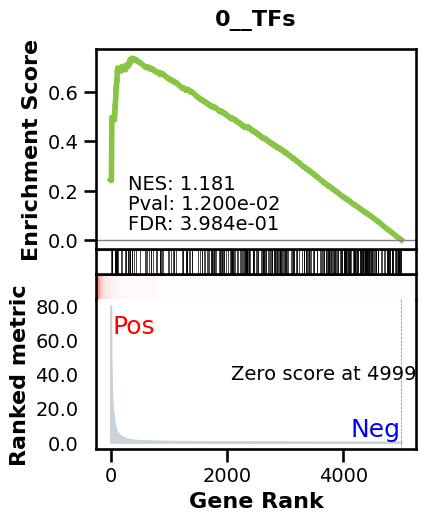

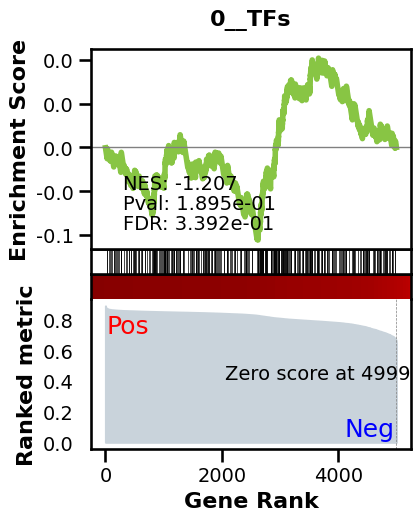

_________________________________________
TF specific enrichment


found some significant results for  30.434782608695652 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2784 genes
intersection pct: 0.5568
precision:  0.000710707345411276 
recall:  1.0 
random precision: 0.0007109307680285068


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 72.66it/s]

 12%|█▎        | 16/128 [00:00<00:01, 72.59it/s]

 19%|█▉        | 24/128 [00:00<00:01, 72.58it/s]

 25%|██▌       | 32/128 [00:00<00:01, 72.61it/s]

 31%|███▏      | 40/128 [00:00<00:01, 72.57it/s]

 38%|███▊      | 48/128 [00:00<00:01, 72.57it/s]

 44%|████▍     | 56/128 [00:00<00:00, 72.59it/s]

 50%|█████     | 64/128 [00:00<00:00, 72.60it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 72.55it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 72.57it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 72.58it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 72.61it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 72.61it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 72.62it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 72.62it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 72.50it/s]

100%|██████████| 128/128 [00:01<00:00, 72.55it/s]

Average Precision (AP):  0.000819202567363202
Area Under Precision-Recall Curve (AUPRC):  0.0008130991831518408
EPR: 2.1537015035092537


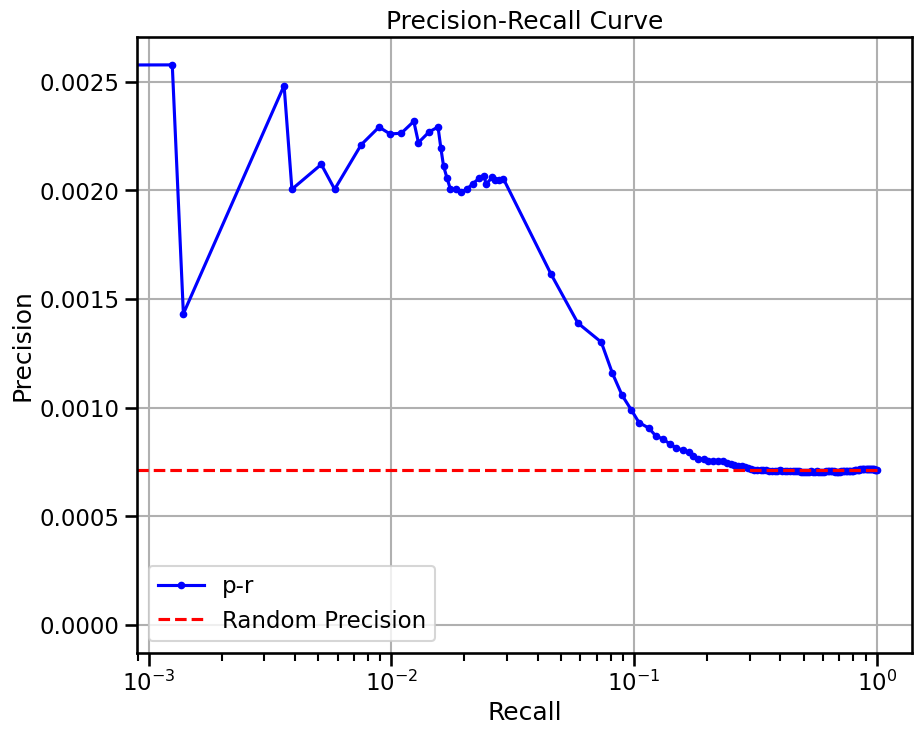

base enrichment


Top central genes: []


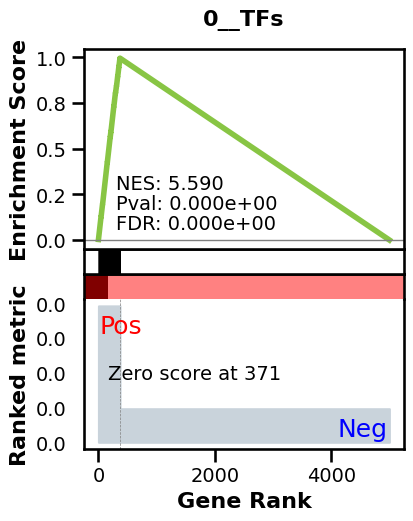

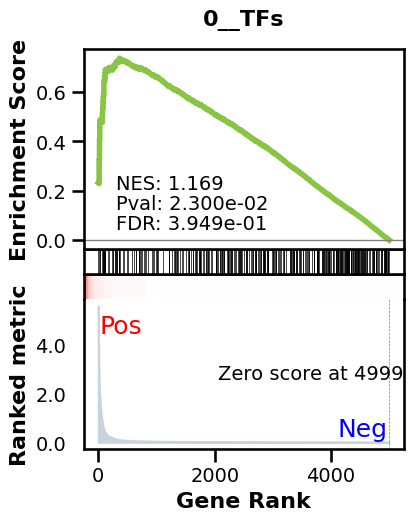

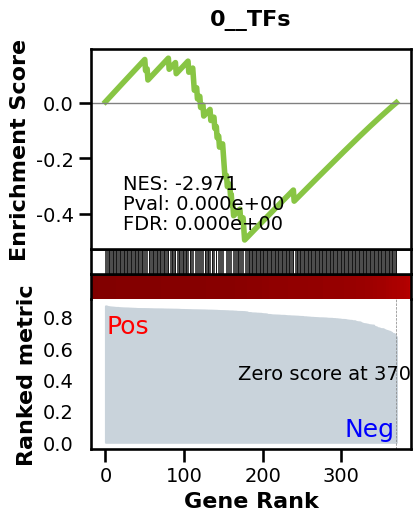

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2784 genes
intersection pct: 0.5568
precision:  0.0038823077261827075 
recall:  0.5390494719288493 
random precision: 0.0007109307680285068


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 72.69it/s]

 12%|█▎        | 16/128 [00:00<00:01, 72.77it/s]

 19%|█▉        | 24/128 [00:00<00:01, 71.30it/s]

 25%|██▌       | 32/128 [00:00<00:01, 71.92it/s]

 31%|███▏      | 40/128 [00:00<00:01, 72.29it/s]

 38%|███▊      | 48/128 [00:00<00:01, 72.51it/s]

 44%|████▍     | 56/128 [00:00<00:00, 72.63it/s]

 50%|█████     | 64/128 [00:00<00:00, 72.71it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 72.79it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 72.82it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 72.84it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 72.63it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 72.68it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 72.74it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 72.74it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 72.66it/s]

100%|██████████| 128/128 [00:01<00:00, 72.55it/s]

Average Precision (AP):  0.0030792070543980074
Area Under Precision-Recall Curve (AUPRC):  0.002811545382727148
EPR: 13.933342413045672


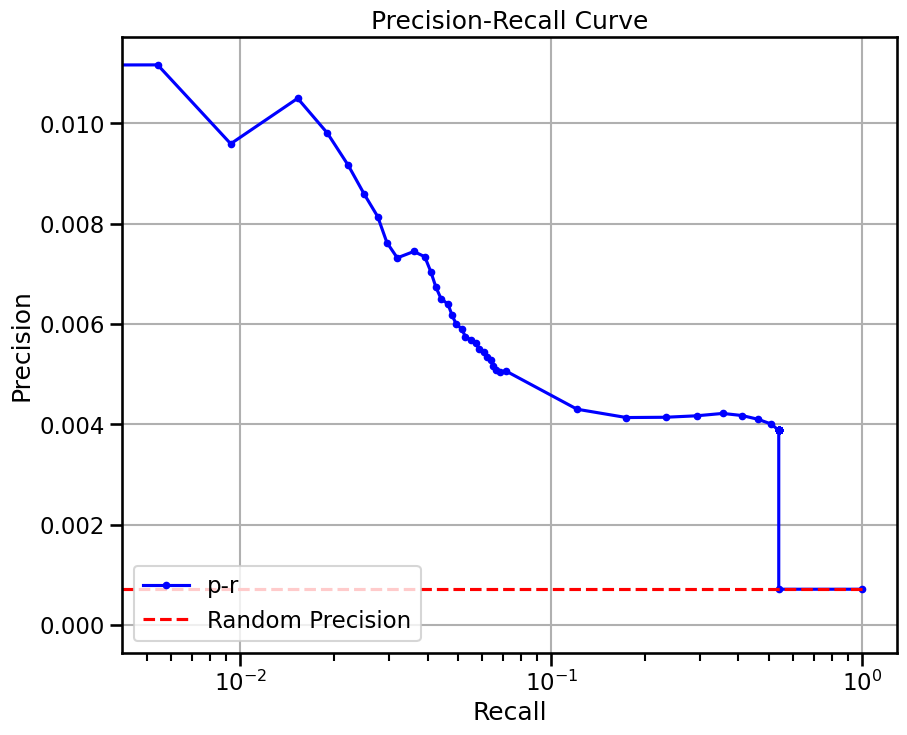

base enrichment


Top central genes: []
The DataFrame contains only the same values.


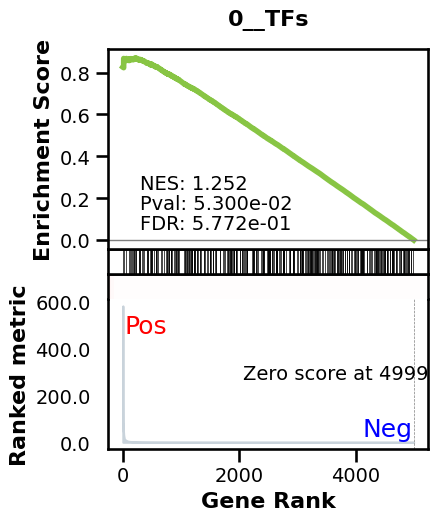

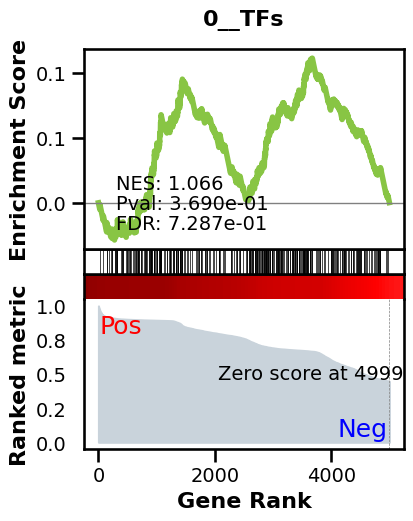

_________________________________________
TF specific enrichment


found some significant results for  30.434782608695652 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2784 genes
intersection pct: 0.5568
precision:  0.000710707345411276 
recall:  1.0 
random precision: 0.0007109307680285068


  0%|          | 0/128 [00:00<?, ?it/s]

  6%|▋         | 8/128 [00:00<00:01, 72.69it/s]

 12%|█▎        | 16/128 [00:00<00:01, 72.80it/s]

 19%|█▉        | 24/128 [00:00<00:01, 72.80it/s]

 25%|██▌       | 32/128 [00:00<00:01, 72.82it/s]

 31%|███▏      | 40/128 [00:00<00:01, 73.23it/s]

 38%|███▊      | 48/128 [00:00<00:01, 73.14it/s]

 44%|████▍     | 56/128 [00:00<00:00, 72.99it/s]

 50%|█████     | 64/128 [00:00<00:00, 72.89it/s]

 56%|█████▋    | 72/128 [00:00<00:00, 72.88it/s]

 62%|██████▎   | 80/128 [00:01<00:00, 72.87it/s]

 69%|██████▉   | 88/128 [00:01<00:00, 72.86it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 72.86it/s]

 81%|████████▏ | 104/128 [00:01<00:00, 72.85it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 72.54it/s]

 94%|█████████▍| 120/128 [00:01<00:00, 71.89it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 71.30it/s]

100%|██████████| 128/128 [00:01<00:00, 72.46it/s]

Average Precision (AP):  0.0007738335240507619
Area Under Precision-Recall Curve (AUPRC):  0.0007665221015396644
EPR: 4.518279168891802


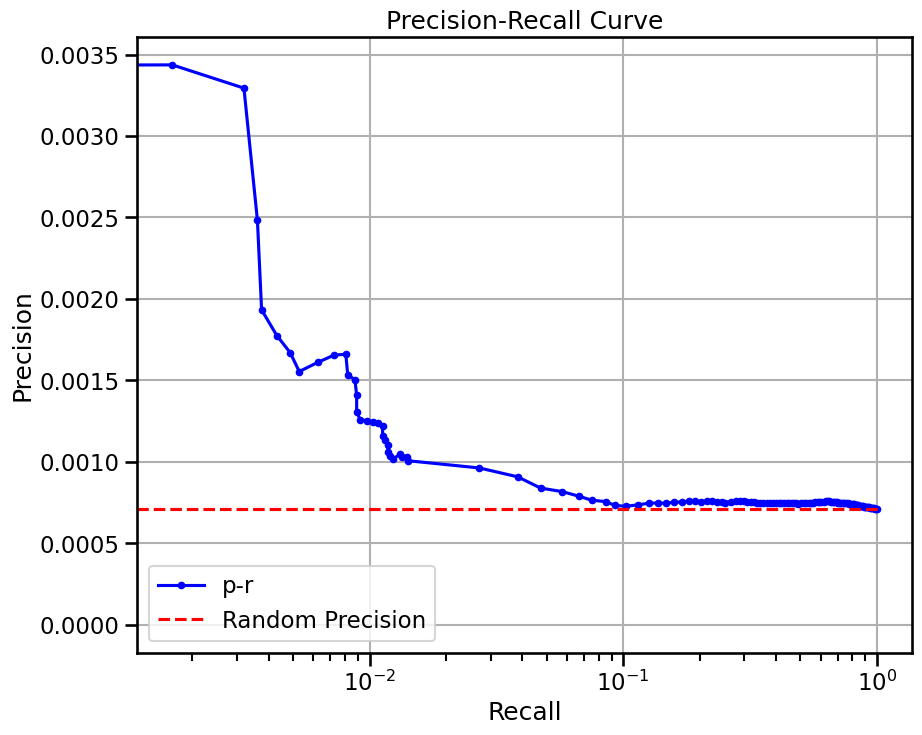

base enrichment


Top central genes: []


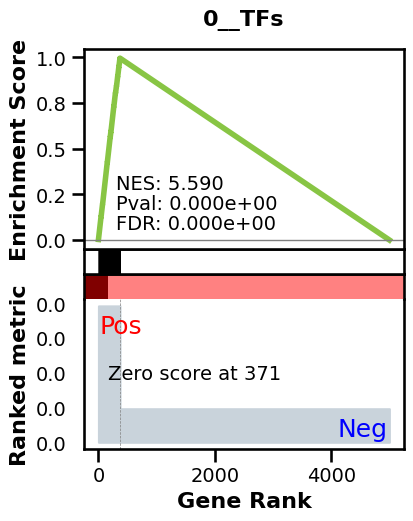

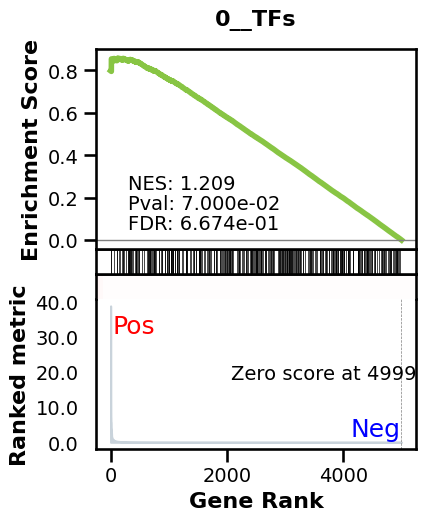

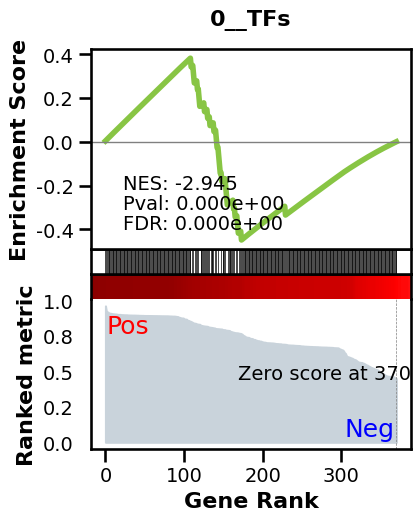

_________________________________________
TF specific enrichment


found some significant results for  13.043478260869565 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2784 genes
intersection pct: 0.5568
precision:  0.0038823077261827075 
recall:  0.5390494719288493 
random precision: 0.0007109307680285068


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 69.09it/s]

 11%|█         | 14/128 [00:00<00:01, 69.20it/s]

 16%|█▋        | 21/128 [00:00<00:01, 68.97it/s]

 22%|██▏       | 28/128 [00:00<00:01, 68.89it/s]

 27%|██▋       | 35/128 [00:00<00:01, 68.97it/s]

 33%|███▎      | 42/128 [00:00<00:01, 69.00it/s]

 38%|███▊      | 49/128 [00:00<00:01, 68.96it/s]

 44%|████▍     | 56/128 [00:00<00:01, 69.03it/s]

 49%|████▉     | 63/128 [00:00<00:00, 69.08it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 69.09it/s]

 60%|██████    | 77/128 [00:01<00:00, 69.10it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 69.01it/s]

 71%|███████   | 91/128 [00:01<00:00, 69.07it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 69.07it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 69.14it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 69.19it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 69.12it/s]

 98%|█████████▊| 126/128 [00:01<00:00, 69.18it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 69.03it/s]

Average Precision (AP):  0.002779460773564875
Area Under Precision-Recall Curve (AUPRC):  0.002463226427890219
EPR: 8.29467017753674


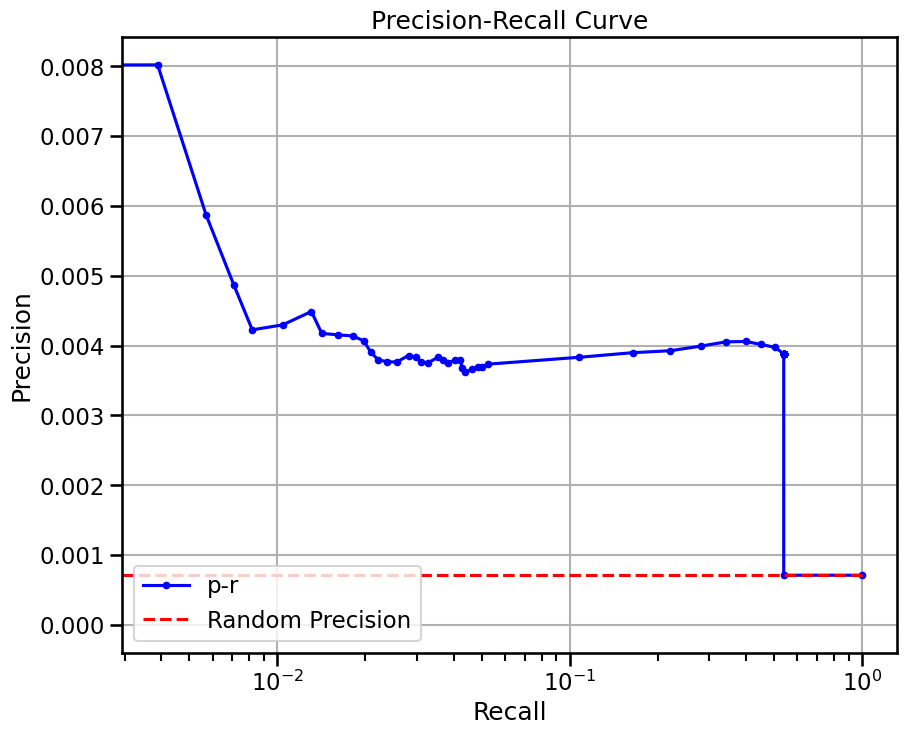

  0%|          | 0/8 [00:00<?, ?it/s]

 12%|█▎        | 1/8 [00:02<00:19,  2.86s/it]

 25%|██▌       | 2/8 [00:03<00:10,  1.77s/it]

 38%|███▊      | 3/8 [00:04<00:07,  1.42s/it]

 50%|█████     | 4/8 [00:05<00:05,  1.25s/it]

 62%|██████▎   | 5/8 [00:06<00:03,  1.16s/it]

 75%|███████▌  | 6/8 [00:07<00:02,  1.10s/it]

 88%|████████▊ | 7/8 [00:09<00:01,  1.21s/it]

100%|██████████| 8/8 [00:09<00:00,  1.16it/s]

100%|██████████| 8/8 [00:09<00:00,  1.20s/it]

avg link count: 536200336, sparsity: 1.0


base enrichment


too many genes for central computation


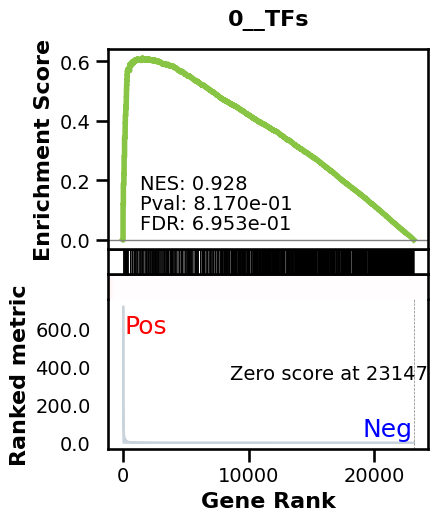

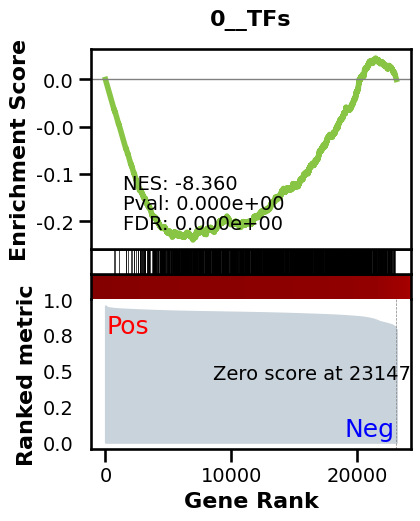

_________________________________________
TF specific enrichment


found some significant results for  56.25 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12463 genes
intersection pct: 0.5384050457922931


precision:  0.0006618214377693767 
recall:  1.0 
random precision: 0.0006618672671051408


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:42,  2.95it/s]

  2%|▏         | 2/128 [00:00<00:42,  2.95it/s]

  2%|▏         | 3/128 [00:01<00:42,  2.96it/s]

  3%|▎         | 4/128 [00:01<00:41,  2.96it/s]

  4%|▍         | 5/128 [00:01<00:41,  2.96it/s]

  5%|▍         | 6/128 [00:02<00:41,  2.95it/s]

  5%|▌         | 7/128 [00:02<00:40,  2.95it/s]

  6%|▋         | 8/128 [00:02<00:40,  2.95it/s]

  7%|▋         | 9/128 [00:03<00:40,  2.96it/s]

  8%|▊         | 10/128 [00:03<00:39,  2.96it/s]

  9%|▊         | 11/128 [00:03<00:39,  2.96it/s]

  9%|▉         | 12/128 [00:04<00:39,  2.96it/s]

 10%|█         | 13/128 [00:04<00:38,  2.96it/s]

 11%|█         | 14/128 [00:04<00:38,  2.95it/s]

 12%|█▏        | 15/128 [00:05<00:38,  2.95it/s]

 12%|█▎        | 16/128 [00:05<00:37,  2.96it/s]

 13%|█▎        | 17/128 [00:05<00:37,  2.93it/s]

 14%|█▍        | 18/128 [00:06<00:43,  2.54it/s]

 15%|█▍        | 19/128 [00:06<00:39,  2.74it/s]

 16%|█▌        | 20/128 [00:06<00:37,  2.90it/s]

 16%|█▋        | 21/128 [00:07<00:35,  3.02it/s]

 17%|█▋        | 22/128 [00:07<00:34,  3.11it/s]

 18%|█▊        | 23/128 [00:07<00:33,  3.18it/s]

 19%|█▉        | 24/128 [00:08<00:32,  3.22it/s]

 20%|█▉        | 25/128 [00:08<00:31,  3.26it/s]

 20%|██        | 26/128 [00:08<00:31,  3.28it/s]

 21%|██        | 27/128 [00:08<00:31,  3.20it/s]

 22%|██▏       | 28/128 [00:09<00:30,  3.25it/s]

 23%|██▎       | 29/128 [00:09<00:30,  3.28it/s]

 23%|██▎       | 30/128 [00:09<00:29,  3.30it/s]

 24%|██▍       | 31/128 [00:10<00:29,  3.29it/s]

 25%|██▌       | 32/128 [00:10<00:36,  2.61it/s]

 26%|██▌       | 33/128 [00:11<00:33,  2.80it/s]

 27%|██▋       | 34/128 [00:11<00:31,  2.95it/s]

 27%|██▋       | 35/128 [00:11<00:30,  3.07it/s]

 28%|██▊       | 36/128 [00:11<00:29,  3.15it/s]

 29%|██▉       | 37/128 [00:12<00:28,  3.21it/s]

 30%|██▉       | 38/128 [00:12<00:27,  3.26it/s]

 30%|███       | 39/128 [00:12<00:27,  3.29it/s]

 31%|███▏      | 40/128 [00:13<00:26,  3.32it/s]

 32%|███▏      | 41/128 [00:13<00:26,  3.33it/s]

 33%|███▎      | 42/128 [00:13<00:25,  3.34it/s]

 34%|███▎      | 43/128 [00:14<00:25,  3.35it/s]

 34%|███▍      | 44/128 [00:14<00:25,  3.36it/s]

 35%|███▌      | 45/128 [00:14<00:24,  3.36it/s]

 36%|███▌      | 46/128 [00:14<00:24,  3.37it/s]

 37%|███▋      | 47/128 [00:15<00:24,  3.37it/s]

 38%|███▊      | 48/128 [00:15<00:23,  3.37it/s]

 38%|███▊      | 49/128 [00:15<00:23,  3.38it/s]

 39%|███▉      | 50/128 [00:16<00:23,  3.37it/s]

 40%|███▉      | 51/128 [00:16<00:22,  3.37it/s]

 41%|████      | 52/128 [00:16<00:22,  3.37it/s]

 41%|████▏     | 53/128 [00:16<00:22,  3.38it/s]

 42%|████▏     | 54/128 [00:17<00:21,  3.38it/s]

 43%|████▎     | 55/128 [00:17<00:21,  3.38it/s]

 44%|████▍     | 56/128 [00:17<00:21,  3.38it/s]

 45%|████▍     | 57/128 [00:18<00:21,  3.37it/s]

 45%|████▌     | 58/128 [00:18<00:20,  3.37it/s]

 46%|████▌     | 59/128 [00:18<00:20,  3.38it/s]

 47%|████▋     | 60/128 [00:19<00:20,  3.38it/s]

 48%|████▊     | 61/128 [00:19<00:19,  3.37it/s]

 48%|████▊     | 62/128 [00:19<00:19,  3.37it/s]

 49%|████▉     | 63/128 [00:19<00:19,  3.37it/s]

 50%|█████     | 64/128 [00:20<00:18,  3.37it/s]

 51%|█████     | 65/128 [00:20<00:18,  3.37it/s]

 52%|█████▏    | 66/128 [00:20<00:18,  3.37it/s]

 52%|█████▏    | 67/128 [00:21<00:18,  3.37it/s]

 53%|█████▎    | 68/128 [00:21<00:17,  3.37it/s]

 54%|█████▍    | 69/128 [00:21<00:17,  3.37it/s]

 55%|█████▍    | 70/128 [00:22<00:17,  3.37it/s]

 55%|█████▌    | 71/128 [00:22<00:16,  3.37it/s]

 56%|█████▋    | 72/128 [00:22<00:16,  3.37it/s]

 57%|█████▋    | 73/128 [00:22<00:16,  3.37it/s]

 58%|█████▊    | 74/128 [00:23<00:16,  3.37it/s]

 59%|█████▊    | 75/128 [00:23<00:15,  3.38it/s]

 59%|█████▉    | 76/128 [00:23<00:15,  3.37it/s]

 60%|██████    | 77/128 [00:24<00:15,  3.37it/s]

 61%|██████    | 78/128 [00:24<00:14,  3.38it/s]

 62%|██████▏   | 79/128 [00:24<00:14,  3.38it/s]

 62%|██████▎   | 80/128 [00:24<00:14,  3.38it/s]

 63%|██████▎   | 81/128 [00:25<00:13,  3.38it/s]

 64%|██████▍   | 82/128 [00:25<00:13,  3.38it/s]

 65%|██████▍   | 83/128 [00:25<00:13,  3.37it/s]

 66%|██████▌   | 84/128 [00:26<00:13,  3.37it/s]

 66%|██████▋   | 85/128 [00:26<00:12,  3.37it/s]

 67%|██████▋   | 86/128 [00:26<00:12,  3.37it/s]

 68%|██████▊   | 87/128 [00:27<00:12,  3.37it/s]

 69%|██████▉   | 88/128 [00:27<00:11,  3.37it/s]

 70%|██████▉   | 89/128 [00:27<00:11,  3.37it/s]

 70%|███████   | 90/128 [00:27<00:11,  3.38it/s]

 71%|███████   | 91/128 [00:28<00:10,  3.37it/s]

 72%|███████▏  | 92/128 [00:28<00:10,  3.37it/s]

 73%|███████▎  | 93/128 [00:28<00:10,  3.37it/s]

 73%|███████▎  | 94/128 [00:29<00:10,  3.38it/s]

 74%|███████▍  | 95/128 [00:29<00:09,  3.37it/s]

 75%|███████▌  | 96/128 [00:29<00:09,  3.37it/s]

 76%|███████▌  | 97/128 [00:30<00:09,  3.38it/s]

 77%|███████▋  | 98/128 [00:30<00:08,  3.37it/s]

 77%|███████▋  | 99/128 [00:30<00:08,  3.38it/s]

 78%|███████▊  | 100/128 [00:30<00:08,  3.38it/s]

 79%|███████▉  | 101/128 [00:31<00:07,  3.38it/s]

 80%|███████▉  | 102/128 [00:31<00:07,  3.37it/s]

 80%|████████  | 103/128 [00:31<00:07,  3.37it/s]

 81%|████████▏ | 104/128 [00:32<00:07,  3.37it/s]

 82%|████████▏ | 105/128 [00:32<00:06,  3.37it/s]

 83%|████████▎ | 106/128 [00:32<00:06,  3.37it/s]

 84%|████████▎ | 107/128 [00:32<00:06,  3.37it/s]

 84%|████████▍ | 108/128 [00:33<00:05,  3.37it/s]

 85%|████████▌ | 109/128 [00:33<00:05,  3.37it/s]

 86%|████████▌ | 110/128 [00:33<00:05,  3.37it/s]

 87%|████████▋ | 111/128 [00:34<00:05,  3.37it/s]

 88%|████████▊ | 112/128 [00:34<00:04,  3.37it/s]

 88%|████████▊ | 113/128 [00:34<00:04,  3.37it/s]

 89%|████████▉ | 114/128 [00:35<00:04,  3.37it/s]

 90%|████████▉ | 115/128 [00:35<00:03,  3.37it/s]

 91%|█████████ | 116/128 [00:35<00:03,  3.37it/s]

 91%|█████████▏| 117/128 [00:35<00:03,  3.37it/s]

 92%|█████████▏| 118/128 [00:36<00:02,  3.37it/s]

 93%|█████████▎| 119/128 [00:36<00:02,  3.37it/s]

 94%|█████████▍| 120/128 [00:36<00:02,  3.37it/s]

 95%|█████████▍| 121/128 [00:37<00:02,  3.37it/s]

 95%|█████████▌| 122/128 [00:37<00:01,  3.37it/s]

 96%|█████████▌| 123/128 [00:37<00:01,  3.37it/s]

 97%|█████████▋| 124/128 [00:38<00:01,  3.37it/s]

 98%|█████████▊| 125/128 [00:38<00:00,  3.37it/s]

 98%|█████████▊| 126/128 [00:38<00:00,  3.37it/s]

 99%|█████████▉| 127/128 [00:38<00:00,  3.37it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:39<00:00,  3.37it/s]

100%|██████████| 128/128 [00:39<00:00,  3.26it/s]

Average Precision (AP):  0.0006718100363467406
Area Under Precision-Recall Curve (AUPRC):  0.0006714812876545424


EPR: 1.4785712507872821


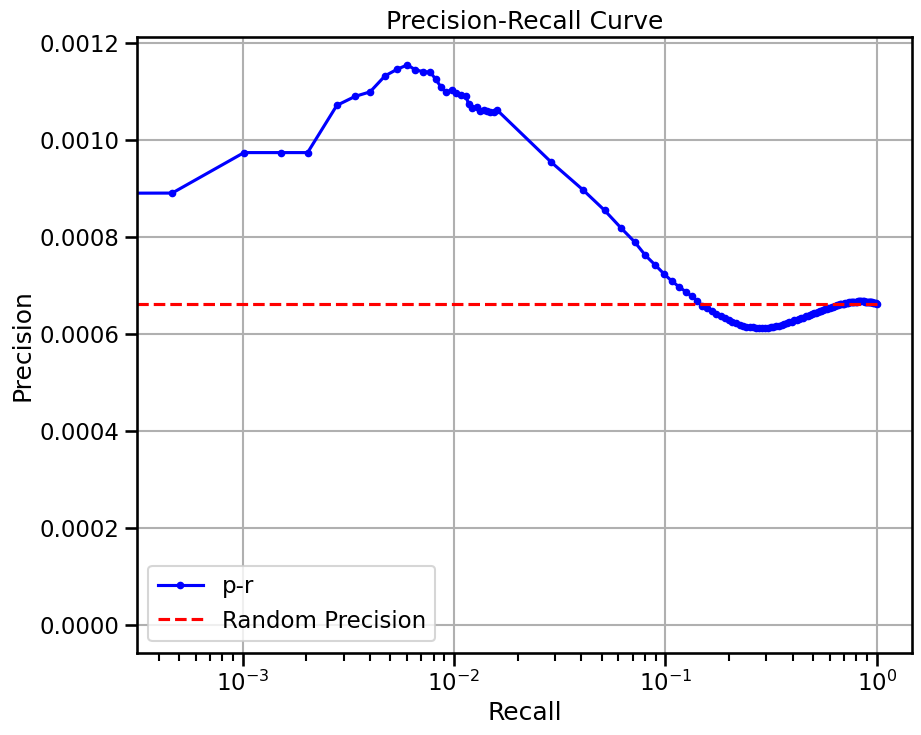

  0%|          | 0/15 [00:00<?, ?it/s]

  7%|▋         | 1/15 [00:04<01:09,  4.97s/it]

 13%|█▎        | 2/15 [00:06<00:37,  2.86s/it]

 20%|██        | 3/15 [00:07<00:26,  2.19s/it]

 27%|██▋       | 4/15 [00:09<00:20,  1.87s/it]

 33%|███▎      | 5/15 [00:10<00:16,  1.70s/it]

 40%|████      | 6/15 [00:11<00:14,  1.58s/it]

 47%|████▋     | 7/15 [00:13<00:12,  1.51s/it]

 53%|█████▎    | 8/15 [00:14<00:10,  1.46s/it]

 60%|██████    | 9/15 [00:15<00:08,  1.41s/it]

 67%|██████▋   | 10/15 [00:17<00:06,  1.38s/it]

 73%|███████▎  | 11/15 [00:18<00:05,  1.33s/it]

 80%|████████  | 12/15 [00:19<00:03,  1.31s/it]

 87%|████████▋ | 13/15 [00:20<00:02,  1.28s/it]

 93%|█████████▎| 14/15 [00:22<00:01,  1.27s/it]

100%|██████████| 15/15 [00:22<00:00,  1.02it/s]

100%|██████████| 15/15 [00:22<00:00,  1.51s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


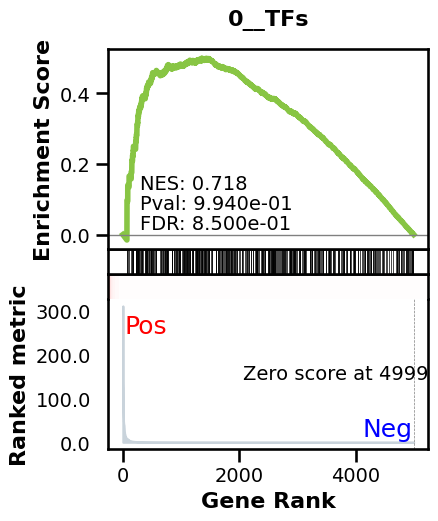

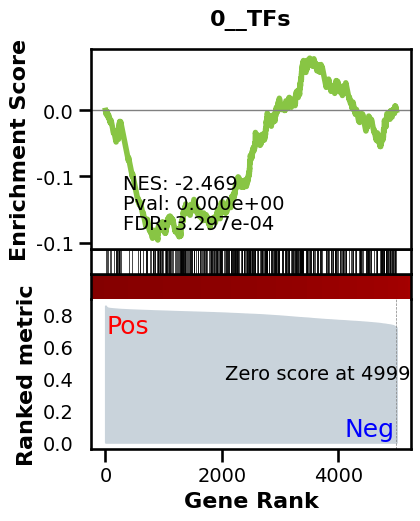

_________________________________________
TF specific enrichment


found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.001192520141082607 
recall:  1.0 
random precision: 0.0011928575831146055


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.40it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.34it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.36it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.33it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.30it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.30it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.30it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.32it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.29it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.27it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.32it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.27it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.31it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.30it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.35it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.37it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.36it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.38it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.39it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.38it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.36it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.30it/s]

Average Precision (AP):  0.0013094038138155046
Area Under Precision-Recall Curve (AUPRC):  0.0013076222767196615


EPR: 1.351268309941605


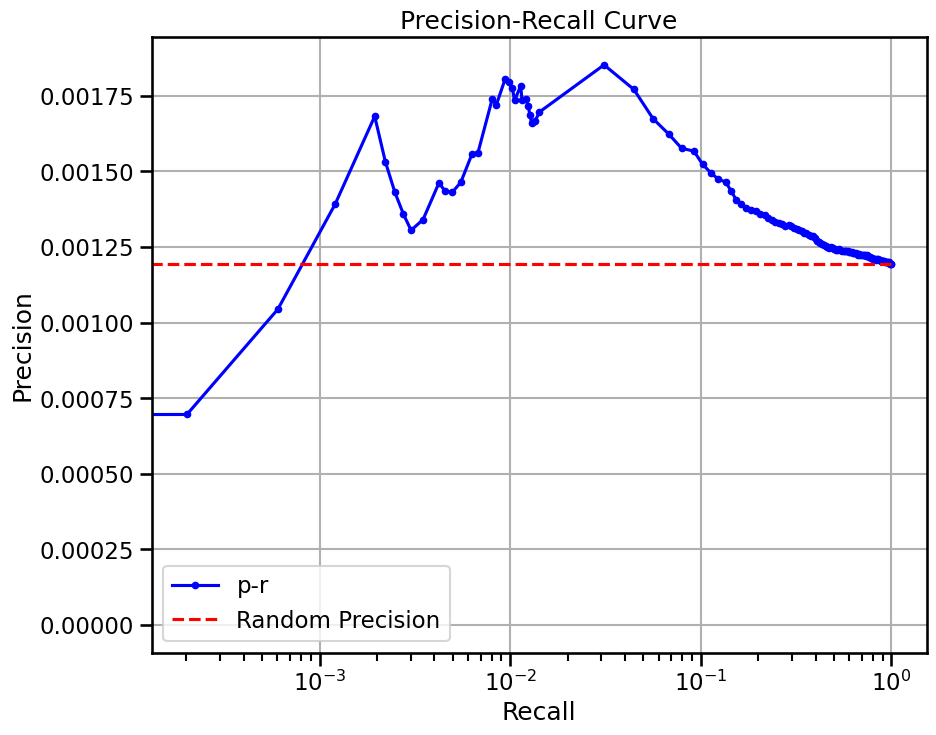

base enrichment


Top central genes: []


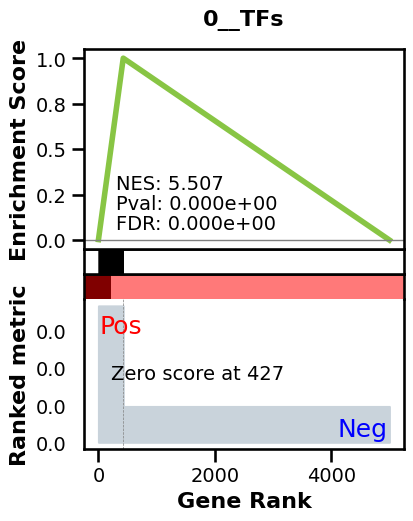

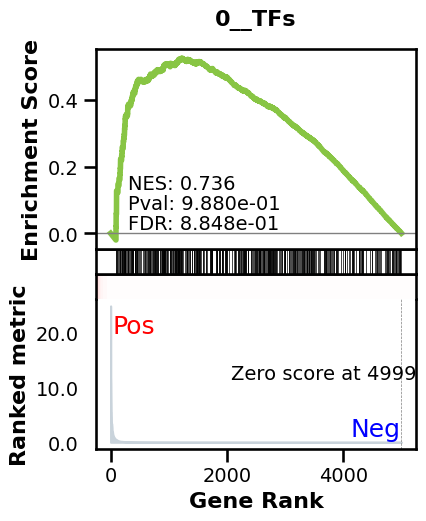

_________________________________________
TF specific enrichment


found some significant results for  17.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.0052568900331060745 
recall:  0.4576566903771306 
random precision: 0.0011928575831146055


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.02it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.03it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.02it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.04it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.05it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.05it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.04it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.06it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.04it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.05it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.05it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.05it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.04it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.05it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.05it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.04it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.06it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.04it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.04it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.04it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.05it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.71it/s]

Average Precision (AP):  0.00383226940589671
Area Under Precision-Recall Curve (AUPRC):  0.0034681754824299935
EPR: 7.94857043346332


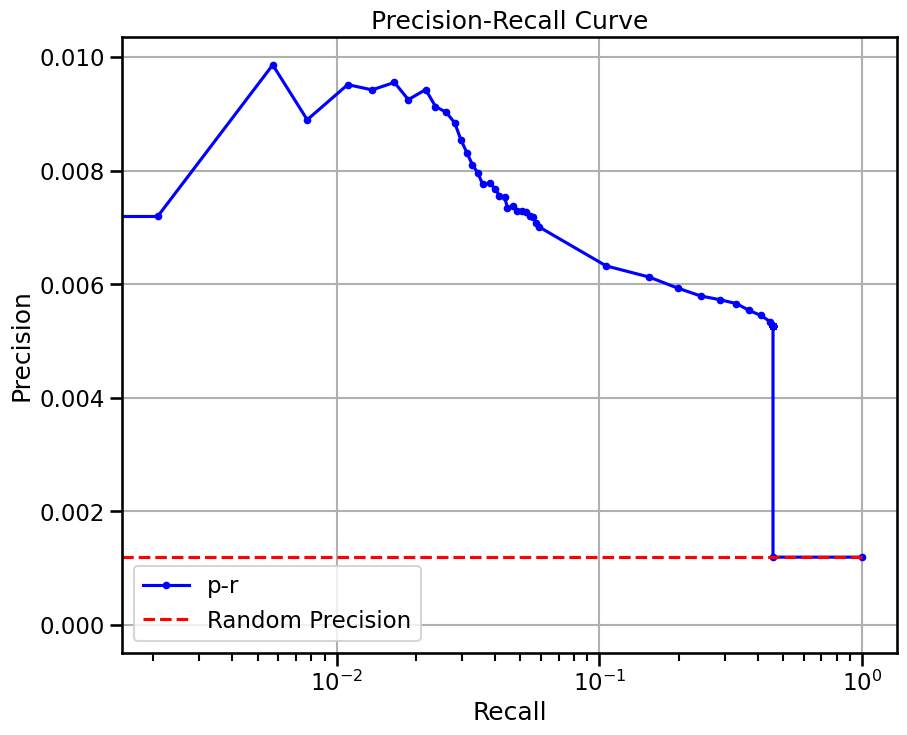

base enrichment


Top central genes: []
The DataFrame contains only the same values.


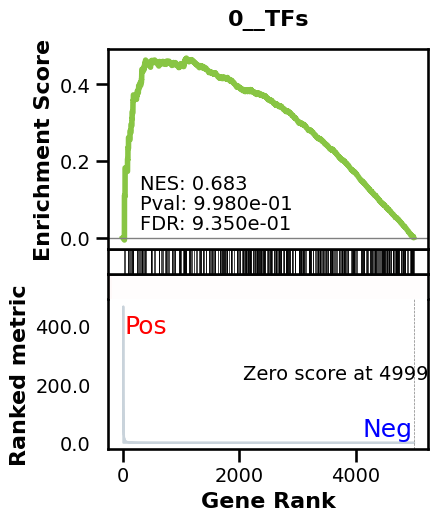

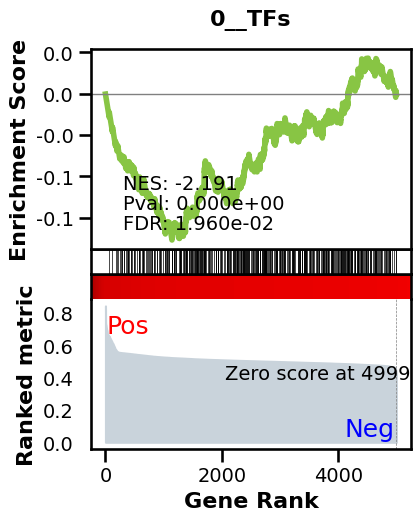

_________________________________________
TF specific enrichment


found some significant results for  30.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.001192520141082607 
recall:  1.0 
random precision: 0.0011928575831146055


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 54.96it/s]

  9%|▉         | 12/128 [00:00<00:02, 54.96it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.00it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.01it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.04it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.03it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.02it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.01it/s]

 42%|████▏     | 54/128 [00:00<00:01, 54.98it/s]

 47%|████▋     | 60/128 [00:01<00:01, 54.93it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 54.97it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 54.97it/s]

 61%|██████    | 78/128 [00:01<00:00, 54.99it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 54.98it/s]

 70%|███████   | 90/128 [00:01<00:00, 54.93it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 54.96it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 54.97it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 54.98it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.00it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.03it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.02it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 54.96it/s]

Average Precision (AP):  0.0014880787706073686
Area Under Precision-Recall Curve (AUPRC):  0.001486668981611983


EPR: 2.030178016669077


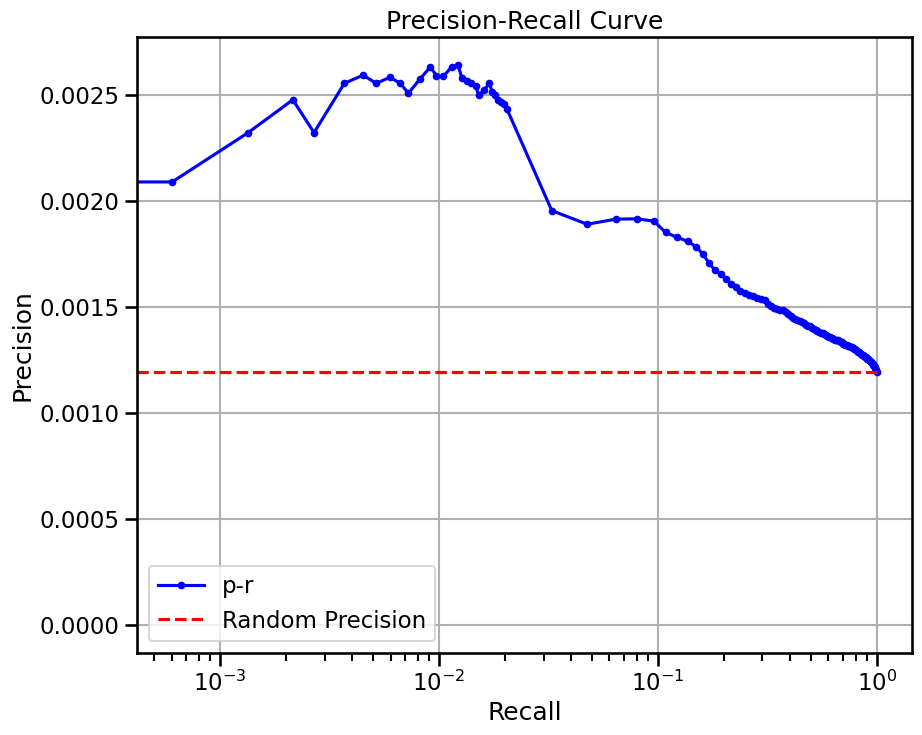

base enrichment


Top central genes: []


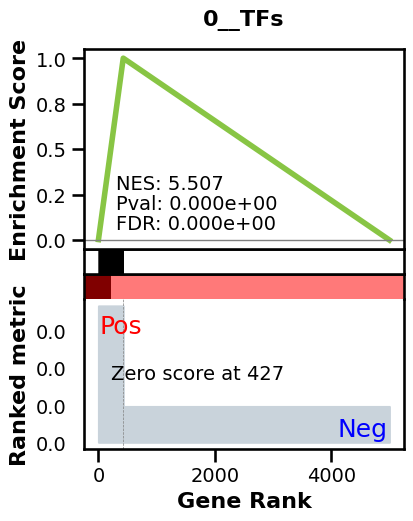

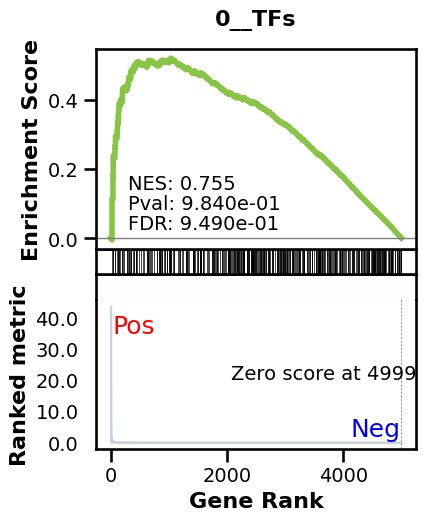

_________________________________________
TF specific enrichment


found some significant results for  7.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3535 genes
intersection pct: 0.707
precision:  0.0052568900331060745 
recall:  0.4576566903771306 
random precision: 0.0011928575831146055


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.31it/s]

  9%|▉         | 12/128 [00:00<00:02, 55.11it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.11it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.11it/s]

 23%|██▎       | 30/128 [00:00<00:01, 55.08it/s]

 28%|██▊       | 36/128 [00:00<00:01, 55.06it/s]

 33%|███▎      | 42/128 [00:00<00:01, 55.06it/s]

 38%|███▊      | 48/128 [00:00<00:01, 55.04it/s]

 42%|████▏     | 54/128 [00:00<00:01, 55.05it/s]

 47%|████▋     | 60/128 [00:01<00:01, 55.06it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 55.06it/s]

 56%|█████▋    | 72/128 [00:01<00:01, 55.06it/s]

 61%|██████    | 78/128 [00:01<00:00, 55.04it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 55.05it/s]

 70%|███████   | 90/128 [00:01<00:00, 55.03it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 55.05it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 55.05it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 55.05it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 55.02it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 55.06it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 55.06it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 55.03it/s]

Average Precision (AP):  0.0042295508161709116
Area Under Precision-Recall Curve (AUPRC):  0.0038326913368507314
EPR: 9.70350956959442


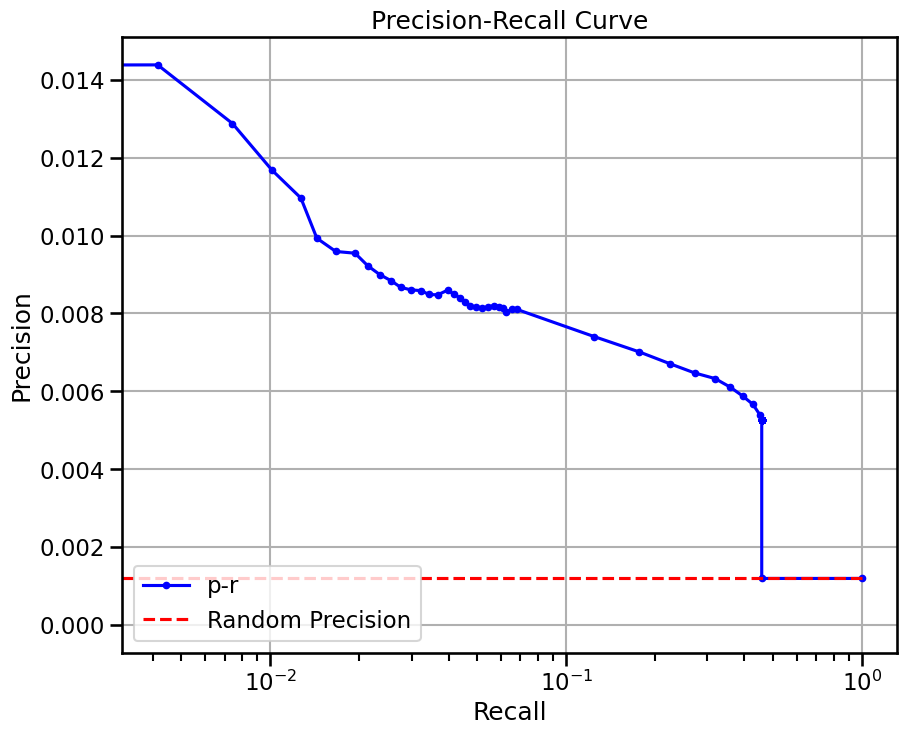

  0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 1/2 [00:01<00:01,  1.98s/it]

100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

avg link count: 385493956, sparsity: 1.0


base enrichment


too many genes for central computation


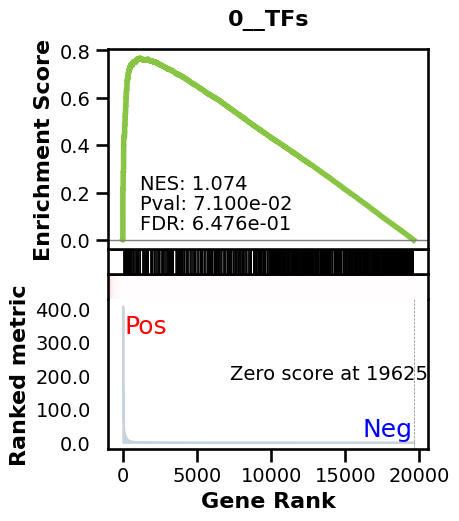

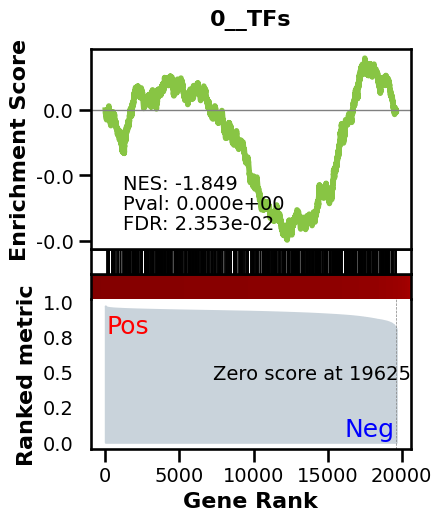

_________________________________________
TF specific enrichment


found some significant results for  47.706422018348626 % TFs

_________________________________________
loading GT,  omnipath


intersection of 11008 genes
intersection pct: 0.5608886171405278


precision:  0.0007554264079122171 
recall:  1.0 
random precision: 0.0007554871628107141


  0%|          | 0/128 [00:00<?, ?it/s]

  1%|          | 1/128 [00:00<00:28,  4.50it/s]

  2%|▏         | 2/128 [00:00<00:28,  4.46it/s]

  2%|▏         | 3/128 [00:00<00:27,  4.48it/s]

  3%|▎         | 4/128 [00:00<00:27,  4.48it/s]

  4%|▍         | 5/128 [00:01<00:27,  4.48it/s]

  5%|▍         | 6/128 [00:01<00:27,  4.47it/s]

  5%|▌         | 7/128 [00:01<00:26,  4.48it/s]

  6%|▋         | 8/128 [00:01<00:26,  4.48it/s]

  7%|▋         | 9/128 [00:02<00:26,  4.48it/s]

  8%|▊         | 10/128 [00:02<00:26,  4.47it/s]

  9%|▊         | 11/128 [00:02<00:26,  4.48it/s]

  9%|▉         | 12/128 [00:02<00:25,  4.47it/s]

 10%|█         | 13/128 [00:02<00:25,  4.48it/s]

 11%|█         | 14/128 [00:03<00:25,  4.47it/s]

 12%|█▏        | 15/128 [00:03<00:25,  4.49it/s]

 12%|█▎        | 16/128 [00:03<00:25,  4.48it/s]

 13%|█▎        | 17/128 [00:03<00:24,  4.48it/s]

 14%|█▍        | 18/128 [00:04<00:24,  4.47it/s]

 15%|█▍        | 19/128 [00:04<00:24,  4.48it/s]

 16%|█▌        | 20/128 [00:04<00:24,  4.47it/s]

 16%|█▋        | 21/128 [00:04<00:23,  4.48it/s]

 17%|█▋        | 22/128 [00:04<00:23,  4.47it/s]

 18%|█▊        | 23/128 [00:05<00:23,  4.48it/s]

 19%|█▉        | 24/128 [00:05<00:23,  4.47it/s]

 20%|█▉        | 25/128 [00:05<00:22,  4.48it/s]

 20%|██        | 26/128 [00:05<00:22,  4.48it/s]

 21%|██        | 27/128 [00:06<00:22,  4.49it/s]

 22%|██▏       | 28/128 [00:06<00:22,  4.48it/s]

 23%|██▎       | 29/128 [00:06<00:22,  4.48it/s]

 23%|██▎       | 30/128 [00:06<00:21,  4.47it/s]

 24%|██▍       | 31/128 [00:06<00:21,  4.48it/s]

 25%|██▌       | 32/128 [00:07<00:21,  4.46it/s]

 26%|██▌       | 33/128 [00:07<00:21,  4.47it/s]

 27%|██▋       | 34/128 [00:07<00:21,  4.47it/s]

 27%|██▋       | 35/128 [00:07<00:20,  4.48it/s]

 28%|██▊       | 36/128 [00:08<00:20,  4.48it/s]

 29%|██▉       | 37/128 [00:08<00:20,  4.47it/s]

 30%|██▉       | 38/128 [00:08<00:20,  4.48it/s]

 30%|███       | 39/128 [00:08<00:19,  4.47it/s]

 31%|███▏      | 40/128 [00:08<00:19,  4.48it/s]

 32%|███▏      | 41/128 [00:09<00:19,  4.47it/s]

 33%|███▎      | 42/128 [00:09<00:19,  4.48it/s]

 34%|███▎      | 43/128 [00:09<00:18,  4.47it/s]

 34%|███▍      | 44/128 [00:09<00:18,  4.48it/s]

 35%|███▌      | 45/128 [00:10<00:18,  4.48it/s]

 36%|███▌      | 46/128 [00:10<00:18,  4.48it/s]

 37%|███▋      | 47/128 [00:10<00:18,  4.48it/s]

 38%|███▊      | 48/128 [00:10<00:17,  4.48it/s]

 38%|███▊      | 49/128 [00:10<00:17,  4.48it/s]

 39%|███▉      | 50/128 [00:11<00:17,  4.48it/s]

 40%|███▉      | 51/128 [00:11<00:17,  4.48it/s]

 41%|████      | 52/128 [00:11<00:16,  4.48it/s]

 41%|████▏     | 53/128 [00:11<00:16,  4.48it/s]

 42%|████▏     | 54/128 [00:12<00:16,  4.48it/s]

 43%|████▎     | 55/128 [00:12<00:16,  4.48it/s]

 44%|████▍     | 56/128 [00:12<00:16,  4.49it/s]

 45%|████▍     | 57/128 [00:12<00:15,  4.48it/s]

 45%|████▌     | 58/128 [00:12<00:15,  4.48it/s]

 46%|████▌     | 59/128 [00:13<00:15,  4.47it/s]

 47%|████▋     | 60/128 [00:13<00:15,  4.48it/s]

 48%|████▊     | 61/128 [00:13<00:14,  4.47it/s]

 48%|████▊     | 62/128 [00:13<00:14,  4.48it/s]

 49%|████▉     | 63/128 [00:14<00:14,  4.48it/s]

 50%|█████     | 64/128 [00:14<00:14,  4.48it/s]

 51%|█████     | 65/128 [00:14<00:14,  4.47it/s]

 52%|█████▏    | 66/128 [00:14<00:13,  4.47it/s]

 52%|█████▏    | 67/128 [00:14<00:13,  4.47it/s]

 53%|█████▎    | 68/128 [00:15<00:13,  4.48it/s]

 54%|█████▍    | 69/128 [00:15<00:13,  4.47it/s]

 55%|█████▍    | 70/128 [00:15<00:12,  4.48it/s]

 55%|█████▌    | 71/128 [00:15<00:12,  4.48it/s]

 56%|█████▋    | 72/128 [00:16<00:12,  4.48it/s]

 57%|█████▋    | 73/128 [00:16<00:12,  4.47it/s]

 58%|█████▊    | 74/128 [00:16<00:12,  4.48it/s]

 59%|█████▊    | 75/128 [00:16<00:11,  4.48it/s]

 59%|█████▉    | 76/128 [00:16<00:11,  4.48it/s]

 60%|██████    | 77/128 [00:17<00:11,  4.47it/s]

 61%|██████    | 78/128 [00:17<00:11,  4.48it/s]

 62%|██████▏   | 79/128 [00:17<00:10,  4.48it/s]

 62%|██████▎   | 80/128 [00:17<00:10,  4.48it/s]

 63%|██████▎   | 81/128 [00:18<00:10,  4.47it/s]

 64%|██████▍   | 82/128 [00:18<00:10,  4.48it/s]

 65%|██████▍   | 83/128 [00:18<00:10,  4.47it/s]

 66%|██████▌   | 84/128 [00:18<00:09,  4.48it/s]

 66%|██████▋   | 85/128 [00:18<00:09,  4.47it/s]

 67%|██████▋   | 86/128 [00:19<00:09,  4.48it/s]

 68%|██████▊   | 87/128 [00:19<00:09,  4.48it/s]

 69%|██████▉   | 88/128 [00:19<00:08,  4.48it/s]

 70%|██████▉   | 89/128 [00:19<00:08,  4.48it/s]

 70%|███████   | 90/128 [00:20<00:08,  4.48it/s]

 71%|███████   | 91/128 [00:20<00:08,  4.48it/s]

 72%|███████▏  | 92/128 [00:20<00:08,  4.48it/s]

 73%|███████▎  | 93/128 [00:20<00:07,  4.47it/s]

 73%|███████▎  | 94/128 [00:20<00:07,  4.48it/s]

 74%|███████▍  | 95/128 [00:21<00:07,  4.47it/s]

 75%|███████▌  | 96/128 [00:21<00:07,  4.48it/s]

 76%|███████▌  | 97/128 [00:21<00:06,  4.48it/s]

 77%|███████▋  | 98/128 [00:21<00:06,  4.45it/s]

 77%|███████▋  | 99/128 [00:22<00:06,  4.42it/s]

 78%|███████▊  | 100/128 [00:22<00:06,  4.44it/s]

 79%|███████▉  | 101/128 [00:22<00:06,  4.45it/s]

 80%|███████▉  | 102/128 [00:22<00:05,  4.47it/s]

 80%|████████  | 103/128 [00:23<00:05,  4.46it/s]

 81%|████████▏ | 104/128 [00:23<00:05,  4.47it/s]

 82%|████████▏ | 105/128 [00:23<00:05,  4.47it/s]

 83%|████████▎ | 106/128 [00:23<00:04,  4.47it/s]

 84%|████████▎ | 107/128 [00:23<00:04,  4.43it/s]

 84%|████████▍ | 108/128 [00:24<00:04,  4.45it/s]

 85%|████████▌ | 109/128 [00:24<00:04,  4.46it/s]

 86%|████████▌ | 110/128 [00:24<00:04,  4.47it/s]

 87%|████████▋ | 111/128 [00:24<00:03,  4.47it/s]

 88%|████████▊ | 112/128 [00:25<00:03,  4.48it/s]

 88%|████████▊ | 113/128 [00:25<00:03,  4.47it/s]

 89%|████████▉ | 114/128 [00:25<00:03,  4.48it/s]

 90%|████████▉ | 115/128 [00:25<00:02,  4.33it/s]

 91%|█████████ | 116/128 [00:25<00:02,  4.38it/s]

 91%|█████████▏| 117/128 [00:26<00:02,  4.40it/s]

 92%|█████████▏| 118/128 [00:26<00:02,  4.43it/s]

 93%|█████████▎| 119/128 [00:26<00:02,  4.44it/s]

 94%|█████████▍| 120/128 [00:26<00:01,  4.46it/s]

 95%|█████████▍| 121/128 [00:27<00:01,  4.46it/s]

 95%|█████████▌| 122/128 [00:27<00:01,  4.47it/s]

 96%|█████████▌| 123/128 [00:27<00:01,  4.48it/s]

 97%|█████████▋| 124/128 [00:27<00:00,  4.48it/s]

 98%|█████████▊| 125/128 [00:27<00:00,  4.48it/s]

 98%|█████████▊| 126/128 [00:28<00:00,  4.48it/s]

 99%|█████████▉| 127/128 [00:28<00:00,  4.48it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()


100%|██████████| 128/128 [00:28<00:00,  4.48it/s]

100%|██████████| 128/128 [00:28<00:00,  4.47it/s]

Average Precision (AP):  0.0007931707451849381
Area Under Precision-Recall Curve (AUPRC):  0.0007927380462303711


EPR: 1.4173359674840975


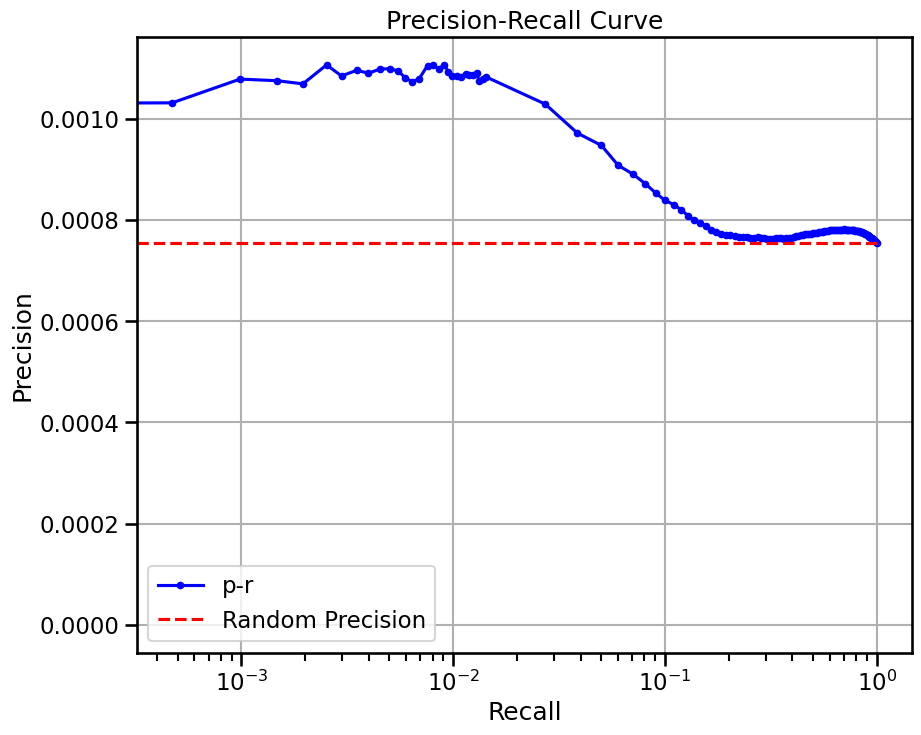

  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:03<00:06,  3.10s/it]

 67%|██████▋   | 2/3 [00:04<00:02,  2.11s/it]

100%|██████████| 3/3 [00:04<00:00,  1.19s/it]

100%|██████████| 3/3 [00:04<00:00,  1.61s/it]

base enrichment


Top central genes: []
The DataFrame contains only the same values.


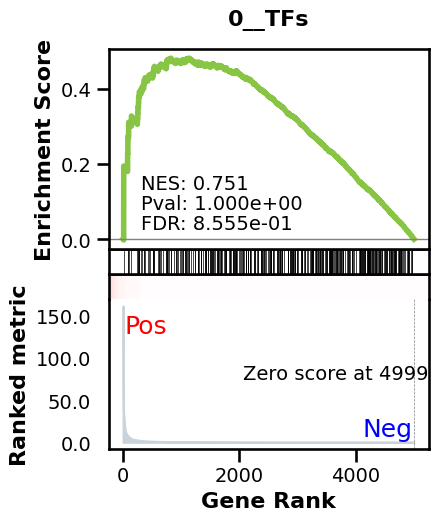

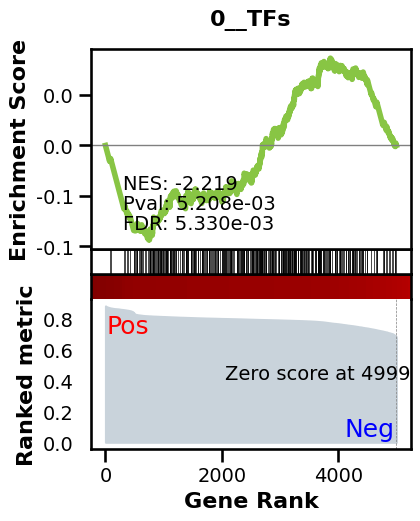

_________________________________________
TF specific enrichment


found some significant results for  25.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3159 genes
intersection pct: 0.6318
precision:  0.0009807661569609463 
recall:  1.0 
random precision: 0.000981052595675012


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 55.95it/s]

  9%|▉         | 12/128 [00:00<00:02, 56.04it/s]

 14%|█▍        | 18/128 [00:00<00:01, 56.11it/s]

 19%|█▉        | 24/128 [00:00<00:01, 56.22it/s]

 23%|██▎       | 30/128 [00:00<00:01, 56.17it/s]

 28%|██▊       | 36/128 [00:00<00:01, 56.14it/s]

 33%|███▎      | 42/128 [00:00<00:01, 56.14it/s]

 38%|███▊      | 48/128 [00:00<00:01, 56.11it/s]

 42%|████▏     | 54/128 [00:00<00:01, 56.10it/s]

 47%|████▋     | 60/128 [00:01<00:01, 56.09it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 56.09it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 56.10it/s]

 61%|██████    | 78/128 [00:01<00:00, 56.16it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 56.20it/s]

 70%|███████   | 90/128 [00:01<00:00, 56.19it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 56.23it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 56.20it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 56.18it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 56.15it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 56.11it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 56.10it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 56.11it/s]

Average Precision (AP):  0.001053968573635607
Area Under Precision-Recall Curve (AUPRC):  0.0010536875515093822
EPR: 1.3298208000145433


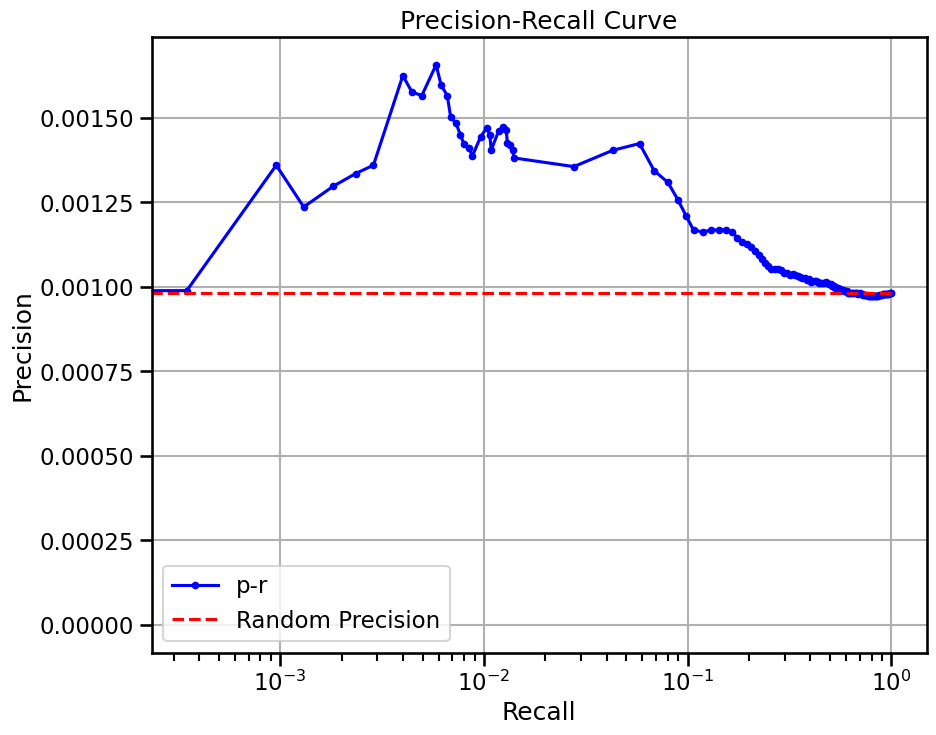

base enrichment


Top central genes: []


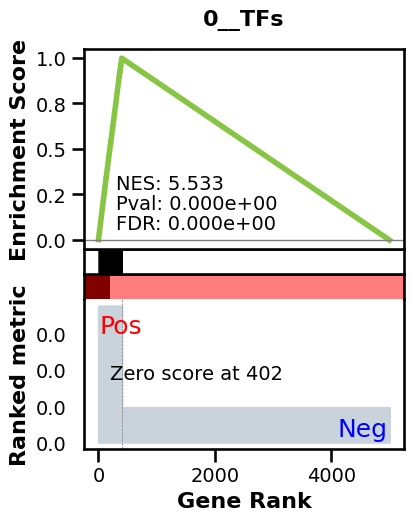

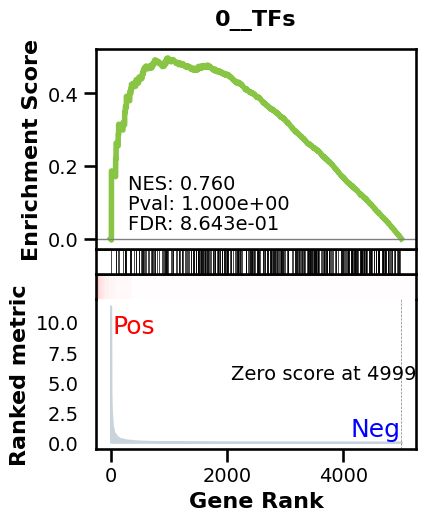

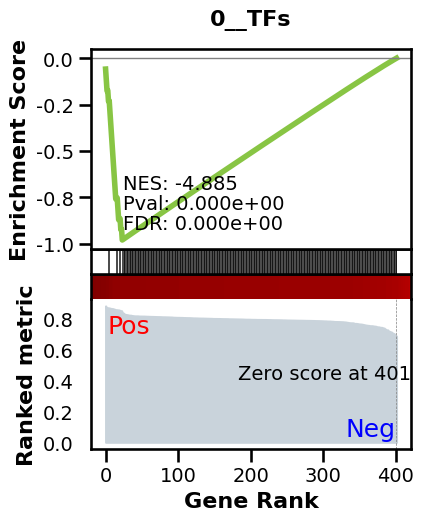

_________________________________________
TF specific enrichment


found some significant results for  7.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3159 genes
intersection pct: 0.6318
precision:  0.004688075101838258 
recall:  0.49265536723163844 
random precision: 0.000981052595675012


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▍         | 6/128 [00:00<00:02, 56.08it/s]

  9%|▉         | 12/128 [00:00<00:02, 56.17it/s]

 14%|█▍        | 18/128 [00:00<00:01, 55.73it/s]

 19%|█▉        | 24/128 [00:00<00:01, 55.92it/s]

 23%|██▎       | 30/128 [00:00<00:01, 56.10it/s]

 28%|██▊       | 36/128 [00:00<00:01, 56.12it/s]

 33%|███▎      | 42/128 [00:00<00:01, 56.16it/s]

 38%|███▊      | 48/128 [00:00<00:01, 56.24it/s]

 42%|████▏     | 54/128 [00:00<00:01, 56.22it/s]

 47%|████▋     | 60/128 [00:01<00:01, 56.29it/s]

 52%|█████▏    | 66/128 [00:01<00:01, 56.28it/s]

 56%|█████▋    | 72/128 [00:01<00:00, 56.29it/s]

 61%|██████    | 78/128 [00:01<00:00, 56.32it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 56.31it/s]

 70%|███████   | 90/128 [00:01<00:00, 56.33it/s]

 75%|███████▌  | 96/128 [00:01<00:00, 56.35it/s]

 80%|███████▉  | 102/128 [00:01<00:00, 56.30it/s]

 84%|████████▍ | 108/128 [00:01<00:00, 56.30it/s]

 89%|████████▉ | 114/128 [00:02<00:00, 56.29it/s]

 94%|█████████▍| 120/128 [00:02<00:00, 56.27it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 56.09it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 56.16it/s]

Average Precision (AP):  0.0034155034039882225
Area Under Precision-Recall Curve (AUPRC):  0.0029683089409258292
EPR: 7.17334801698835


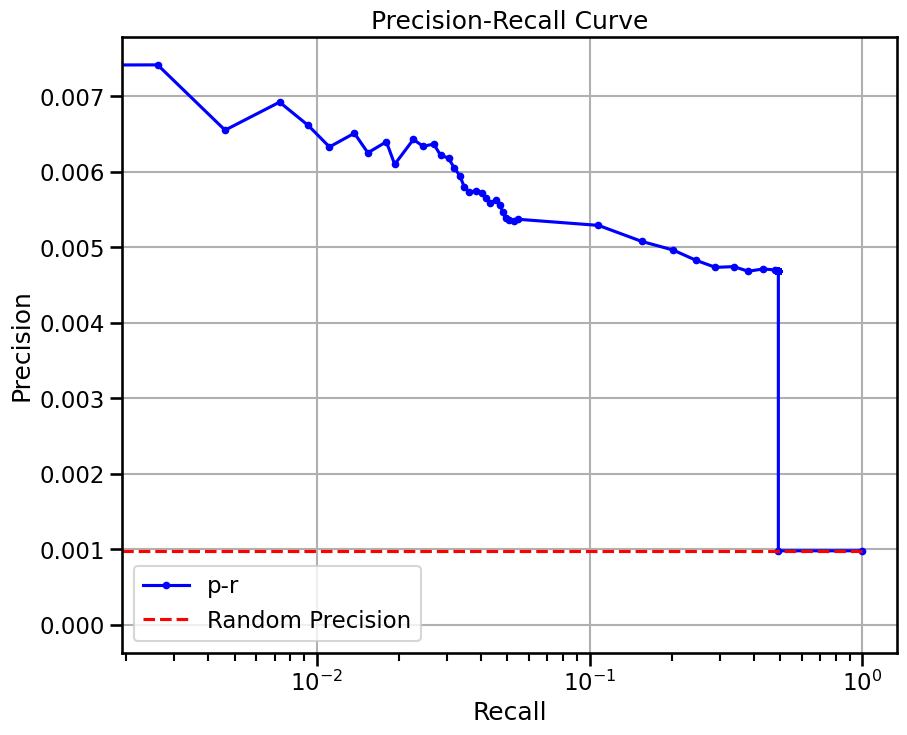

base enrichment


Top central genes: []
The DataFrame contains only the same values.


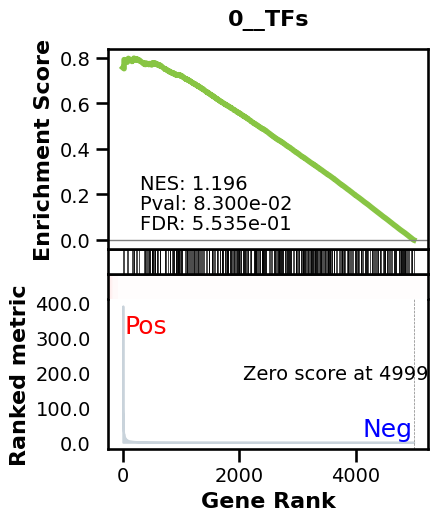

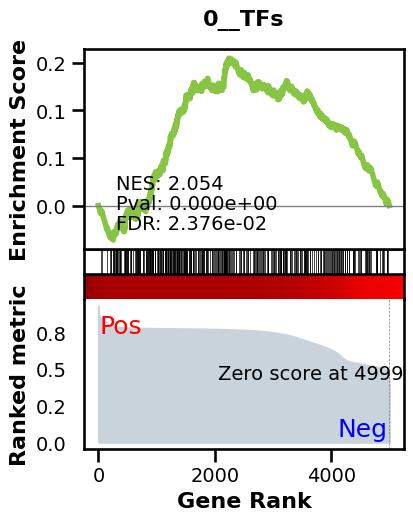

_________________________________________
TF specific enrichment


found some significant results for  22.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3159 genes
intersection pct: 0.6318
precision:  0.0009807661569609463 
recall:  1.0 
random precision: 0.000981052595675012


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:02, 60.37it/s]

 11%|█         | 14/128 [00:00<00:01, 60.50it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.47it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.48it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.50it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.49it/s]

 38%|███▊      | 49/128 [00:00<00:01, 60.49it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.48it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.53it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.49it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.50it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.48it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.51it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.50it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.50it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.47it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.48it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 60.45it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.45it/s]

Average Precision (AP):  0.0009108637240618977
Area Under Precision-Recall Curve (AUPRC):  0.0009062178715989347
EPR: 1.1521100454693645


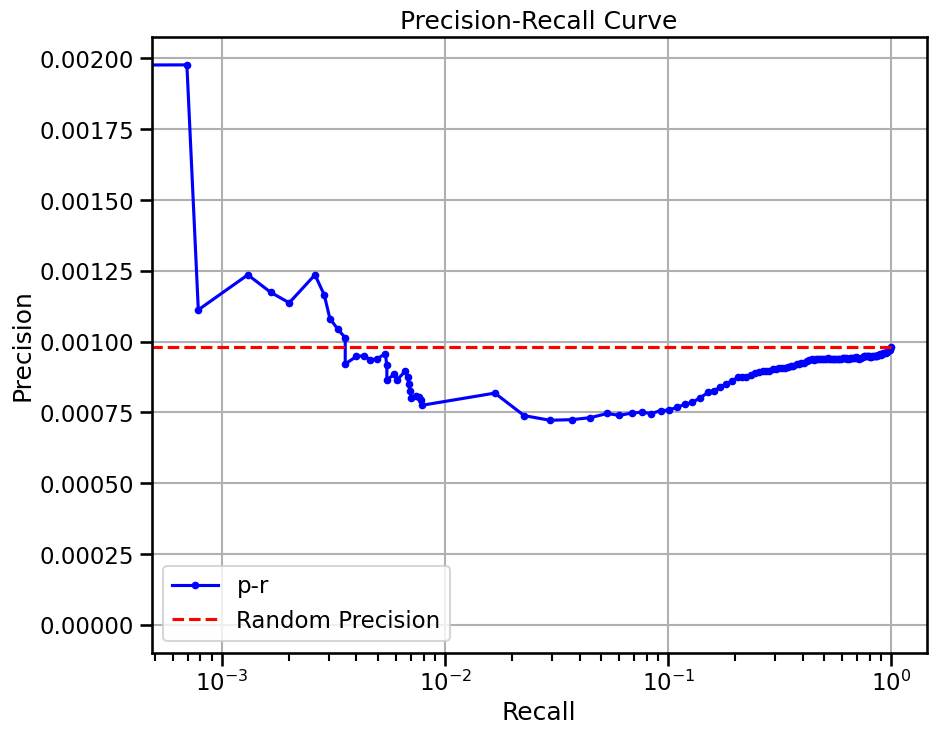

base enrichment


Top central genes: []


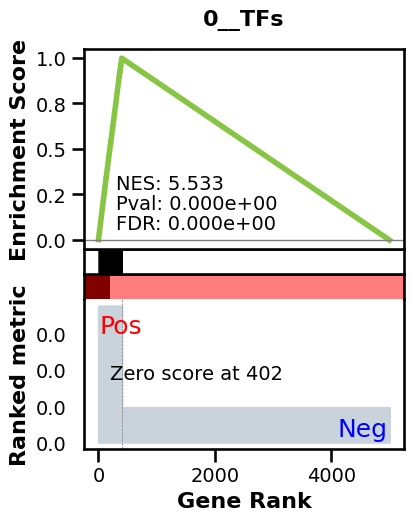

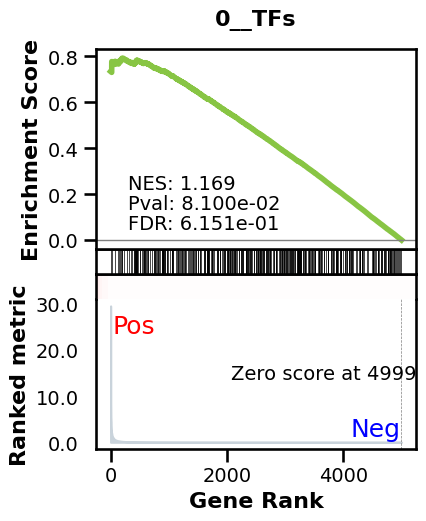

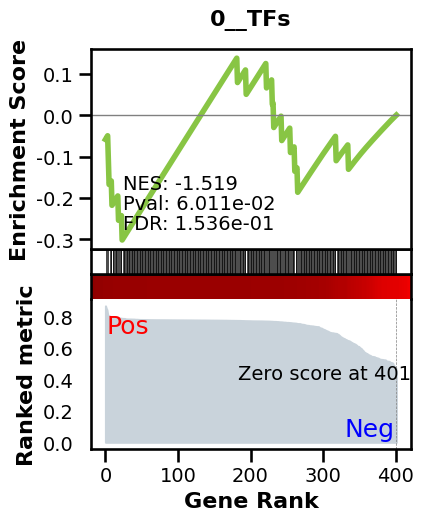

_________________________________________
TF specific enrichment


found some significant results for  12.5 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3159 genes
intersection pct: 0.6318
precision:  0.004688075101838258 
recall:  0.49265536723163844 
random precision: 0.000981052595675012


  0%|          | 0/128 [00:00<?, ?it/s]

  5%|▌         | 7/128 [00:00<00:01, 60.90it/s]

 11%|█         | 14/128 [00:00<00:01, 60.88it/s]

 16%|█▋        | 21/128 [00:00<00:01, 60.89it/s]

 22%|██▏       | 28/128 [00:00<00:01, 60.89it/s]

 27%|██▋       | 35/128 [00:00<00:01, 60.88it/s]

 33%|███▎      | 42/128 [00:00<00:01, 60.88it/s]

 38%|███▊      | 49/128 [00:00<00:01, 60.89it/s]

 44%|████▍     | 56/128 [00:00<00:01, 60.90it/s]

 49%|████▉     | 63/128 [00:01<00:01, 60.89it/s]

 55%|█████▍    | 70/128 [00:01<00:00, 60.82it/s]

 60%|██████    | 77/128 [00:01<00:00, 60.79it/s]

 66%|██████▌   | 84/128 [00:01<00:00, 60.79it/s]

 71%|███████   | 91/128 [00:01<00:00, 60.82it/s]

 77%|███████▋  | 98/128 [00:01<00:00, 60.81it/s]

 82%|████████▏ | 105/128 [00:01<00:00, 60.61it/s]

 88%|████████▊ | 112/128 [00:01<00:00, 60.60it/s]

 93%|█████████▎| 119/128 [00:01<00:00, 60.66it/s]

 98%|█████████▊| 126/128 [00:02<00:00, 60.75it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:750: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 60.76it/s]

Average Precision (AP):  0.0030083875575048977
Area Under Precision-Recall Curve (AUPRC):  0.0025658571957771913
EPR: 4.100222863406875


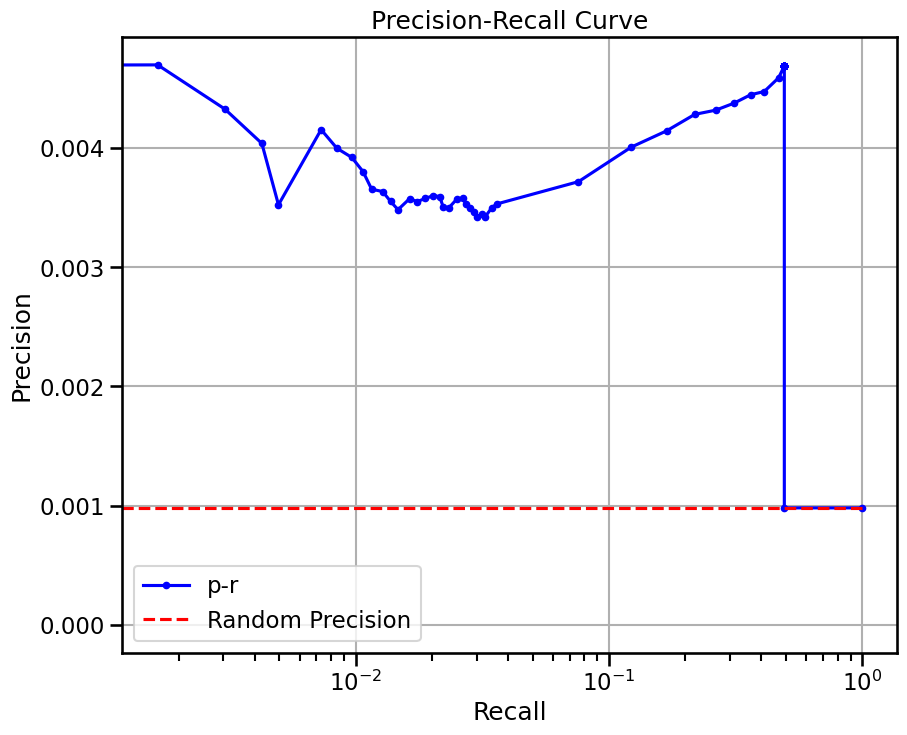

In [6]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    grn_inferer = GRNfer(model, adata,
                        how="random expr",
                        preprocess="softmax",
                        head_agg='mean',
                        filtration="none",
                        forward_mode="none",
                        num_genes=2200,
                        max_cells=MAXCELLS,
                        doplot=False,
                        batch_size=32,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    del grn
    grn_inferer = GRNfer(model, adata,
                        how="most var across",
                        preprocess="softmax",
                        head_agg='none',
                        filtration="none",
                        forward_mode="none",
                        num_genes=NUM_GENES,
                        max_cells=1024,
                        doplot=False,
                        batch_size=16,
                        )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    print(grn.shape, celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'][:,:,:].mean(-1)
    metrics[celltype+'_scprint_mean'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_mean'] = BenGRN(grn).scprint_benchmark()
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        _, m, clf_omni = train_classifier(grn, C=1, train_size=0.6, class_weight={
                                        1: 200, 0: 1}, shuffle=True, max_iter=200, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    grn.varp['GRN'][~grn.var.isTF,:]=0
    metrics[celltype+'_scprint_tf_class'] = BenGRN(grn).scprint_benchmark()
    del grn

In [7]:
metrics

{'fibroblast_scprint_full': {'enriched_terms_Regulators': ['celltype.gmt__Plasma B cells',
   'celltype.gmt__Memory B cells',
   'celltype.gmt__Epithelial cells',
   'celltype.gmt__Naive B cells'],
  'TF_enr': True,
  'significant_enriched_TFtargets': 43.75,
  'precision': 0.0006618214377693767,
  'recall': 1.0,
  'rand_precision': 0.0006618672671051408,
  'auprc': 0.0006553672039534219,
  'ap': 0.00065561910567673,
  'epr': 1.1056448976975124},
 'fibroblast_scprint_mean': {'TF_enr': True,
  'enriched_terms_Targets': ['celltype.gmt__Peri-islet Schwann cells'],
  'significant_enriched_TFtargets': 36.111111111111114,
  'precision': 0.0012460602944679446,
  'recall': 1.0,
  'rand_precision': 0.0012464244266404952,
  'auprc': 0.0015492695639396418,
  'ap': 0.0015508892071508518,
  'epr': 0.4939416534868757},
 'fibroblast_scprint_tf_mean': {'enriched_terms_Central': ['0__TFs',
   'celltype.gmt__Embryonic stem cells',
   'celltype.gmt__Endometrium',
   'celltype.gmt__Satellite cells',
   'ce

In [8]:
False
False
False
True
False
False
False
True
False
True
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False

False

In [9]:
import pandas as pd

In [10]:
print('new')

new


In [11]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], k.split('_')[0], v['epr'], v['auprc'], v['ap'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['tools','name','EPR', 'AUPRC', 'AP', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

tools                name        EPR     AUPRC        AP      RAND  \
0    full          fibroblast   1.105645  0.000655  0.000656  0.000662   
1    mean          fibroblast   0.493942  0.001549  0.001551  0.001246   
2    mean          fibroblast  13.657793  0.008304  0.008759  0.001246   
3   class          fibroblast   7.766516  0.001875  0.001879  0.001246   
4   class          fibroblast  21.047204  0.009231  0.010164  0.001246   
5    full    endothelial cell   1.149500  0.000687  0.000687  0.000662   
6    mean    endothelial cell   1.289623  0.001762  0.001763  0.001591   
7    mean    endothelial cell   8.525756  0.004520  0.004901  0.001591   
8   class    endothelial cell   2.271759  0.002033  0.002034  0.001591   
9   class    endothelial cell   8.889567  0.005075  0.005497  0.001591   
10   full  myofibroblast cell   1.149500  0.000670  0.000671  0.000662   
11   mean  myofibroblast cell   2.078615  0.000927  0.000928  0.000804   
12   mean  myofibroblast cell   6.938981  0.001977  0.002231  0.000804   
13  class  myofibroblast cell   4.433726  0.000938  0.000940  0.000804   
14  class  myofibroblast cell   8.265560  0.001886  0.002160  0.000804   
15   full          glial cell   1.588325  0.000706  0.000706  0.000662   
16   mean          glial cell   4.642211  0.000597  0.000601  0.000574   
17   mean          glial cell  10.278361  0.001645  0.001830  0.000574   
18  class          glial cell   4.020398  0.000572  0.000574  0.000574   
19  class          glial cell   8.391648  0.001683  0.001874  0.000574   
20   full            pericyte   1.610280  0.000686  0.000686  0.000662   
21   mean            pericyte   2.153702  0.000813  0.000819  0.000711   
22   mean            pericyte  13.933342  0.002812  0.003079  0.000711   
23  class            pericyte   4.518279  0.000767  0.000774  0.000711   
24  class            pericyte   8.294670  0.002463  0.002779  0.000711   
25   full          lymphocyte   1.478571  0.000671  0.000672  0.000662   
26   mean          lymphocyte   1.351268  0.001308  0.001309  0.001193   
27   mean          lymphocyte   7.948570  0.003468  0.003832  0.001193   
28  class          lymphocyte   2.030178  0.001487  0.001488  0.001193   
29  class          lymphocyte   9.703510  0.003833  0.004230  0.001193   
30   full        stromal cell   1.417336  0.000793  0.000793  0.000755   
31   mean        stromal cell   1.329821  0.001054  0.001054  0.000981   
32   mean        stromal cell   7.173348  0.002968  0.003416  0.000981   
33  class        stromal cell   1.152110  0.000906  0.000911  0.000981   
34  class        stromal cell   4.100223  0.002566  0.003008  0.000981   

      TF_targ  TF_enr  TF_only  
0   43.750000    True    False  
1   36.111111    True    False  
2   11.111111    True     True  
3   30.555556    True    False  
4    5.555556    True     True  
5   57.142857    True    False  
6   28.571429   False    False  
7   14.285714    True     True  
8   30.357143   False    False  
9   14.285714    True     True  
10  54.464286    True    False  
11  17.857143    True    False  
12  10.714286    True     True  
13  17.857143    True    False  
14   3.571429    True     True  
15  57.142857    True    False  
16  22.222222    True    False  
17   0.000000    True     True  
18  27.777778    True    False  
19   0.000000    True     True  
20  54.464286    True    False  
21  30.434783   False    False  
22   0.000000    True     True  
23  30.434783   False    False  
24  13.043478    True     True  
25  56.250000    True    False  
26  25.000000    True    False  
27  17.500000    True     True  
28  30.000000    True    False  
29   7.500000    True     True  
30  47.706422    True    False  
31  25.000000    True    False  
32   7.500000    True     True  
33  22.500000    True    False  
34  12.500000    True     True